# Telecom Churn - Case Study

###### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

###### Definitions of Churn
There are various ways to define churn, such as: 1. Revenue-based churn   2.Usage-based churn. However, this case study will consider only the **usage-based** definition to define churn.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 

###### Business objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

- For many incumbent operators, retaining high profitable customers is the number one business goal.
- To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

###### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

- Good Phase: In this phase, the customer is happy with the service and behaves as usual. June and July month will be cosidered as **Good Phase**.

- Action Phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. Augst month data will be considered as **Action Phase**.

- Churn Phase: The customer is churned on this phase. September month data will be considered as **Churn Phase**. We can use Action Phase data as prediction.

**Authors**
- Sidhartha Sankar Mahapatro
- S S B Phani Pradeep Miriyala

## Step 1: Reading and Understanding Data

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required packages
import numpy as np
import pandas as pd

#Setup pandas feature to show max row and column
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

# Import the packages for ploting charts
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Import the data file

In [3]:
# Loading the data using Pandas
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

#### Inspect the dataframe
Inspecting data frame using shape, info and describe method which help to give a good idea of the dataframes.

In [4]:
print(telecom_df.shape)
print(telecom_df.info())
telecom_df.describe(include='all')

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

#### Observation:
- In telecom data set, we have total 99,999 data rows along with 226 variables. 
- Based on the information, this data set has 214 numeric (179 float and 35 int) and 12 categorical variables.

#### Validating duplicate records

In [5]:
# Checking uniqueness of phone number to validate if any duplicate rows
print('Total number of customer : %d' %len(telecom_df.mobile_number.unique()))

Total number of customer : 99999


### Exploring and Cleaning the data

In [6]:
# Creating a variable to hold list of suffixes for each month.
month_suffixes = ['6','7','8','9']
# This lambda function will return name of function suffixed with month.
mcol_name = lambda x,y: f'{x}_{y}'

#### Renaming monthly variables
There are some monthly features which are not in the standard naming (_6,_7,_8,_9)
- 'jun_vbc_3g' : 'vbc_3g_6'
- 'jul_vbc_3g' : 'vbc_3g_7'
- 'aug_vbc_3g' : 'vbc_3g_8'
- 'sep_vbc_3g' : 'vbc_3g_9'

In [7]:
telecom_df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 
                           'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [8]:
new_columns = list(telecom_df.filter(regex=('vbc')).columns)
telecom_df[new_columns].head()

vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9
0      30.4       0.0    101.20      3.58
1       0.0       0.0      0.00      0.00
2       0.0       0.0      4.17      0.00
3       0.0       0.0      0.00      0.00
4       0.0       0.0      0.00      0.00

#### High variance and Low variance features

In [9]:
# Let us look at columns that are either highly skewed or not changing at all.
# This type of columns will be of no use for analysis.
unique_counts = list(zip(telecom_df.columns, [telecom_df[c].nunique() for c in telecom_df.columns]))
no_variance = [x[0] for x in unique_counts if x[1] == 1]
high_variance  = [x[0] for x in unique_counts if x[1]>=99999]

# Gathering all variables to drop where these are not usefu.
total_column = no_variance + high_variance
print('High variance column(s):', high_variance)
print(total_column)

High variance column(s): ['mobile_number']
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'mobile_number']


#### Observation:
- There are total 17 variables listed which are having 16 no variance and one variable(Mobile_Number) having high variance.
- These variables having no use in our model development. This type of columns will be of no use for analysis. So better to drop.

In [10]:
# Both columns from no_variance and high_variance are not useful for analysis.
# Drop the columns with high and no variance
telecom_df.drop(total_column, axis = 1, inplace = True)
full_cols = list(telecom_df.columns)
telecom_df.shape

(99999, 209)

#### Inspect Null values

Find the percentage of Null values in each column. Round off the percentage upto four decimal places to get even the small percentage of null values.

In [11]:
# checking null value in data frame
telecom_df.isnull().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou_9             7745
loc_og_t2f_mou_6             3937
loc_og_t2f_mou

#### Observation
Looks like there are huge number of variable having null/missing values. Now we can calculate %age values to validate the clarity.

In [12]:
# Check the null percentage of remaining columns of telecom_df
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)),2)

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

In [13]:
# Due to high volume of features, above inspection did not provide complete list. 
# Now we can order the value based on its missing count
round(100*telecom_df.isnull().sum()/len(telecom_df.index),2).sort_values(ascending=False)

total_rech_data_6           74.85
count_rech_2g_6             74.85
arpu_2g_6                   74.85
arpu_3g_6                   74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
fb_user_6                   74.85
night_pck_user_6            74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
fb_user_7                   74.43
fb_user_9                   74.08
arpu_2g_9                   74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
av_rech_amt_data_9          74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user

#### Observation:
From above sorted order, we can clearly identify high volume of missing data which is grater than 50% and other category has less than 10%.

### Data Cleaning
- Defining function to find or tracing missing values iteratively and list based on defined percentage cutoff
- Defining iterative function to impute NaN value instead of imputing indivudually.

In [14]:
def get_missing_values(data,cutoff_val): 
    '''This function returns list of columns that have strictly more than provided cutoff value.
    Argument cutoff_val is the cutoff threshold expressed as percentage. E.g., 50 (instead of 0.5)'''
    missing = round(100*(data.isnull().sum()/len(data.index)),2)
    missing_vals = missing.loc[missing > cutoff_val]
    print("There are {} features having more than {}% missing values".format(len(missing_vals), cutoff_val))
    return missing_vals

In [15]:
# Function impute the nan with 0 and argument: colList, list of columns for which nan is to be replaced with 0
def impute_nan(impute_cols = None, missing_cols = None, impute_with = 0):
    '''The function imputes missing values (nans) with user provided impute value.
    Function directly modifies dataframe telecom_df.
    Arguments:
        impute_cols: List of columns to impute values for. These columns are considered one for each month. 
            Thus, they are automatically suffixed at end with 6,7,8,9
        missing_cols: List of missing value columns
        impute_with: Value to impute with. Default value is zero.
    '''
    if impute_cols:
        for col in [mcol_name(y,s) for s in month_suffixes for y in impute_cols]:
            telecom_df[col].fillna(impute_with, inplace=True)
    if missing_cols:
        for col in missing_cols:
            telecom_df[col].fillna(impute_with, inplace=True)

#####  Handling missing data
Let's check for missing values in the data.

In [16]:
# Missing values per column expressed as % of total number of values
get_missing_values(telecom_df,50)

There are 40 features having more than 50% missing values


date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

#### Observation:
- Out the these 40 features, many are required and are essential for analysis. 
- The missing values for these features seems to suggest that these customers KPI's did not have any value at that month. 
- We can choose to impute these values with 0 to make enable these features to give value to analysis.

#### Missing values across monthly variables
Looking at the missing value percentages, these sets of columns night be having missing values together. There could also be a related correlation when they present together. These below columns have interesting behavior.
- date_of_last_rech_data_* 
- total_rech_data_* 
- max_rech_data_*
- count_rech_2g_*, count_rech_3g_*
- av_rech_amt_data_*
- arpu_3g_*, arpu_2g_* 
- night_pck_user_*
- fb_user_*

In [17]:
# Creating a copy data frame to do some analysis
cat_df = telecom_df.copy()
cat_df.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN               NaN   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               NaN              0.00               NaN           NaN   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN          0.00           NaN               NaN   
1        150.51        299.54         72.11              0.23   
2         67.41         67.66         64.81              4.34   
3        118.68         37.99         83.03             26.23   
4        241.33        208.16      

In [18]:
# Let us confirm if they are really missing together.
def are_missing_together(data, cols):
    '''Processes the data set and list of columns to check if the columns have values missing together.'''
    missing_vals_whole = {col:data.loc[:,col].isna().sum() for col in cols}
    missing_vals_subset = {col:data.loc[data[cols[0]].isna(),col].isna().sum() for col in cols}
    mismatches = sum([missing_vals_whole[col] != missing_vals_subset[col] for col in cols])
    return mismatches==0 # When there are no mismatches, the columns will be missing together.

set_cols = ['date_of_last_rech_data','total_rech_data','max_rech_data','count_rech_2g','count_rech_3g',
           'av_rech_amt_data','arpu_3g','arpu_2g','night_pck_user','fb_user']

for suffix in month_suffixes:
    print('Month ', suffix , ' - Missing Together :', are_missing_together(cat_df,[mcol_name(x,suffix) for x in set_cols]))

Month  6  - Missing Together : True
Month  7  - Missing Together : True
Month  8  - Missing Together : True
Month  9  - Missing Together : True


#### Finding correlation between variables
The columns are missing together. 

Let us investigate how they are correlated when they did occur together. Its very important to figure out correlation measures and its treatment to improve model accuracy.

In [19]:
# Finding correlation measures on missing columns
corr_thr = 0.7
for suffix in month_suffixes:
    print('Month ',suffix,'\n')
    c = cat_df[[mcol_name(x,suffix) for x in set_cols]].corr()
    c.loc[:,:] = np.tril(c, k = -1)
    c = c.stack()
    print(c[(c>corr_thr) | (c<-corr_thr)].sort_values(ascending=False))
    print('')

Month  6 

arpu_2g_6           arpu_3g_6             0.932232
count_rech_2g_6     total_rech_data_6     0.890060
arpu_2g_6           av_rech_amt_data_6    0.834065
arpu_3g_6           av_rech_amt_data_6    0.809695
av_rech_amt_data_6  max_rech_data_6       0.703686
dtype: float64

Month  7 

arpu_2g_7           arpu_3g_7             0.930366
count_rech_2g_7     total_rech_data_7     0.888269
arpu_2g_7           av_rech_amt_data_7    0.815933
arpu_3g_7           av_rech_amt_data_7    0.796131
av_rech_amt_data_7  max_rech_data_7       0.705783
dtype: float64

Month  8 

arpu_2g_8           arpu_3g_8             0.924925
count_rech_2g_8     total_rech_data_8     0.886512
arpu_2g_8           av_rech_amt_data_8    0.805482
arpu_3g_8           av_rech_amt_data_8    0.787165
av_rech_amt_data_8  max_rech_data_8       0.709702
dtype: float64

Month  9 

arpu_2g_9           arpu_3g_9             0.852253
count_rech_2g_9     total_rech_data_9     0.829409
arpu_2g_9           av_rech_amt_data_9   

#### Observation:
- As per above analysis, we can see clearly "Average Revenue Per User" has highly Correlated with other variables. 
- Average recharge amount data could be useful for deriving new attribute. So we impute it with 0 and derrive new variable before dropping.
- Count recharge 2g and 3g variables are useful to derive total count recharge for few customer to build model.
- Average revenue per user variable for 2g and 3g are highly correlated. So these variables which are highly correlated need to be dropped.

### Categorical Variable - Missing value analysis

#### FB user variable analsysis
Face book user variable holds missing values. We need to do some analysis what is the actual distribution of these missing values.

In [20]:
# Let us investigate the behavior of each missing column.
print('Facebook Users\n')
for suffix in month_suffixes:
    print(cat_df[mcol_name('fb_user',suffix)].value_counts(dropna = False), '\n')

Facebook Users

NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64 

NaN    74428
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64 

NaN    73660
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64 

NaN    74077
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64 



#### Observation:
- Clearly this is a categorical column with two levels, Yes and No. The number of users in category zero are almost negigible.
- If we have to impute, we need to impute this column by mode value which is 1.

In [21]:
# Impute the Mode value in the 'FB User' column as it is holding majority of the data.
print('Facebook Users\n')
for suffix in month_suffixes:
    tmp_col = mcol_name('fb_user',suffix)
    cat_df.loc[pd.isnull(cat_df[tmp_col]), [tmp_col]] = cat_df[tmp_col].mode()[0] 
    print(cat_df[tmp_col].value_counts(dropna = False), '\n')

Facebook Users

1.0    97846
0.0     2153
Name: fb_user_6, dtype: int64 

1.0    97666
0.0     2333
Name: fb_user_7, dtype: int64 

1.0    97123
0.0     2876
Name: fb_user_8, dtype: int64 

1.0    96395
0.0     3604
Name: fb_user_9, dtype: int64 



#### Observation
Above all missing values are imputed with mode value "1". Now we need to validate data distribution for these categorical variables.

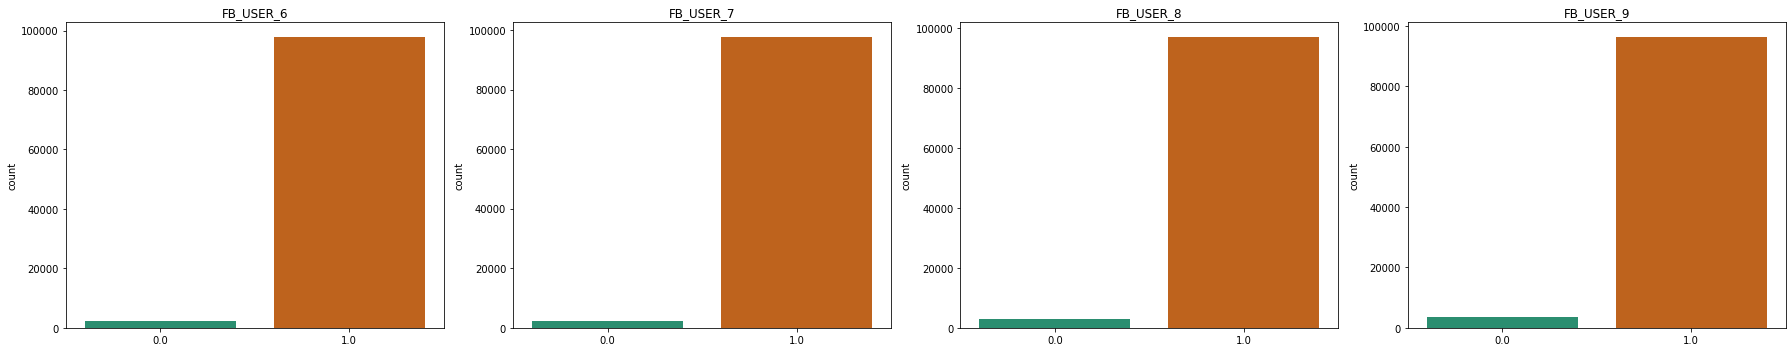

In [22]:
fb_features = list(cat_df.filter(regex=('fb_user')).columns)

plt.figure(figsize = (25, 5))

for item in enumerate(fb_features):
    plt.subplot(1,4,item[0]+1)
    sns.countplot(x = item[1], data = cat_df, palette = 'Dark2')
    plt.title(item[1].upper(), fontsize = 12)
    plt.xlabel('')
    plt.tight_layout()

#### night_pack_user variable analsysis
Night pack user variable holds missing values. We need to do some analysis what is the actual distribution of these missing values.

In [23]:
# night_pck_user variable analysis for month june, july, august and september
print('Night Pack Users\n')
for suffix in month_suffixes:
    print(cat_df[mcol_name('night_pck_user',suffix)].value_counts(dropna=False), '\n')

Night Pack Users

NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64 

NaN    74428
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64 

NaN    73660
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64 

NaN    74077
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64 



#### Observation:
- Clearly this is a categorical column with two levels, Yes and No. The number of users in category zero are almost negigible.
- If we have to impute, we need to impute this column by mode value which is 1.

In [24]:
# Impute the Mode value in the 'night_pck_user' column as it is holding majority of the data.
print('Night Pack Users\n')
for suffix in month_suffixes:
    tmp_col = mcol_name('night_pck_user',suffix)
    cat_df.loc[pd.isnull(cat_df[tmp_col]), [tmp_col]] = cat_df[tmp_col].mode()[0] 
    print(cat_df[tmp_col].value_counts(dropna = False), '\n')

Night Pack Users

0.0    99368
1.0      631
Name: night_pck_user_6, dtype: int64 

0.0    99410
1.0      589
Name: night_pck_user_7, dtype: int64 

0.0    99450
1.0      549
Name: night_pck_user_8, dtype: int64 

0.0    99585
1.0      414
Name: night_pck_user_9, dtype: int64 



#### Observation
Above all missing values are imputed with mode value "1". Now we need to validate data distribution for these categorical variables.

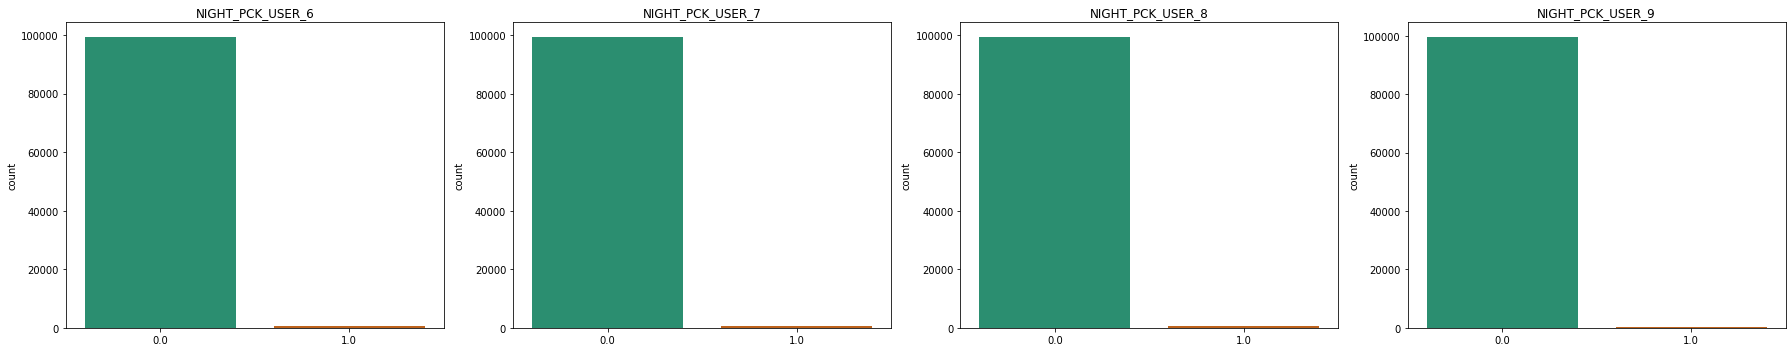

In [25]:
np_features = list(cat_df.filter(regex=('night_pck_user_')).columns)

plt.figure(figsize = (25, 5))

for item in enumerate(np_features):
    plt.subplot(1,4,item[0]+1)
    sns.countplot(x = item[1], data = cat_df, palette = 'Dark2')
    plt.title(item[1].upper(), fontsize = 12)
    plt.xlabel('')
    plt.tight_layout()

#### count_rech_3g variable analsysis
Count Recharge 3G variable holds missing values. We need to do some analysis what is the actual distribution of these missing values. There are 4 variables for this category
- count_rech_3g_6
- count_rech_3g_7
- count_rech_3g_8
- count_rech_3g_9

In [26]:
# count_rech_3g variable analysis for month june, july, august and september
print('Count Recharge 3G\n')
for suffix in month_suffixes:
    print(cat_df[mcol_name('count_rech_3g',suffix)].value_counts(dropna=False), '\n')

Count Recharge 3G

NaN     74846
0.0     15788
1.0      6742
2.0      1541
3.0       514
4.0       203
5.0       120
7.0        58
6.0        56
8.0        31
9.0        23
10.0       20
11.0       15
12.0        6
15.0        6
19.0        5
13.0        4
22.0        3
23.0        3
18.0        3
17.0        3
14.0        3
29.0        2
16.0        2
28.0        1
21.0        1
Name: count_rech_3g_6, dtype: int64 

NaN     74428
0.0     16294
1.0      6365
2.0      1718
3.0       515
4.0       231
5.0       140
6.0        90
7.0        57
8.0        33
9.0        24
10.0       19
12.0       15
11.0       15
14.0        9
15.0        8
13.0        8
19.0        4
17.0        4
18.0        4
20.0        3
22.0        3
16.0        3
21.0        3
24.0        2
35.0        1
34.0        1
31.0        1
23.0        1
Name: count_rech_3g_7, dtype: int64 

NaN     73660
0.0     16605
1.0      6648
2.0      1788
3.0       575
4.0       261
5.0       145
6.0        86
7.0        63
8.0      

#### Observation:
- Clearly this is a categorical column with many levels. The number of users in category zero are almost negigible.
- If we have to impute, we need to impute this column by mode value which is 0.

In [27]:
# Impute the Mode value in the 'count_rech_3g' column as it is holding majority of the data.
print('Count Recharge 3G\n')
for suffix in month_suffixes:
    tmp_col = mcol_name('count_rech_3g',suffix)
    cat_df.loc[pd.isnull(cat_df[tmp_col]), [tmp_col]] = cat_df[tmp_col].mode()[0] 
    print(cat_df[tmp_col].value_counts(dropna = False), '\n')

Count Recharge 3G

0.0     90634
1.0      6742
2.0      1541
3.0       514
4.0       203
5.0       120
7.0        58
6.0        56
8.0        31
9.0        23
10.0       20
11.0       15
15.0        6
12.0        6
19.0        5
13.0        4
22.0        3
23.0        3
14.0        3
18.0        3
17.0        3
16.0        2
29.0        2
21.0        1
28.0        1
Name: count_rech_3g_6, dtype: int64 

0.0     90722
1.0      6365
2.0      1718
3.0       515
4.0       231
5.0       140
6.0        90
7.0        57
8.0        33
9.0        24
10.0       19
11.0       15
12.0       15
14.0        9
13.0        8
15.0        8
17.0        4
19.0        4
18.0        4
22.0        3
21.0        3
20.0        3
16.0        3
24.0        2
34.0        1
31.0        1
23.0        1
35.0        1
Name: count_rech_3g_7, dtype: int64 

0.0     90265
1.0      6648
2.0      1788
3.0       575
4.0       261
5.0       145
6.0        86
7.0        63
8.0        38
10.0       25
9.0        23
12.0     

#### Observation
Above all missing values are imputed with mode value "1". Now we need to validate data distribution for these categorical variables.

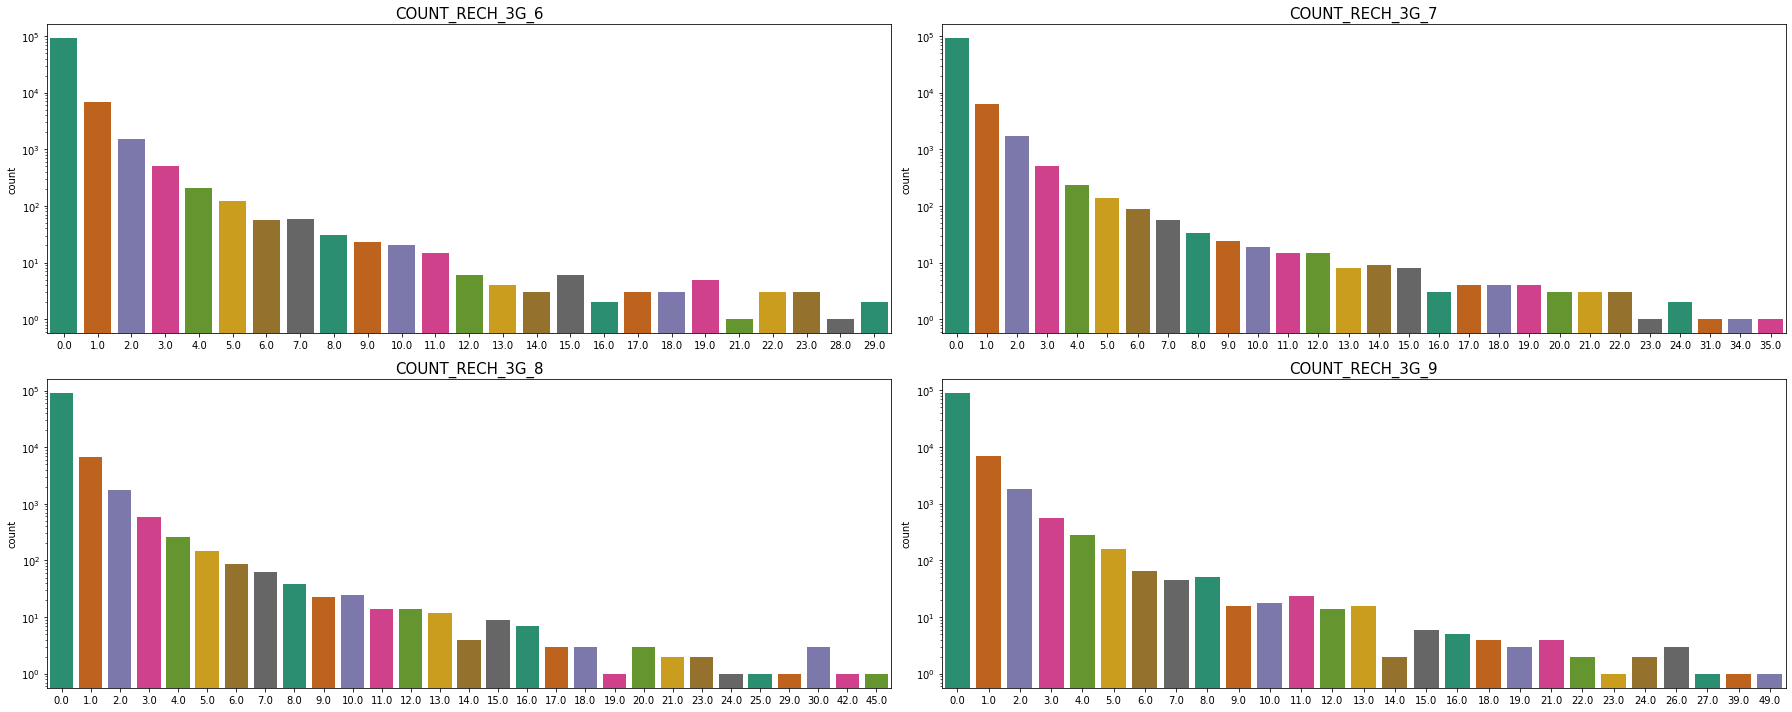

In [28]:
np_features = list(cat_df.filter(regex=('count_rech_3g_')).columns)

plt.figure(figsize = (25, 10))

for item in enumerate(np_features):
    plt.subplot(2,2,item[0]+1)
    sns.countplot(x = item[1], data = cat_df, palette = 'Dark2')
    plt.title(item[1].upper(), fontsize = 15)
    plt.xlabel('')
    plt.yscale('log')
    plt.tight_layout()

#### Observation:
- Above count plot data distribution clearly tells how data is distributed across all groups.
- All moth data clearly indicates that, data is highly right skewed and highly allovated with one category. So better to drop it.

#### max_rech_data variable analsysis
Maximum Recharge data variable holds missing values. We need to do some analysis what is the actual distribution of these missing values. There are 4 variables for this category
- max_rech_data_6
- max_rech_data_7
- max_rech_data_8
- max_rech_data_9

In [29]:
# count_rech_3g variable analysis for month june, july, august and september
print('Maximum Recharge Data\n')
for suffix in month_suffixes:
    print(cat_df[mcol_name('max_rech_data',suffix)].value_counts(dropna=False), '\n')

Maximum Recharge Data

NaN       74846
154.0      4900
25.0       4402
252.0      3144
98.0       1441
198.0      1380
17.0       1274
23.0       1098
145.0      1062
152.0       908
14.0        669
41.0        530
179.0       517
91.0        512
46.0        418
149.0       328
177.0       315
274.0       301
56.0        301
49.0        280
455.0       197
33.0        176
125.0       170
8.0         163
202.0       145
655.0        96
505.0        74
449.0        61
1.0          45
29.0         39
101.0        31
755.0        30
951.0        27
5.0          21
22.0         18
52.0         15
13.0         14
855.0        12
1555.0        9
48.0          6
15.0          5
9.0           5
61.0          4
1255.0        3
295.0         3
1505.0        1
148.0         1
995.0         1
495.0         1
Name: max_rech_data_6, dtype: int64 

NaN       74428
154.0      4915
25.0       4444
252.0      3225
198.0      1585
17.0       1559
98.0       1488
23.0       1216
145.0       952
152.0      

#### Observation:
- Clearly this is a categorical column with many levels. The number of users in category zero are almost negigible.
- If we have to impute, we need to impute this column by mode value which is 154.

In [30]:
# Impute the Mode value in the 'max_rech_data' column, as it is holding majority of the data.
print('Maximum Recharge Data\n')
for suffix in month_suffixes:
    tmp_col = mcol_name('max_rech_data',suffix)
    cat_df.loc[pd.isnull(cat_df[tmp_col]), [tmp_col]] = cat_df[tmp_col].mode()[0] 
    print(cat_df[tmp_col].value_counts(dropna = False), '\n')

Maximum Recharge Data

154.0     79746
25.0       4402
252.0      3144
98.0       1441
198.0      1380
17.0       1274
23.0       1098
145.0      1062
152.0       908
14.0        669
41.0        530
179.0       517
91.0        512
46.0        418
149.0       328
177.0       315
274.0       301
56.0        301
49.0        280
455.0       197
33.0        176
125.0       170
8.0         163
202.0       145
655.0        96
505.0        74
449.0        61
1.0          45
29.0         39
101.0        31
755.0        30
951.0        27
5.0          21
22.0         18
52.0         15
13.0         14
855.0        12
1555.0        9
48.0          6
15.0          5
9.0           5
61.0          4
1255.0        3
295.0         3
148.0         1
995.0         1
495.0         1
1505.0        1
Name: max_rech_data_6, dtype: int64 

154.0     79343
25.0       4444
252.0      3225
198.0      1585
17.0       1559
98.0       1488
23.0       1216
145.0       952
152.0       865
179.0       572
46.0       

#### Observation
Above all missing values are imputed with mode value "1". Now we need to validate data distribution for these categorical variables.

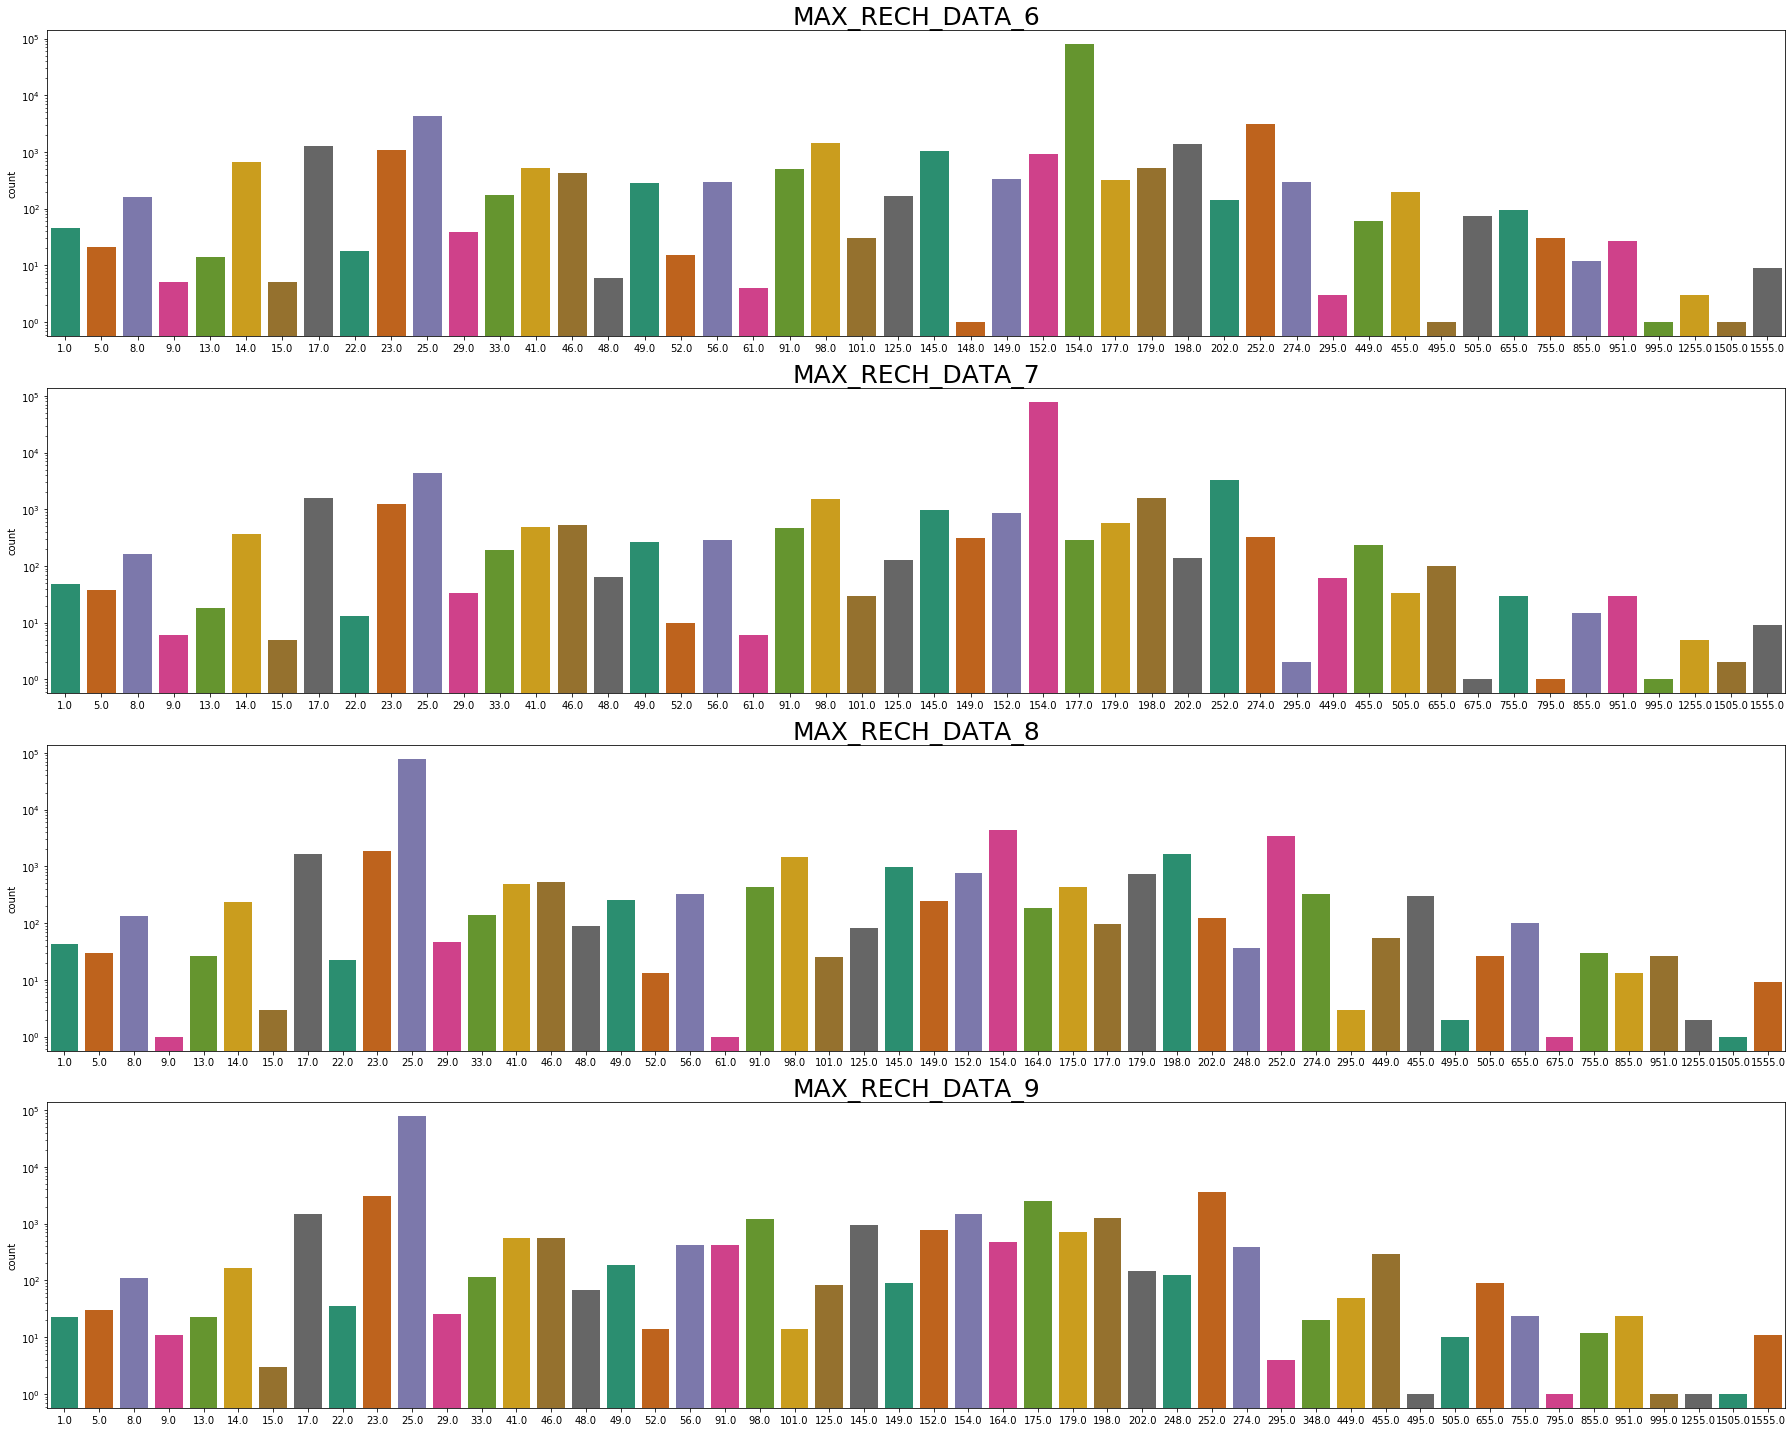

In [31]:
np_features = list(cat_df.filter(regex=('max_rech_data_')).columns)

plt.figure(figsize = (25, 20))

for item in enumerate(np_features):
    plt.subplot(4,1,item[0]+1)
    sns.countplot(x = item[1], data = cat_df, palette = 'Dark2')
    plt.title(item[1].upper(), fontsize = 25)
    plt.xlabel('')
    plt.yscale('log')
    plt.tight_layout()

#### Observation:
- Above count plot data distribution clearly tells how data is distributed across all groups.
- All month data clearly indicates that, data is distributed badly. One variable having 85% of values and its has high variation. So better to drop it.

#### Total amount of 2G and 3G plan
Below features should be created to find toal number from below 2G and 3G related features for different months. These will store the total number of data recharge (count_rech_2g + count_rech_3g ) for each month.

- total_rech_num_data_6 = count_rech_2g_6 + count_rech_3g_6
- total_rech_num_data_7 = count_rech_2g_7 + count_rech_3g_7
- total_rech_num_data_8 = count_rech_2g_8 + count_rech_3g_8 
- total_rech_num_data_9 = count_rech_2g_9 + count_rech_3g_9 

In [32]:
count_features = telecom_df.filter(regex=('count')).columns
telecom_df[count_features].head()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
0              0.0              0.0              0.0              NaN   
1              NaN              1.0              2.0              NaN   
2              NaN              NaN              NaN              1.0   
3              NaN              NaN              NaN              NaN   
4              1.0              NaN              NaN              NaN   

   count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  
0              1.0              1.0              1.0              NaN  
1              NaN              0.0              0.0              NaN  
2              NaN              NaN              NaN              0.0  
3              NaN              NaN              NaN              NaN  
4              0.0              NaN              NaN              NaN

#### Observation:
We can combine both 2g and 3g reach count variables to get total number variable.

In [33]:
# Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
for i in month_suffixes:    
    telecom_df[mcol_name('total_rech_num_data',i)] = (telecom_df[mcol_name('count_rech_2g',i)].fillna(0)+
                                                 telecom_df[mcol_name('count_rech_3g',i)].fillna(0))
telecom_df.filter(regex=('total_rech_num_data')).head()

total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  \
0                    1.0                    1.0                    1.0   
1                    0.0                    1.0                    2.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    1.0                    0.0                    0.0   

   total_rech_num_data_9  
0                    0.0  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0

#### Total reach amount data
Below features should be created to find total amount from the product of total number reached and Total reach amount for different months. These will store the total amount of data recharge (total_rech_num_data * av_rech_amt_data ) for each month.

- total_rech_amt_data_6 = total_rech_num_data_6 * av_rech_amt_data_6 
- total_rech_amt_data_7 = total_rech_num_data_7 * av_rech_amt_data_7
- total_rech_amt_data_8 = total_rech_num_data_8 * av_rech_amt_data_8
- total_rech_amt_data_9 = total_rech_num_data_9 * av_rech_amt_data_9

In [34]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in month_suffixes:
    telecom_df[mcol_name('total_rech_amt_data',i)] = (telecom_df[mcol_name('total_rech_num_data',i)]*
                                                 telecom_df[mcol_name('av_rech_amt_data',i)].fillna(0))
telecom_df.filter(regex=('total_rech_amt_data')).head()

total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8  \
0                  252.0                  252.0                  252.0   
1                    0.0                  154.0                  100.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                   56.0                    0.0                    0.0   

   total_rech_amt_data_9  
0                    0.0  
1                    0.0  
2                   46.0  
3                    0.0  
4                    0.0

#### Observation:
- Above we have derived new feature called "total recharge amount data" with the product of both Total recharge num data and average recharge amount data.
- This new derived variable will be used to add total reacharge amount and get total monthly recharge usage value.

#### Total reach amount
Below features should be created to find toal monthly amount recharge from total recharge amount plus total recharge amout data. These will store the total amount of data recharge (total_rech_num_data * av_rech_amt_data ) for each month.

- total_month_rech_6 = total_rech_amt_6 + total_rech_amt_data_6
- total_month_rech_7 = total_rech_amt_7 + total_rech_amt_data_7
- total_month_rech_8 = total_rech_amt_8 + total_rech_amt_data_8
- total_month_rech_9 = total_rech_amt_9 + total_rech_amt_data_9

In [35]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in month_suffixes[:-1]:
    telecom_df[mcol_name('total_month_rech',i)] = (telecom_df[mcol_name('total_rech_amt',i)]+
                                              telecom_df[mcol_name('total_rech_amt_data',i)])
telecom_df.filter(regex=('total_month_rech')).head()

total_month_rech_6  total_month_rech_7  total_month_rech_8
0               614.0               504.0               504.0
1                74.0               538.0               383.0
2               168.0               315.0               116.0
3               230.0               310.0               601.0
4               252.0               350.0               287.0

#### Observation:
- Above we have derived new feature called "total monthly recharge" for every month while adding both Total recharge amount and total recharge amount data.
- This will be used in high value customer.

#### Dropping all highly missing value variables except last month

In [36]:
#Drop Columns with > 50% of missing values and exclude 9th Month variables which will be used for target variable
mis_columns = telecom_df.columns
mis_percent = telecom_df.isnull().sum() * 100 / len(telecom_df)
mis_value_df = pd.DataFrame({'Column Name': mis_columns, 'Missing Percentage': mis_percent})
drp_columns = mis_value_df.loc[(mis_value_df["Column Name"].str.contains('_9') == False) & (mis_value_df["Missing Percentage"] > 50.0)]["Column Name"]
drp_columns

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
total_rech_data_6                  total_rech_data_6
total_rech_data_7                  total_rech_data_7
total_rech_data_8                  total_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
av_rech_amt_data_6                av_rech_amt_data_6
av_rech_amt_data_7                av_rech_amt_data_7
av_rech_amt_data_8                av_rech_amt_data_8
arpu_3g_6                                  arp

In [37]:
telecom_df.drop(drp_columns, axis = 1, inplace = True)
telecom_df.shape

(99999, 190)

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

    - total_ic_mou_9 : Total incoming minutes of usage
    - total_og_mou_9 : Total outgoing minutes of usage
    - vol_2g_mb_9    : Data volume for 2g
    - vol_3g_mb_9    : Data volume for 3g

In [38]:
def get_churn_status(data, churn_month):
    '''Tags customers as churners based on churn features which are:
    ['vol_2g_mb','vol_3g_mb','total_ic_mou','total_og_mou'] '''
    # Defining features to tag churn customer
    churn_features= ['vol_2g_mb','vol_3g_mb','total_ic_mou','total_og_mou']
    
    # Finding churner based on 4th (Sepetember) month data. 
    flag = ~data[[mcol_name(s,churn_month) for s in churn_features ]].any(axis=1)
    
    # Flagging whether customer is churn or non churn and return  (churn=1, else 0)
    flag = flag.map({True:1, False:0})
    return flag

In [39]:
# churnMonth, indicating the month number to be used to define churn. Here churn month is September (9)
telecom_df['churn'] = get_churn_status(telecom_df, '9')
telecom_df.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN               NaN   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               NaN              0.00               NaN           NaN   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN          0.00           NaN               NaN   
1        150.51        299.54         72.11              0.23   
2         67.41         67.66         64.81              4.34   
3        118.68         37.99         83.03             26.23   
4        241.33        208.16      

In [40]:
# There are users tagged as churners with High-Value Customers.
print(len(telecom_df[telecom_df.churn == 1]))
print(telecom_df.shape[0])
print(round(len(telecom_df[telecom_df.churn == 1])/telecom_df.shape[0] *100,2))

10191
99999
10.19


#### Observation:
- There are nearly 10K records which have churn values and its share is 10% aproximately. 
- This indicates an highly imbalanced data set where the churn cases are the minority **(10%)** and non churners are the majority with **(90%)**

#### Finding all monthly and non-monthly features

In [41]:
# Filtering the common monthly features listed for june, july, august
gen_name = telecom_df.filter(regex ='_6').columns
mon_columns = [item.strip('_6') for item in gen_name]
mon_columns

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'vol_2g_mb',
 'vol_3g_mb',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [42]:
# getting the number of monthly columns and non-monthly features
print ("Total number of columns in data :", telecom_df.shape[1] )
print ("Number of columns for each month : ",len(mon_columns))
print ("Total monthly columns among the orignal columns (%dX4): %d"%(len(mon_columns), len(mon_columns) * 4))
print ("Columns other than monthly columns :", telecom_df.shape[1] - (len(mon_columns) * 4))

Total number of columns in data : 191
Number of columns for each month :  45
Total monthly columns among the orignal columns (45X4): 180
Columns other than monthly columns : 11


#### Observation:
- We have september month features which is not required for our model. So we can drop these features. 
- We have already derived churn values from this variable. So no need to hold this variable wihch is a part of churn phase variable.

In [43]:
# Removing all september month features which are corresponding to the churn phase
sep_columns = telecom_df.filter(regex=('_9')).columns
telecom_df.drop(sep_columns, axis = 1, inplace = True)
telecom_df.shape

(99999, 137)

#### Observation:
After dropping all september month variables, we end of getting 137 variables which will be proceed for model development.

### Finding next level of missing values
Lets check missing values having more than 5% and explore how to manage and impute to avoid issues later. 

In [44]:
# Findig next round of missing values per column expressed as 2% of total number of values
get_missing_values(telecom_df,3)

There are 82 features having more than 3% missing values


onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8       5.38
loc_og_mou_6           3.94
loc_og_mou_7           3.86
loc_og_mou_8           5.38
std_og_t2t_mou_6       3.94
std_og_t2t_mou_7       3.86
std_og_t2t_mou_8       5.38
std_og_t2m_mou_6       3.94
std_og_t2m_mou_7       3.86
std_og_t2m_mou_8       5.38
std_og_t2f_mou_6       3.94
std_og_t2f_mou_7       3.86
std_og_t2f_mou_8    

#### Observation:
- Now we can see total 82 features having missing values with 2%  or more rate. 
- These features are belong with call type related.

  Example: local, std, isd etc. Lets do some analysis reagarding total number of affected customer to decide.

In [45]:
# Listing all features having 8% missing values. Calling getMissingValues function to list down feature list.
missing_cols = list(get_missing_values(telecom_df,3).index)
print(missing_cols)

There are 82 features having more than 3% missing values
['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2

In [46]:
# Finding total number if customers having null/missing values of 2%
print('Missing Customers: ', (len(telecom_df[telecom_df[missing_cols].isnull().all(axis=1)])))

Missing Customers:  435


#### Observation: 
- As per above finding, looks like there are **435 Customers** for whom **all** these features are without any value. We can drop these customers from the data. 
- There are 82 variables are having missing values with 435 customer affected. Row counts are very less so we can drop these records.

In [47]:
telecom_df = telecom_df[~telecom_df[missing_cols].isnull().all(axis = 1)]
telecom_df.shape

(99564, 137)

In [48]:
# Checking any feature still available for 2% of missing value
round(100*(telecom_df[missing_cols].isnull().sum()/len(telecom_df.index)),2)

onnet_mou_6            3.52
onnet_mou_7            3.44
onnet_mou_8            4.96
offnet_mou_6           3.52
offnet_mou_7           3.44
offnet_mou_8           4.96
roam_ic_mou_6          3.52
roam_ic_mou_7          3.44
roam_ic_mou_8          4.96
roam_og_mou_6          3.52
roam_og_mou_7          3.44
roam_og_mou_8          4.96
loc_og_t2t_mou_6       3.52
loc_og_t2t_mou_7       3.44
loc_og_t2t_mou_8       4.96
loc_og_t2m_mou_6       3.52
loc_og_t2m_mou_7       3.44
loc_og_t2m_mou_8       4.96
loc_og_t2f_mou_6       3.52
loc_og_t2f_mou_7       3.44
loc_og_t2f_mou_8       4.96
loc_og_t2c_mou_6       3.52
loc_og_t2c_mou_7       3.44
loc_og_t2c_mou_8       4.96
loc_og_mou_6           3.52
loc_og_mou_7           3.44
loc_og_mou_8           4.96
std_og_t2t_mou_6       3.52
std_og_t2t_mou_7       3.44
std_og_t2t_mou_8       4.96
std_og_t2m_mou_6       3.52
std_og_t2m_mou_7       3.44
std_og_t2m_mou_8       4.96
std_og_t2f_mou_6       3.52
std_og_t2f_mou_7       3.44
std_og_t2f_mou_8    

In [49]:
# missingcol.remove('date_of_last_rech_8')
# missingcol.remove('date_of_last_rech_9')
impute_nan(missing_cols = missing_cols)

In [50]:
# Missing values per column expressed as % of total number of values
get_missing_values(telecom_df,0)

There are 2 features having more than 0% missing values


date_of_last_rech_6    1.48
date_of_last_rech_7    1.47
dtype: float64

#### Observation:
- After impute above variables, we left with two datetime variables which are not imputed with 0 as it is datetime variable.
- So we can validate other datetime variables if any to drop all datatime variable which is not contributing much for the model.

In [51]:
# list of all columns which store date
date_columns = list(telecom_df.filter(regex='date').columns)
date_columns

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

#### Observation: 
There are total 3 datetime variable in the telecom churn data frame. So we can drop these variables which does not have contribution towards model building

In [52]:
telecom_df.drop(date_columns, axis = 1, inplace = True)
telecom_df.shape

(99564, 134)

#### Observation:
All the above date variables are dropped as those are not necessary for model building and they dont show any contribution.

#### - Let's look for columns having all values as 0.

In [53]:
get_missing_values(telecom_df,0)

There are 0 features having more than 0% missing values


Series([], dtype: float64)

#### Observation:
- There are no further columns with missing values.
- So we can proceed for Exploratory Data Analysis.

In [54]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(telecom_df.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(telecom_df.shape[0]))
print ("Number of features: {}".format(telecom_df.shape[1]))

Percentage of data remaining after treating missing values: 99.56%
Number of customers: 99564
Number of features: 134


#### Observation:
- After missing value treatment, we have validated total left over data points and variables which are going to use for model building.
- There are nearly **99.6%** data points available. Total data points are **99,564** and Total variables are **134**

#### Resetting index for telecom churn dataset.

In [55]:
# Resetting the index of telecom_df dataset
telecom_df.reset_index(inplace = True, drop = True)

In [56]:
# Checking telecom_df info
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99564 entries, 0 to 99563
Columns: 134 entries, arpu_6 to churn
dtypes: float64(108), int64(26)
memory usage: 101.8 MB


### Creating new feature:
Deriving new features are one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

### Volume data in MB
Below features should be cretaed to find total data volume in MB consumed by user.
- vol_data_mb_6 = vol_2g_mb_6 + vol_3g_mb_6
- vol_data_mb_7 = vol_2g_mb_7 + vol_3g_mb_7
- vol_data_mb_8 = vol_2g_mb_8 + vol_3g_mb_8

In [57]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8'
for i in month_suffixes[:-1]:
    telecom_df[mcol_name('vol_data_mb',i)] = (telecom_df[mcol_name('vol_2g_mb',i)] + telecom_df[mcol_name('vol_3g_mb',i)])

In [58]:
volColumn = telecom_df.filter(regex=('vol_data_mb')).columns
telecom_df[volColumn].isnull().sum()

vol_data_mb_6    0
vol_data_mb_7    0
vol_data_mb_8    0
dtype: int64

#### Observation:
- Above Volume data MB is created from adding both Volume 2G MB and Volume 3G MB variable. 
- Validating all new variables and found no missing values.

### Average amount features
Below features should be created to find average amount from features from different months. These features will store the average recharge value for each customer for every month.

- avg_rech_amt_6 = total_rech_amt_6 / total_rech_num_6
- avg_rech_amt_7 = total_rech_amt_7 / total_rech_num_7
- avg_rech_amt_8 = total_rech_amt_8 / total_rech_num_8

In [59]:
# Creating new feature: avg_rech_amt_6, avg_rech_amt_7, avg_rech_amt_8
for i in month_suffixes[:-1]:
    telecom_df[mcol_name('avg_rech_amt',i)] = round(telecom_df[mcol_name('total_rech_amt',i)]/
                                               telecom_df[mcol_name('total_rech_num',i)]+1,2)

In [60]:
# Finding missing values for above created average amount features for each month
avg_col = ['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8']#,'avg_rech_amt_9']
telecom_df[avg_col].isnull().sum()

avg_rech_amt_6    1473
avg_rech_amt_7    1459
avg_rech_amt_8    3187
dtype: int64

#### Observation:
- Above average recharge amount is created from dividing total reacharge amount with total recharge num.
- Validating all new variables and found missing values which are generated while dividing recharge num having 0 values.

In [61]:
# Impute missing values in above average amount features created for each month
impute_nan(missing_cols = avg_col)
telecom_df[avg_col].isnull().sum()

avg_rech_amt_6    0
avg_rech_amt_7    0
avg_rech_amt_8    0
dtype: int64

In [62]:
telecom_df.filter(regex=('avg_rech_amt')).head()

avg_rech_amt_6  avg_rech_amt_7  avg_rech_amt_8
0            91.5           85.00          127.00
1            19.5           43.67           26.73
2            34.6           79.75           59.00
3            24.0           29.18           34.39
4            40.2           59.33           96.67

#### Observation:
- Above average recharge amount is validated after removal of missing values and filtered as good.

### Filter high-value customers
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

As mentioned above, you need to predict churn only for the high-value customers. Define **high-value** customers as follows:
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months **(the good phase)**.
- After filtering the high-value customers, you should get about **29.9k** rows.

In [63]:
# calculating the avegare of first two months (good phase) total monthly recharge amount
good_phase_avg = (telecom_df['total_month_rech_6'] + telecom_df['total_month_rech_7'])/2

# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
cutoff = np.percentile(good_phase_avg, 70)

# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
hvc_df = telecom_df[good_phase_avg >=  cutoff]

# Resetting the index of dataset
hvc_df.reset_index(inplace = True, drop = True)

print(len(hvc_df))
print(round((len(hvc_df) / telecom_df.shape[0] * 100), 2))

29869
30.0


#### Observation:
- Number of High-Value Customers in the Telecom churn dataset: **29.9 K**. These data will be used in model building.
- Percentage High-value users in data : **30%** which will be used for final model building.

## Exploratory Data Analysis
Defining few generic functions to draw visualization for exploratory data analysis which will help in generaing insights and findings.

Below function is defined to draw histogram. This function accept dataset, variable and binsize where it will create certain level of categories using bin and generate histogram.

#### PlotAvgMonthlyCalls
Below generic function definition provides plot for average monthly calls in various plot types such as multi features and single features. 
- Multiline plots are created for yearly data and generate in x-axis and monthly average in y-axis. So we can generate Minutes of Unit vs Area of Network
- Single line plots are created for four months(June, July, August and September) data. This plot will generate data based on Minutes of Unit vs Month.

In [64]:
def plot_avg_monthly_calls(plt_type, data, call_type, col_list):
    '''Provides plot for average monthly calls in various plot types such as multi features and single features.
        Multiline plots are created for yearly data and generate in x-axis and monthly average in y-axis. 
            So we can generate Minutes of Unit vs Area of Network
        Single line plots are created for four months(June, July, August and September) data. 
            This plot will generate data based on Minutes of Unit vs Month. '''
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    # multiple line plot
    if plt_type == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin', as_index = False)[col_list].mean())
        total_call_mou['aon_bin'] = pd.to_numeric(total_call_mou['aon_bin'])
        
        num=0
        fig, ax = plt.subplots(figsize = (15, 8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num += 1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker ='', color = palette(num), 
                    linewidth = 2, alpha = 0.9, label = column)
         
        ## Adding legend for the multi variable plot
        plt.legend(loc = 2, ncol = 2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Adding titles
        plt.title("Avg.Monthly "+ call_type +" MOU  V/S AON", loc = 'left', fontsize = 12, fontweight = 0, 
                  color = 'orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+ call_type +" MOU")
    
    # signle line plot
    elif plt_type == 'single':
        fig, ax = plt.subplots(figsize = (8, 4))
        ax.plot(data[col_list].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Adding titles
        plt.title("Avg. "+ call_type +" MOU  V/S Month", loc = 'left', fontsize = 12, fontweight = 0, color = 'orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+ call_type +" MOU")
        
    plt.show()

#### PlotChurnVsMOU
- Below generic function is defined to plot churn value with compare to Minutes of Unit. 
- Different variables can be passed as argument to draw plot for various month (June, July, August and September).

In [65]:
def plot_churn_vs_mou(data, col_list, call_type):
    '''Plot churn value with compare to Minutes of Unit.
        Different variables can be passed as argument to draw plot for various month (June, July, August and September).
    '''
    fig, ax = plt.subplots(figsize=(10,5))
    
    df = data.groupby(['churn'])[col_list].mean().T
    
    # Ploting dataset values.
    plt.plot(df)
    
    # Defining x-axis labels as 3 month (2 Good Phase and 1 Action Phase)
    ax.set_xticklabels(['Jun', 'Jul', 'Aug'])
    
    # Adding legend
    plt.legend(['Non-Churn', 'Churn'])
    
    # Adding titles
    plt.title("Avg. "+ call_type +" MOU  V/S Month", loc = 'center', fontsize = 12, fontweight = 0, color = 'orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+ call_type +" MOU")
    plt.show()

#### PlotChurn
Below funtion is defined to plot Churn for various monthly columns such as June, July and August those are belong to Good and Action phase.

In [66]:
def plot_churn(hv_cust, mon_columns):
    '''Plot Churn for various monthly columns such as June, July and August those are belong to Good and Action phase.'''
    plt.subplots(figsize = (15,20))

    for i,mon in enumerate(mon_columns):
        ax = plt.subplot(5,2,i+1)

        col_list=list(hv_cust.filter(regex=(mon)).columns)
        col_list = col_list[:3]

        plt.plot(hv_cust.groupby('churn')[col_list].mean().T)
        ax.set_xticklabels(['June', 'July', 'August'])

        ## Add legend
        plt.legend(['Non-Churn', 'Churn'], fontsize = 12)

        # Add titles
        plt.title( str(mon) +" V/S Month", loc = 'center', fontsize = 20, fontweight = 0, color = 'green')

        plt.ylabel(mon, fontsize = 16)
        plt.xticks(fontsize = 16)
        plt.yticks(fontsize = 16)
        plt.tight_layout()

#### Finding all monthly variables

In [67]:
# Filtering the common monthly features listed for june, july, august
gen_name = hvc_df.filter(regex ='_6').columns
mon_columns = [item.strip('_6') for item in gen_name]
print(mon_columns)

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'vbc_3g', 'total_rech_num_data', 'total_rech_amt_data', 'total_month_rech', 'vol_data_mb', 'avg_rech_amt']


#### Listing all featues which are not related to month

In [68]:
# list of all the monthly columns for the month of June, July and August
all_mon_columns = [mcol_name(x,s) for s in month_suffixes[:-1] for x in mon_columns]

# list of column which are not monthly columns
non_mon_columns = [col for col in hvc_df.columns if col not in all_mon_columns]
non_mon_columns

['aon', 'churn']

### Churn varibale analysis
Churn variable is a target variable and need to be visualized its variation and its data distribution.

In [69]:
# Finding value counts of circle_id
hvc_df.churn.value_counts()

0    27457
1     2412
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

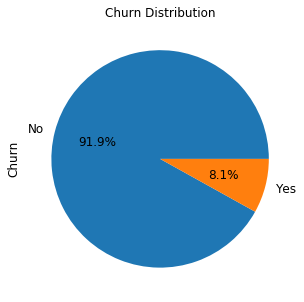

In [70]:
#Churn Distribution
ax = (hvc_df['churn'].value_counts()*100.0 /len(hvc_df)).plot.pie(autopct='%.1f%%', 
                                                                  labels = ['No', 'Yes'],
                                                                  figsize =(5,5), fontsize = 12 )  
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

#### Observation:
- We have very less churn in the dataset. its nearly 8% and so less. Its not distributed properly.
- This churn values are imbalance and it should be balanced before modeling.

### AON variable analysis
Age on network varaible is a required feature for model building. Lets so some analysis how it going to contribute in model.

In [71]:
# Checking high volume customer distributions
hvc_df.aon.describe()

count    29869.000000
mean      1209.423483
std        957.382273
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

#### Observation:
- Minimun **Age** on network is 180 days.
- Average **Age** on network for customers is 1200 days (~3.5 years).

### Monthly Age analysis
- Age on network holds total days where customer is using network. This AON varibale will derive various categories such as monthly and annually.
- Montly categories can be created with dividing 30 (each month), Annually with  dividing 365 (one year)

In [72]:
#Conevrt AON in Months
hvc_df['aon_mon'] = hvc_df['aon']/30
hvc_df['aon_mon'].head()

0    32.266667
1    26.733333
2    10.500000
3    24.000000
4    20.133333
Name: aon_mon, dtype: float64

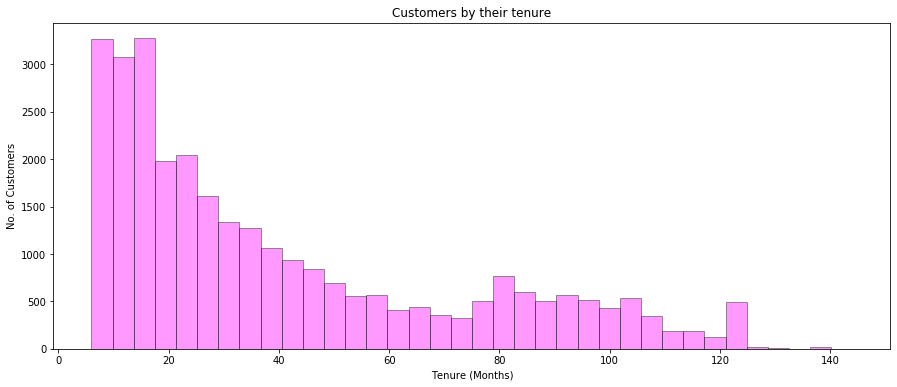

In [73]:
# Lets check the aon_month data distribution
plt.figure(figsize = (15, 6))
ax = sns.distplot(hvc_df['aon_mon'], hist=True, kde=False, bins = int(180/5), color = 'magenta', 
                  hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (Months)')
ax.set_title('Customers by their tenure')
plt.show()

#### Observation:
- Above visualizatoin shows monthly categories on month which is called Tenure. Age on network defines its values across month.
- Monthly AON data distribution is righly skewed. Initial months have more count then later periods. Data gradually decreases while age grows.

### Tenue Range
- This tenue range categorical variable is created from aon_mon variable which is a month category variable. 
- Tenure range yearly variable will derive 1/2 yearly, yearly, 1-2 year, 2-5 years and above 5 years categories.

In [74]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
hvc_df['tenure_range'] = pd.cut(hvc_df['aon_mon'], tn_range, labels = tn_label)
hvc_df['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

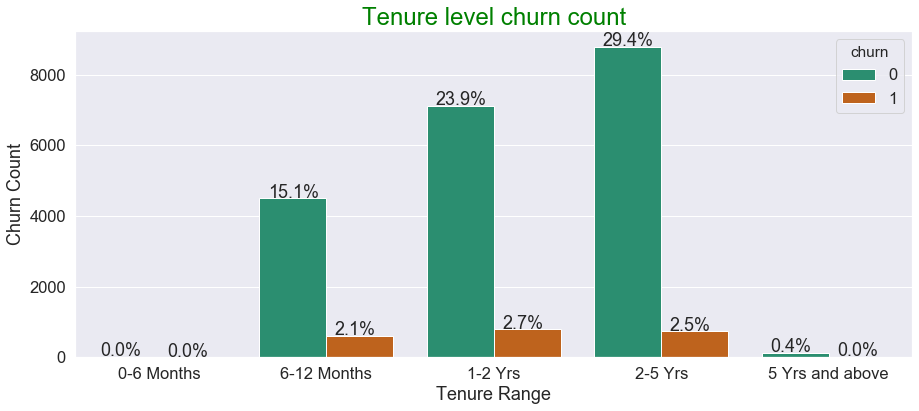

In [75]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()

width = len(hvc_df['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width - 1 , 6)

total = float(len(hvc_df.index))
ax = sns.countplot(x = "tenure_range", data = hvc_df, palette = "Dark2", hue = "churn");

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(hvc_df))), 
                (p.get_x()+0.05, p.get_height()+20))

plt.xlabel('Tenure Range')
plt.ylabel('Churn Count')
plt.title('Tenure level churn count', fontsize = 24, color = 'green' )
plt.show()

### Tenue Yearly
- Above tenue range is derived as yearly but categorically not sufficient to visualize the series of data and its distribution.
- So we need to define each year data transition and its distribution to visualize and analysis. Created yearly bin for this yearly tenure.

In [76]:
tn_range = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
tn_label = [ '1-2 Yrs', '2-3 Yrs', '3-4 Yrs', '4-5 Yrs', '5-6 Yrs', '6-7 Yrs', '7-8 Yrs', 
            '8-9 Yrs', '9-10 Yrs', '10 Yrs and above']
hvc_df['tenure_year'] = pd.cut(hvc_df['aon_mon'], tn_range, labels = tn_label)
hvc_df['tenure_year'].head()

0    3-4 Yrs
1    3-4 Yrs
2    1-2 Yrs
3    2-3 Yrs
4    2-3 Yrs
Name: tenure_year, dtype: category
Categories (10, object): [1-2 Yrs < 2-3 Yrs < 3-4 Yrs < 4-5 Yrs ... 7-8 Yrs < 8-9 Yrs < 9-10 Yrs < 10 Yrs and above]

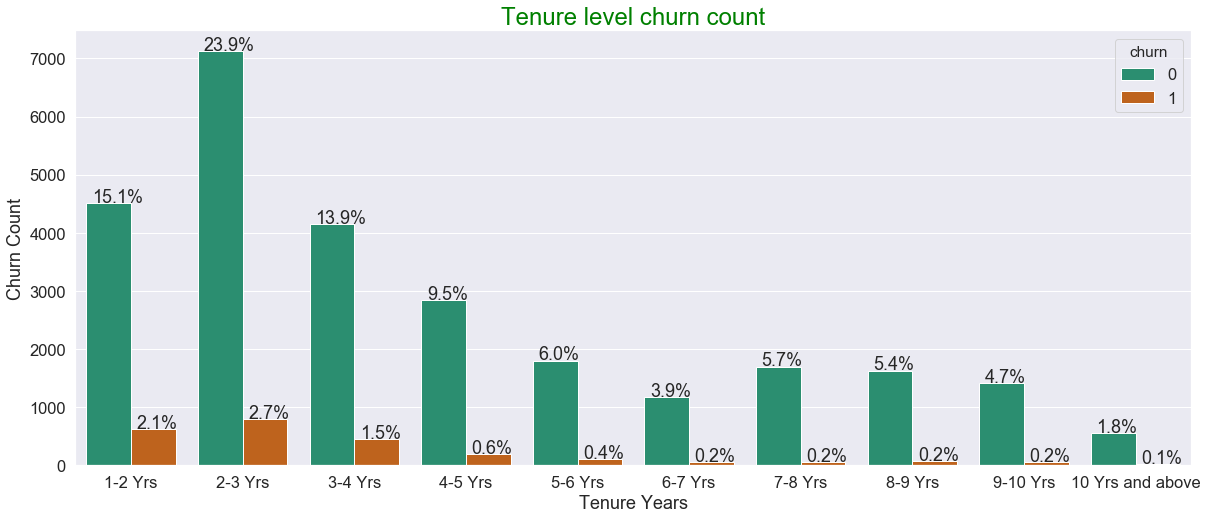

In [77]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_year')
fig, ax = plt.subplots()

width = len(hvc_df['tenure_year'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width - 1 , 8)

total = float(len(hvc_df.index))
ax = sns.countplot(x = "tenure_year", data = hvc_df, palette = "Dark2", hue = "churn");

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(hvc_df))), 
                (p.get_x()+0.05, p.get_height()+20))

plt.xlabel('Tenure Years')
plt.ylabel('Churn Count')
plt.title('Tenure level churn count', fontsize = 24, color = 'green' )
plt.show()

#### Observation:
- **27%** of high value customer exist in 2nd year. This is highest level compare to other years. Where 24% are non churner and 3% are chrun.
- First 4 consecutive years, we can see almost **71%** users have Age on network. And having 80% of non churners and 20% are churn.
- Last 7 consecutive years have only **29%** users are with the network. Majority values are non churners.

### Categorical variable Analysis

#### Creating visuals to validate the values
- Creating a generic function to define value ditribution and its infrence in the model.
- If we dont requried these variables then we can drop to improve the model.

In [78]:
def plot_cat_variable(data, var_name, grp_name, size):
    '''Plots count details of each categorial variable to trace its value distributions.'''
    plt.figure(figsize = (size, 6))
    
    # Plotting count plot with categorical variable with group in churn value
    sns.countplot(x = var_name, hue = grp_name, data = data, palette = 'Dark2')
    plt.title(var_name.upper() + ' Vs Churn' )
    
    # Adding legend
    plt.legend(['Non-Churn', 'Churn'], loc='upper right')

    # Convering y scale value as logarithmic to normalize all values
    plt.yscale('log')
    
    # Visualize x and y label
    plt.xlabel(var_name.upper())
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

In [79]:
# Searching categorical variables
hvc_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   



### monthly_2g variable analysis
This is a categorical varibale which holds monthly 2G data packs which customer bought in a group basis. We can see these groups for June, July and August month.

#### monthly_2g_6

In [80]:
# Checking the value counts of monthly_2g_6 column
hvc_df['monthly_2g_6'].value_counts(normalize = True)

0    0.846229
1    0.134152
2    0.018447
3    0.000937
4    0.000234
Name: monthly_2g_6, dtype: float64

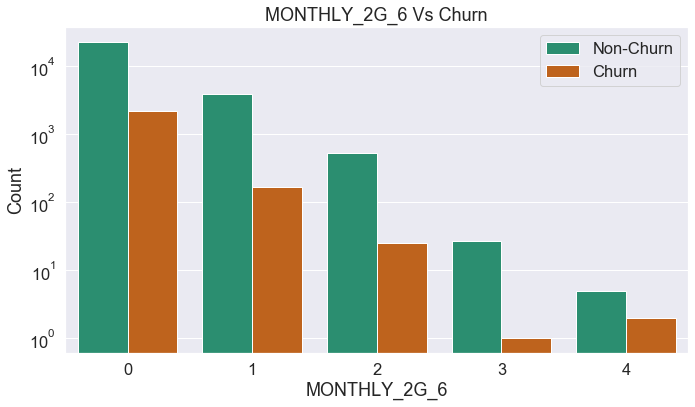

In [81]:
# Visualize bar graph on monthly 2G for june month
plot_cat_variable(hvc_df, 'monthly_2g_6', 'churn', 10)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 85% of data. So this group will not contribute much in model building. Better to drop this variable.

#### monthly_2g_7

In [82]:
# Checking the value counts of monthly_2g_7 column
hvc_df['monthly_2g_7'].value_counts(normalize = True)

0    0.841307
1    0.135626
2    0.021728
3    0.001105
4    0.000167
5    0.000067
Name: monthly_2g_7, dtype: float64

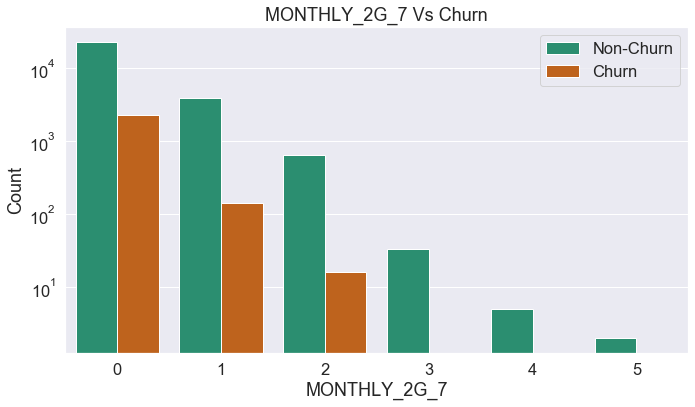

In [83]:
# Visualize bar graph on monthly 2G for july month
plot_cat_variable(hvc_df, 'monthly_2g_7', 'churn', 10)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 85% of data. So this group will not contribute much in model building. Better to drop this variable.

#### monthly_2g_8

In [84]:
# Checking the value counts of monthly_2g_8 column
hvc_df['monthly_2g_8'].value_counts(normalize = True)

0    0.861863
1    0.124477
2    0.012320
3    0.001004
4    0.000268
5    0.000067
Name: monthly_2g_8, dtype: float64

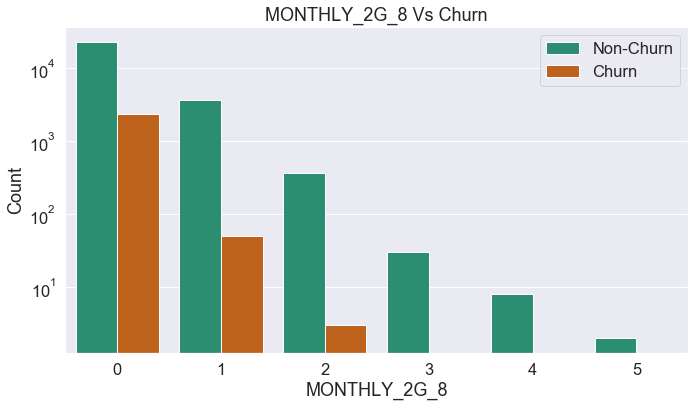

In [85]:
# Visualize bar graph on monthly 2G for august month
plot_cat_variable(hvc_df, 'monthly_2g_8', 'churn', 10)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 86% of data. So this group will not contribute much in model building. Better to drop this variable.

### monthly_3g variable analysis
This is a categorical varibale which holds monthly 3G data packs which customer bought in a group basis. We can see these groups for June, July and August month.

#### monthly_3g_6

In [86]:
# Checking the value counts of monthly_3g_6 column
hvc_df['monthly_3g_6'].value_counts(normalize = True)

0     0.844755
1     0.114232
2     0.028424
3     0.007935
4     0.002544
5     0.001138
6     0.000402
7     0.000301
8     0.000100
11    0.000067
9     0.000067
14    0.000033
Name: monthly_3g_6, dtype: float64

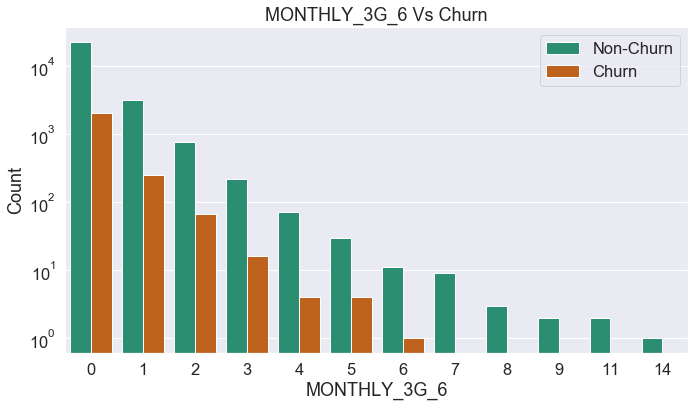

In [87]:
# Visualize bar graph on monthly 3G for june month
plot_cat_variable(hvc_df, 'monthly_3g_6', 'churn', 10)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 85% of data. So this group will not contribute much in model building. Better to drop this variable.

#### monthly_3g_7

In [88]:
# Checking the value counts of monthly_3g_7 column
hvc_df['monthly_3g_7'].value_counts(normalize = True)

0     0.843282
1     0.109846
2     0.033680
3     0.007600
4     0.002477
5     0.001406
6     0.000870
7     0.000335
8     0.000167
9     0.000134
11    0.000067
14    0.000033
12    0.000033
10    0.000033
16    0.000033
Name: monthly_3g_7, dtype: float64

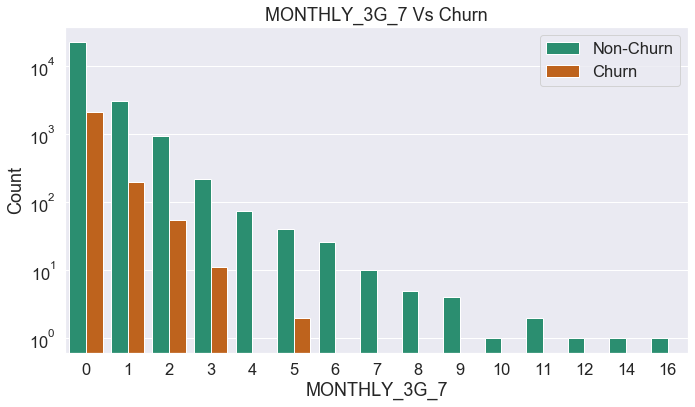

In [89]:
# Visualize bar graph on monthly 3G for july month
plot_cat_variable(hvc_df, 'monthly_3g_7', 'churn', 10)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 85% of data. So this group will not contribute much in model building. Better to drop this variable.

#### monthly_3g_8

In [90]:
# Checking the value counts of monthly_3g_8 column
hvc_df['monthly_3g_8'].value_counts(normalize = True)

0     0.852924
1     0.104824
2     0.029562
3     0.007499
4     0.003047
5     0.001071
6     0.000469
7     0.000301
9     0.000100
8     0.000100
10    0.000067
16    0.000033
Name: monthly_3g_8, dtype: float64

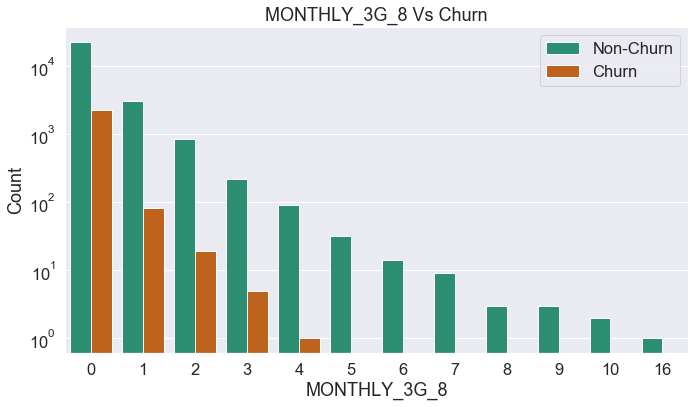

In [91]:
# Visualize bar graph on monthly 3G for august month
plot_cat_variable(hvc_df, 'monthly_3g_8', 'churn', 10)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 85% of data. So this group will not contribute much in model building. Better to drop this variable.

### sachet_2g variable analysis
This is a categorical varibale which holds sachet 2G data packs which customer bought in a group basis. We can see these groups for June, July and August month.

#### sachet_2g_6

In [92]:
# Checking the value counts of sachet_2g_6 column
hvc_df['sachet_2g_6'].value_counts(normalize = True)

0     0.707757
1     0.103485
2     0.050286
3     0.031404
4     0.024775
5     0.017275
6     0.014865
7     0.011350
8     0.009743
9     0.007667
10    0.006495
11    0.003984
12    0.003716
13    0.001774
14    0.001473
15    0.000937
17    0.000603
16    0.000536
19    0.000435
18    0.000435
22    0.000234
20    0.000201
21    0.000167
24    0.000100
25    0.000100
30    0.000033
39    0.000033
34    0.000033
42    0.000033
27    0.000033
32    0.000033
Name: sachet_2g_6, dtype: float64

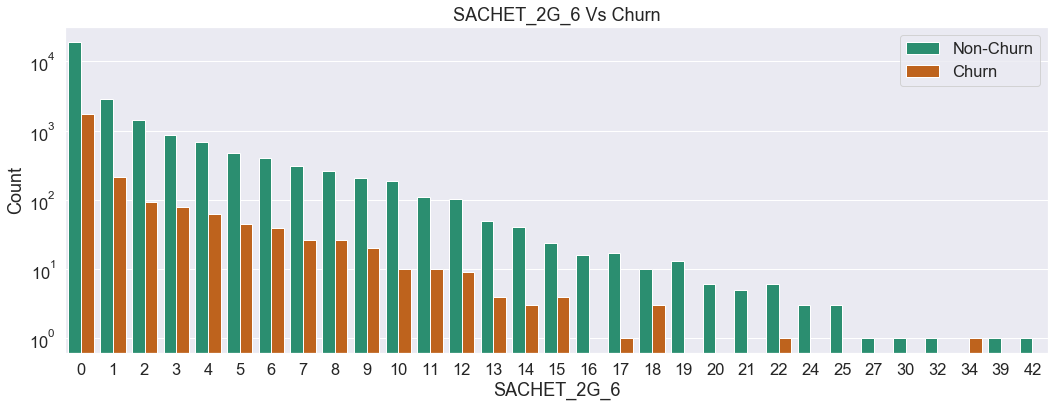

In [93]:
# Visualize bar graph on sachet 2G for june month
plot_cat_variable(hvc_df, 'sachet_2g_6', 'churn', 15)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 70% of data. So this group will not contribute much in model building. Better to drop this variable.

#### sachet_2g_7

In [94]:
# Checking the value counts of sachet_2g_7 column
hvc_df['sachet_2g_7'].value_counts(normalize = True)

0     0.698952
1     0.093240
2     0.047976
3     0.028960
4     0.028458
5     0.023235
6     0.019987
7     0.013927
8     0.011919
10    0.008136
9     0.006830
11    0.005323
12    0.004352
14    0.001841
13    0.001841
15    0.001105
16    0.000904
18    0.000636
17    0.000469
19    0.000402
20    0.000368
23    0.000201
22    0.000167
21    0.000167
27    0.000100
26    0.000100
30    0.000067
32    0.000067
24    0.000067
48    0.000033
25    0.000033
29    0.000033
28    0.000033
42    0.000033
35    0.000033
Name: sachet_2g_7, dtype: float64

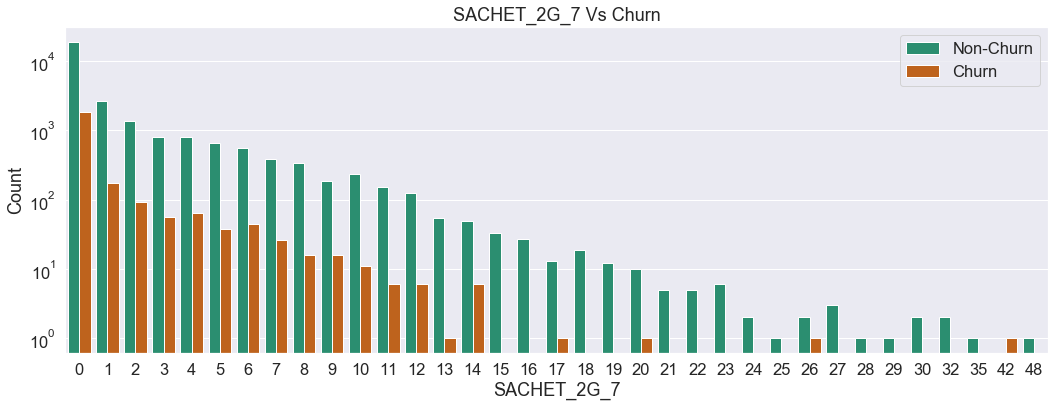

In [95]:
# Visualize bar graph on sachet 2G for july month
plot_cat_variable(hvc_df, 'sachet_2g_7', 'churn', 15)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 70% of data. So this group will not contribute much in model building. Better to drop this variable.

#### sachet_2g_8

In [96]:
# Checking the value counts of sachet_2g_8 column
hvc_df['sachet_2g_8'].value_counts(normalize = True)

0     0.714520
1     0.103217
2     0.044628
3     0.029295
4     0.024641
5     0.020791
6     0.015535
7     0.009977
8     0.009307
9     0.006595
10    0.005658
11    0.004419
12    0.003381
14    0.002042
13    0.001640
15    0.001038
16    0.000904
18    0.000435
17    0.000368
19    0.000335
20    0.000301
24    0.000201
22    0.000134
25    0.000100
21    0.000067
23    0.000067
34    0.000067
27    0.000067
32    0.000067
29    0.000067
26    0.000033
33    0.000033
44    0.000033
31    0.000033
Name: sachet_2g_8, dtype: float64

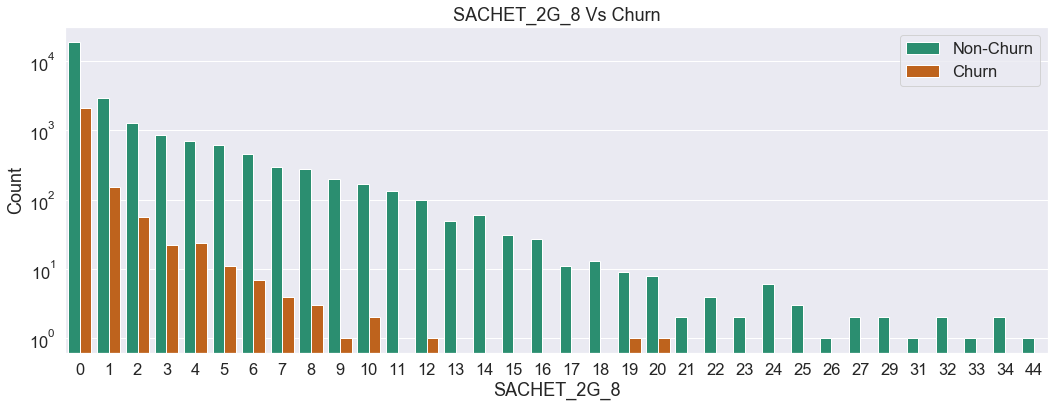

In [97]:
# Visualize bar graph on sachet 2G for august month
plot_cat_variable(hvc_df, 'sachet_2g_8', 'churn', 15)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 71% of data. So this group will not contribute much in model building. Better to drop this variable.

### sachet_3g variable analysis
This is a categorical varibale which holds sachet 3G data packs which customer bought in a group basis. We can see these groups for June, July and August month.

#### sachet_3g_6

In [98]:
# Checking the value counts of sachet_3g_6 column
hvc_df['sachet_3g_6'].value_counts(normalize = True)

0     0.891928
1     0.073019
2     0.016907
3     0.006428
4     0.003415
5     0.002076
7     0.001473
6     0.001373
9     0.000770
8     0.000670
10    0.000402
11    0.000335
15    0.000167
14    0.000134
12    0.000134
19    0.000134
23    0.000100
18    0.000100
13    0.000100
22    0.000100
29    0.000067
16    0.000067
21    0.000033
28    0.000033
17    0.000033
Name: sachet_3g_6, dtype: float64

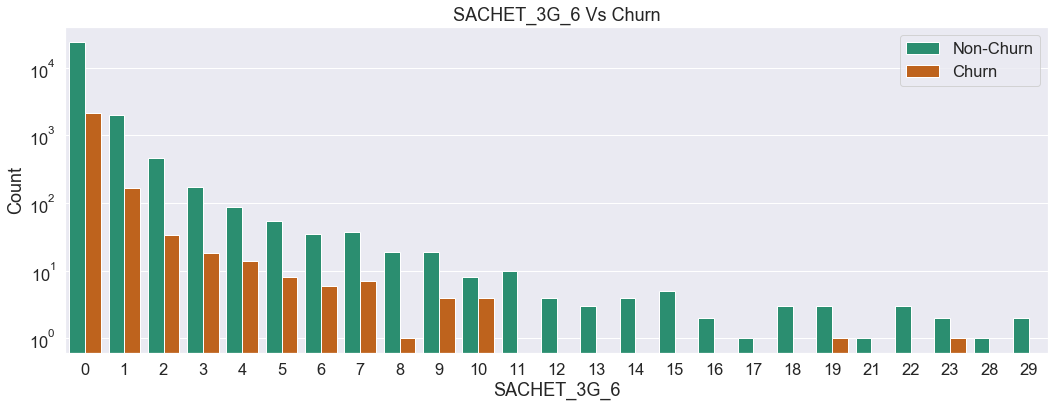

In [99]:
# Visualize bar graph on sachet 3G for june month
plot_cat_variable(hvc_df, 'sachet_3g_6', 'churn', 15)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 90% of data. So this group will not contribute much in model building. Better to drop this variable.

#### sachet_3g_7

In [100]:
# Checking the value counts of sachet_3g_7 column
hvc_df['sachet_3g_7'].value_counts(normalize = True)

0     0.893334
1     0.067729
2     0.017376
3     0.006930
4     0.004018
5     0.003381
6     0.002143
7     0.001038
9     0.000670
8     0.000636
11    0.000435
10    0.000435
12    0.000435
15    0.000234
14    0.000201
18    0.000167
13    0.000167
20    0.000100
19    0.000100
22    0.000100
17    0.000067
16    0.000067
21    0.000067
24    0.000067
33    0.000033
35    0.000033
31    0.000033
Name: sachet_3g_7, dtype: float64

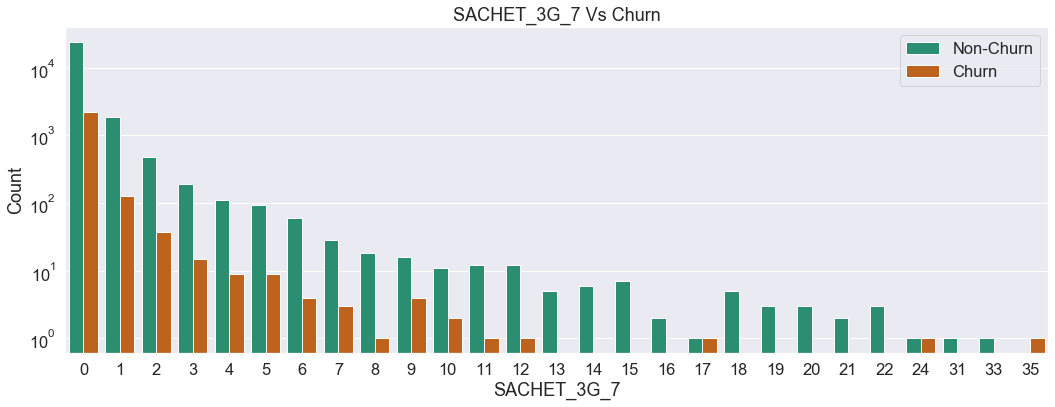

In [101]:
# Visualize bar graph on sachet 3G for july month
plot_cat_variable(hvc_df, 'sachet_3g_7', 'churn', 15)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 90% of data. So this group will not contribute much in model building. Better to drop this variable.

#### sachet_3g_8

In [102]:
# Checking the value counts of sachet_3g_8 column
hvc_df['sachet_3g_8'].value_counts(normalize = True)

0     0.911279
1     0.055308
2     0.013459
3     0.006361
4     0.003649
5     0.002946
6     0.001473
7     0.001172
8     0.001004
9     0.000636
10    0.000502
13    0.000368
12    0.000368
11    0.000268
14    0.000201
15    0.000201
21    0.000100
20    0.000100
18    0.000100
16    0.000100
30    0.000067
23    0.000067
17    0.000067
38    0.000033
41    0.000033
19    0.000033
29    0.000033
25    0.000033
27    0.000033
Name: sachet_3g_8, dtype: float64

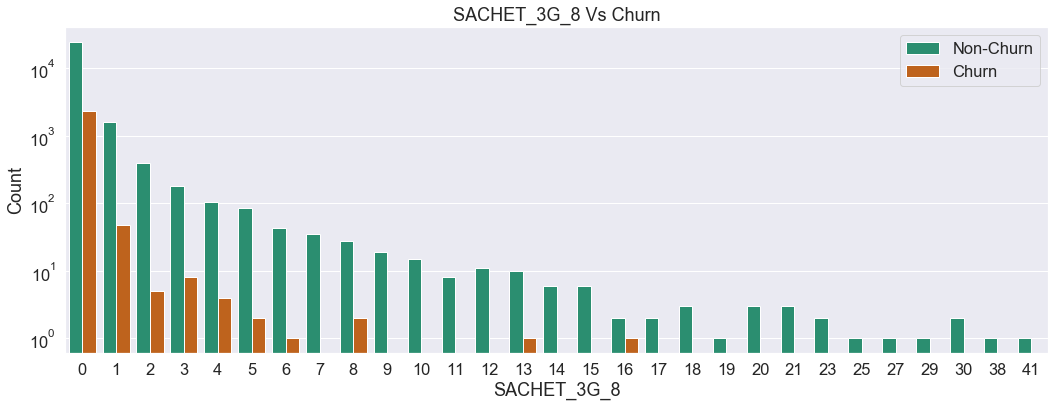

In [103]:
# Visualize bar graph on sachet 3G for august month
plot_cat_variable(hvc_df, 'sachet_3g_8', 'churn', 15)

#### Observation:
- Above plot analysis clearly shows, data is not normally distributted.
- 0th category which is called "Nothing" holds 91% of data. So this group will not contribute much in model building. Better to drop this variable.

### Plotting all categorical variables in one area to compare its distributions and trend
1. Listing down all categorical variable and saved in one common variable
2. Plotting all categorical variable using bar plot to see its monthly trend.
3. Drop variable if it is not contributing much in the model building.

In [104]:
# Gathering categorical variables which are defined as ordinal
mon_2g = list(hvc_df.filter(regex=('monthly_2g')).columns)
mon_3g = list(hvc_df.filter(regex=('monthly_3g')).columns)
sac_2g = list(hvc_df.filter(regex=('sachet_2g')).columns)
sac_3g = list(hvc_df.filter(regex=('sachet_3g')).columns)

cat_columns = mon_2g + mon_3g + sac_2g + sac_3g
print(cat_columns)

['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


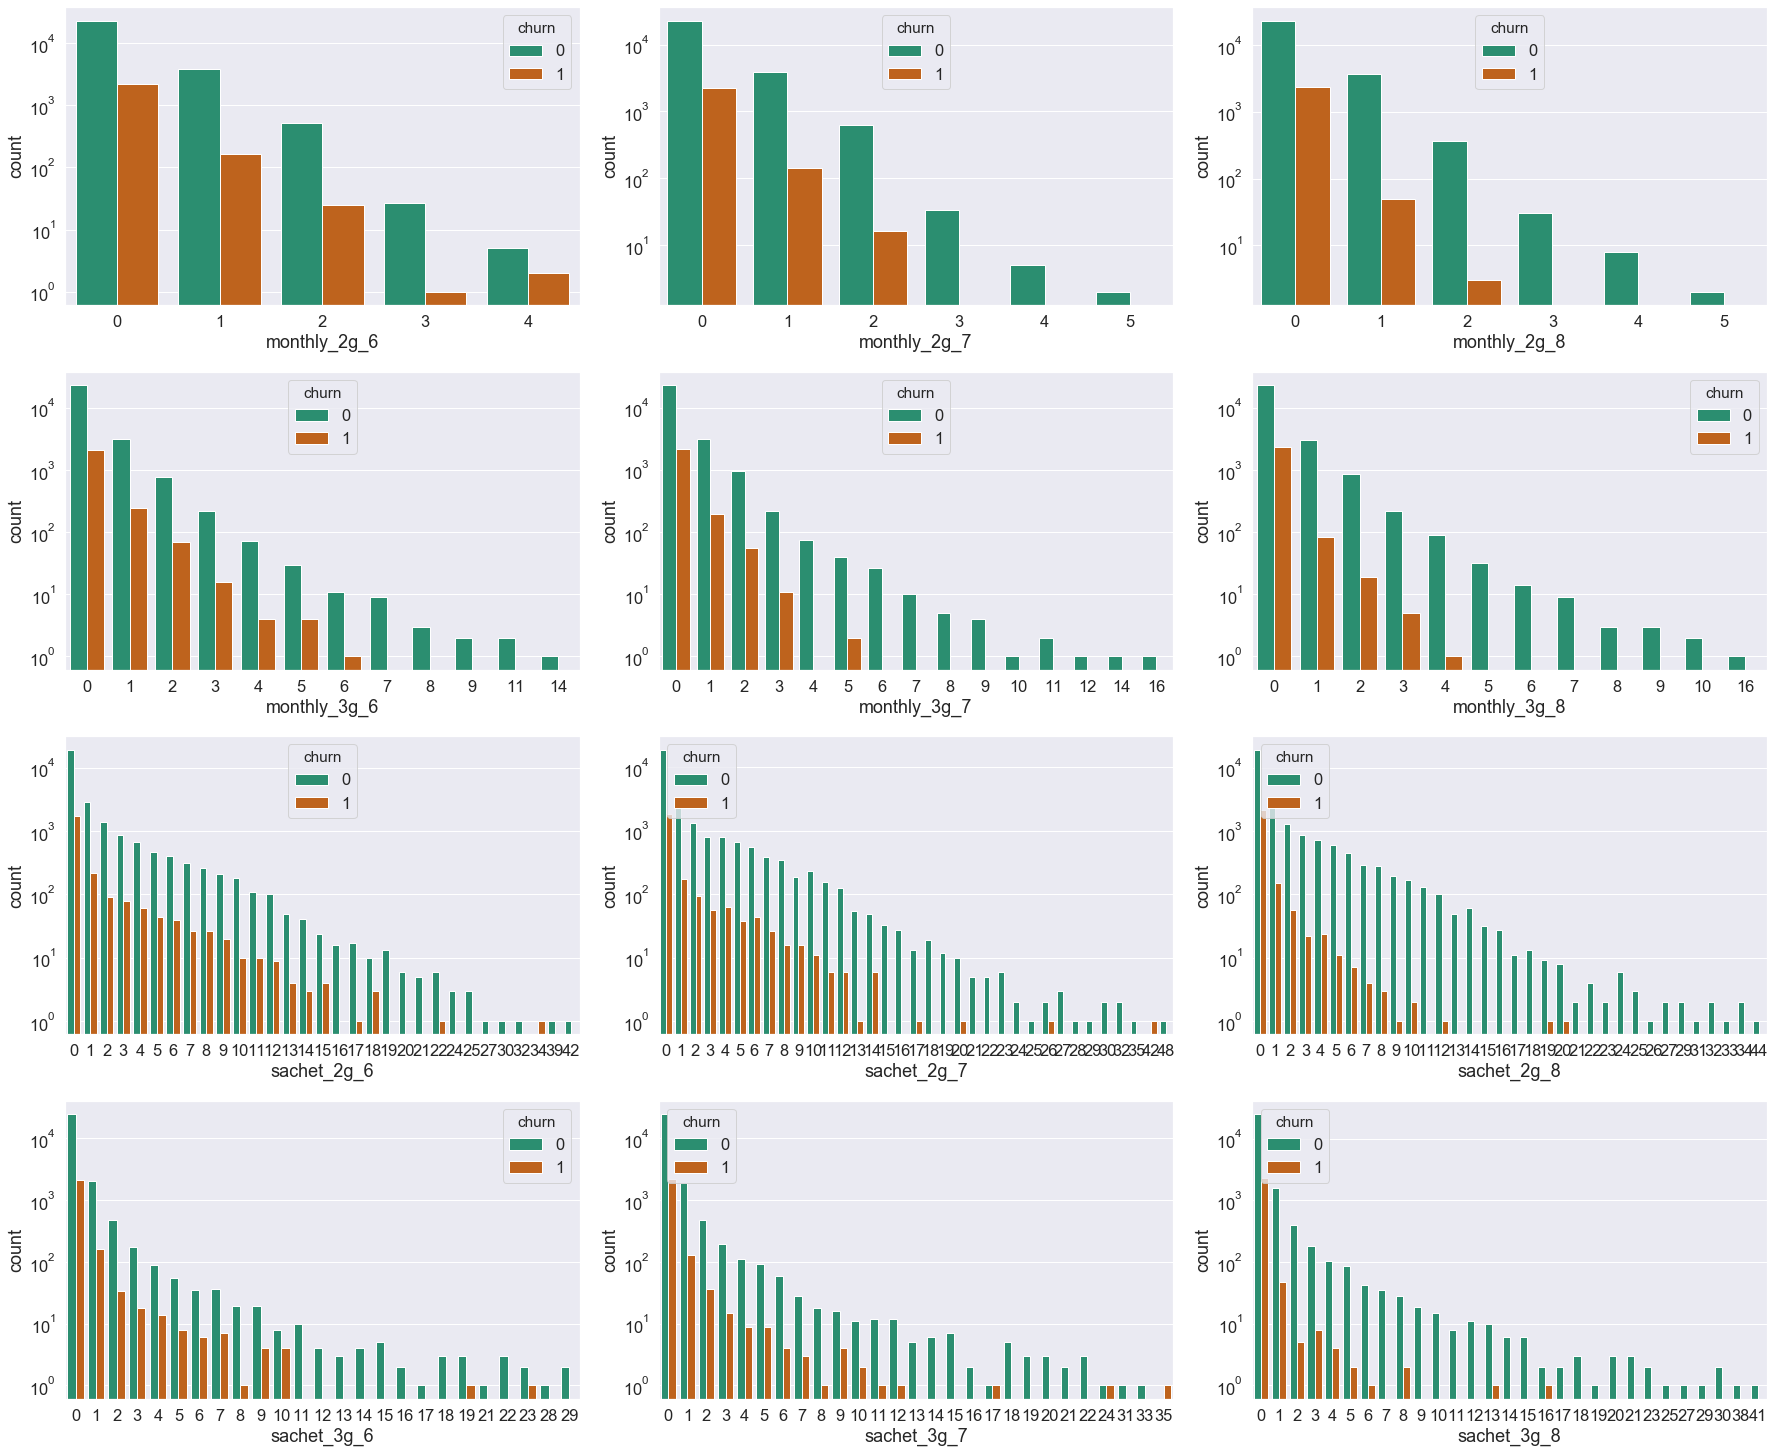

In [105]:
# Plotting visualization for categorical variable
plt.figure(figsize = (25,30))

for item in enumerate(cat_columns):
    plt.subplot(6,3,item[0]+1)
    sns.countplot(x = item[1], hue = 'churn', data = hvc_df, palette = 'Dark2')
    #plt.title(item[1])
    plt.yscale('log')
    plt.tight_layout()

#### Dropping all above categorical variables
- These above categorical variables are not distributed normally. We are seeing high variance in one category which is 0th one. Which indicates no data pack purchased. 
- So these categorical variable will not contribute much in the model, so better to drop these variables.

In [106]:
# Dropping all categorical variables from high value customer.
hvc_df.drop(cat_columns, axis = 1, inplace = True)
hvc_df.shape

(29869, 131)

## Bivariate Analysis

### Monthly Incom Vs AON

#### Churn vs Tenure

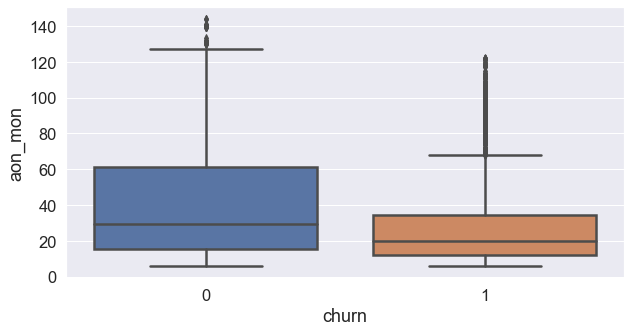

In [107]:
# Lets check the churn values based on tenure data distribution
plt.figure(figsize = (10, 5))
sns.boxplot(x = hvc_df.churn, y = hvc_df.aon_mon)
plt.show()

#### Observation:
As per above plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company. However, churn customers are not staying longer.

### MOU Vs AON variable analysis
Incoming and Outgoing calls analysis based on Minutes of usage vs Age on netowrk. Lets do individual analysis on incoming and outgoing calls

#### Create AON year bin

In [108]:
#Create Derived categorical variable
hvc_df['aon_bin'] = pd.cut(hvc_df['aon'], range(0, hvc_df['aon'].max(), 365), 
                           labels = range(0, int(round(hvc_df['aon'].max()/365))-1))
hvc_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   



In [109]:
# Plotting Avg. total monthly incoming and outgoing MOU vs AON
mon_incoming = hvc_df.filter(regex ='total_ic_mou').columns

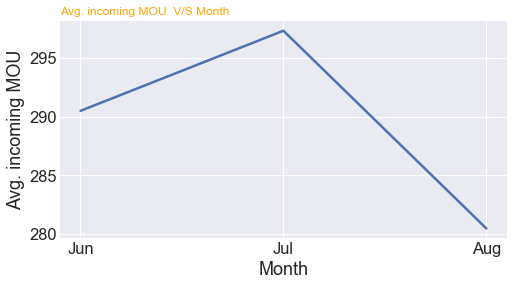

In [110]:
# Calling Monthly Average call plot to defing single line incoming plot.
plot_avg_monthly_calls('single', hvc_df, call_type = 'incoming', col_list = mon_incoming)

#### Observation:
- Above plot is built with average monthly incoming minutes of usage vs 3 months (June, July and August)
- we can clearly visualize botb June and July months are good month and minutes of incoming call usage are going down in August month which is action phase.

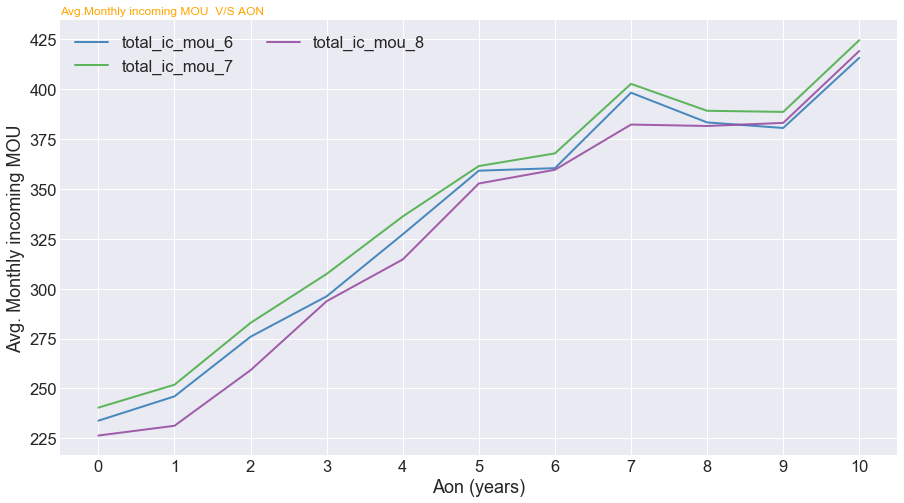

In [111]:
# Calling Monthly Average call plot to defing multiple line incoming plot for year.
plot_avg_monthly_calls('multi', hvc_df, call_type = 'incoming', col_list = mon_incoming)

#### Observation:
- Above plot draws 3 month line plot on Yearly Age on Network for average monthly incoming minutes of usage.
- This above plot shows how 3 month (june, july and august) are trending for last 10 years.
- Total incoming MOU avg. for July are more than the previous Junn for customers acorss all the AON years.
- Total incoming MOU avg. for August month are down with compre with June and July months across all the AON years.
- The total incoming minutes of usage avg inceases from june to july, it drop drastically from august and reduces lower than that for jun.

### Monthly Outgoing Vs MOU

In [112]:
# Plotting Avg. total monthly outgoing MOU vs AON
mon_outgoing = hvc_df.filter(regex ='total_og_mou').columns

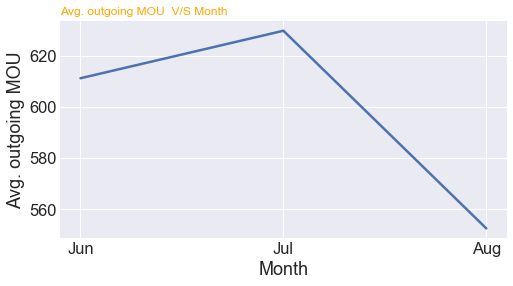

In [113]:
# Calling Monthly Average call plot to defing single line outgoing plot.
plot_avg_monthly_calls('single', hvc_df, call_type = 'outgoing', col_list = mon_outgoing)

#### Observation:
- Above visualizatoin plot is built with average monthly outgoing minutes of usage vs 3 months (June, July and August).
- We can clearly visualize both June and July months are good month and minutes of outgoing call usage are going down in August month is action phase.

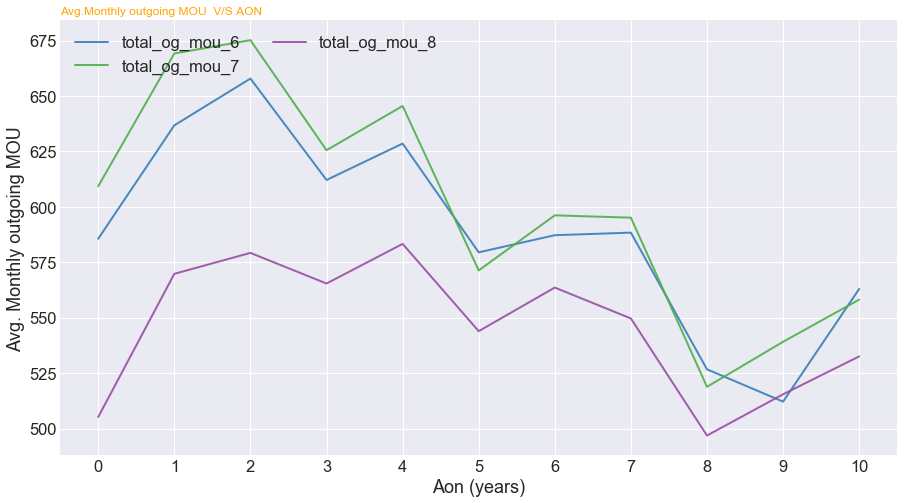

In [114]:
# Calling Monthly Average call plot to defing multiple line outgoing plot for year.
plot_avg_monthly_calls('multi', hvc_df, call_type = 'outgoing', col_list = mon_outgoing)

#### Observation:
- Above plot draws 3 month line plot on Yearly Age on Network for average monthly outgoing minutes of usage.
- This above plot shows how 3 month (june, july and august) are trending for last 10 years.
- Total outgoing MOU avg. for July are more than the previous Junn for customers acorss all the AON years.
- Total outgoing MOU avg. for August month are down with compre with June and July months across all the AON years.
- The total outgoing minutes of usage avg inceases from june to july, it drop drastically from august and reduces lower than that for jun.

### Incoming and Outgoing variable analysis
Incoming and Outgoing calls analysis based on Minutes of usage vs Age on netowrk. Lets do individual analysis on incoming and outgoing calls

In [115]:
# Average Incoming MOU per month churn vs Non-Churn
hvc_df.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn                                                
0          295.606561      307.263126      299.489967
1          232.248184      184.113429       63.899399

In [116]:
# Average Outgoing MOU per month churn vs Non-Churn
hvc_df.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

total_og_mou_6  total_og_mou_7  total_og_mou_8
churn                                                
0          594.793592      629.375289      582.595256
1          797.266472      632.998905      210.939979

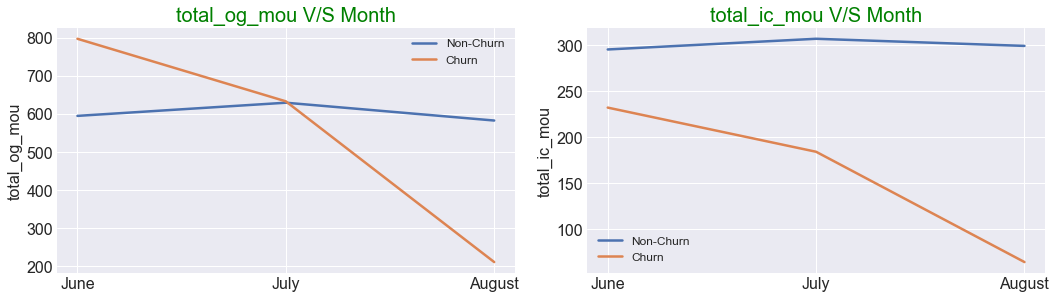

In [117]:
# visualize both incoming and outgoing minutes of usage
icog_features = ['total_og_mou',  'total_ic_mou']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, icog_features)

#### Observation:
As per above average calculation on incoming and outgoing calls, we can clearly identifies below:
- Incoming churns are gradually decreasing while month increases.
- Outgoing churns are also gradually decreasing month increases.

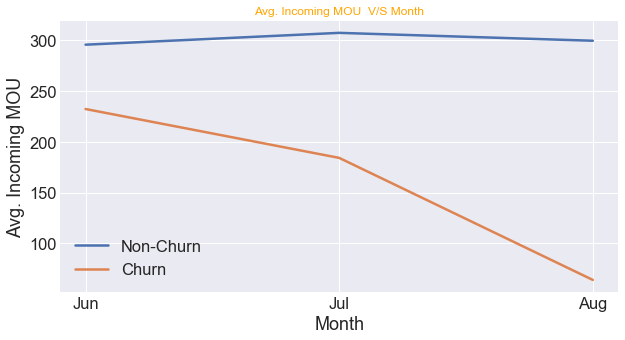

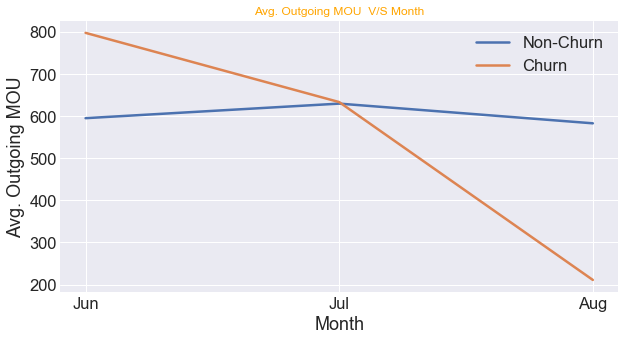

In [118]:
in_call_type = 'Incoming'
out_call_type = 'Outgoing'
plot_churn_vs_mou(hvc_df, mon_incoming, in_call_type)
plot_churn_vs_mou(hvc_df, mon_outgoing, out_call_type)

#### Observation:
- Churners Avg. Incoming/Outgoing MOU's which droped drastically on **Action Phase**.
- While the non-churners Avg. MOU's remains consistant and stable with each month.
- Therefore, users MOU is a key feature to predict churn.

### Creating new features
This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

##### Creating new ratio feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
This ratio feature will be created from total outgoing mou divided by total incoming mou.

In [119]:
# Creating new ratio feature from outgoing to incoming monthly variables
for i in month_suffixes[:-1]:
    hvc_df[mcol_name('og_to_ic_mou',i)] = (hvc_df[mcol_name('total_og_mou',i)])/(hvc_df[mcol_name('total_ic_mou',i)]+1)
hvc_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   



In [120]:
# Numeric stats for per month churn vs Non-Churn for outgoing to incoming minutes of usage
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('og_to_ic_mou')).columns)].mean()

og_to_ic_mou_6  og_to_ic_mou_7  og_to_ic_mou_8
churn                                                
0            6.237493        6.070594        5.677923
1            8.598852        7.882909        3.876654

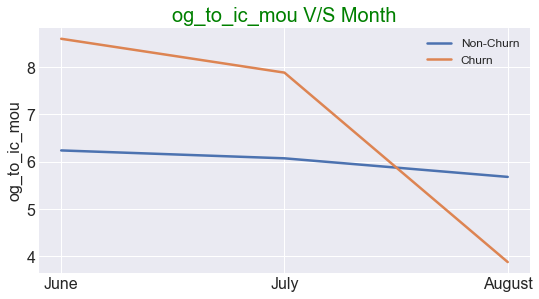

In [121]:
# visualize both incoming and outgoing minutes of usage
icog_features = ['og_to_ic_mou']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, icog_features)

#### Observation:
As per above average calculation on incoming and outgoing ratio calls, we can clearly identifies below:
- Churners have high minutes of usage with compare to non churners for good phase(June and July) and sink down in action phase.
- Churn customers minutes of usage are drastically decreased at 3rd month(60%)
- Non Churn customers minutes of usage are not decreasing drastically.

##### Creating new local  feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
This local outgoing to incoming feature will be created from local outgoing mou divided by local incoming mou.

In [122]:
# Creating new ratio feature from local outgoing to localincoming monthly variables
for i in month_suffixes[:-1]:
    hvc_df[mcol_name('loc_og_to_ic_mou',i)] = (hvc_df[mcol_name('loc_og_mou',i)])/(hvc_df[mcol_name('loc_ic_mou',i)]+1)
hvc_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   



In [123]:
# Numeric stats for per month churn vs Non-Churn for local outgoing to incoming minutes of usage
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('loc_og_to_ic_mou')).columns)].mean()

loc_og_to_ic_mou_6  loc_og_to_ic_mou_7  loc_og_to_ic_mou_8
churn                                                            
0                2.125853            2.170334            2.072285
1                1.678690            1.700276            1.071044

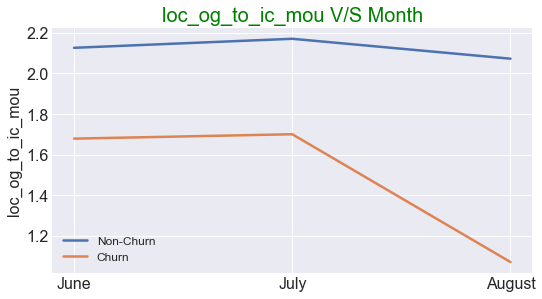

In [124]:
# visualize both incoming and outgoing minutes of usage
icog_features = ['loc_og_to_ic_mou']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, icog_features)

#### Observation:
As per above average calculation on local incoming and outgoing ratio calls, we can clearly identifies below:
- Churn customers local minutes of usage are progress well in good phase and gradually decreasing month by month.
- Non Churn customers local minutes of usage are not decreasing drastically.

In [125]:
# Numeric stats for per month churn vs Non-Churn for volume data in mb
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('vol_data_mb')).columns)].mean()

vol_data_mb_6  vol_data_mb_7  vol_data_mb_8
churn                                             
0         478.339663     512.697057     489.130323
1         395.218988     310.890290     111.709482

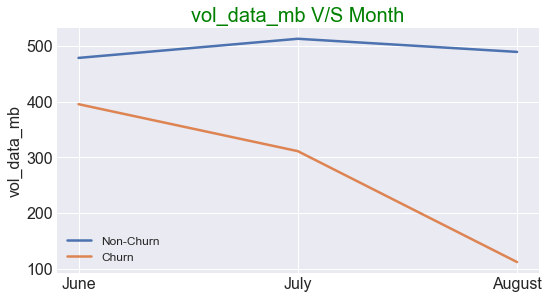

In [126]:
# visualize volume data in MB of usage
features = ['vol_data_mb']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, features)

#### Observation:
As per above volume data in mb vs monthly usage are behaves very badly. It clearly indentifies below:
- Churn customers using data volume in mb very badly. Looks like they somehow dont like the data pack.
- Non Churn customers data pack usage are going smooth and not deflection across months.

In [127]:
# Numeric stats for per month churn vs Non-Churn for total month recharge
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('total_month_rech')).columns)].mean()

total_month_rech_6  total_month_rech_7  total_month_rech_8
churn                                                            
0             1112.073354         1211.133959         1112.626617
1             1195.682703          971.983031          339.855539

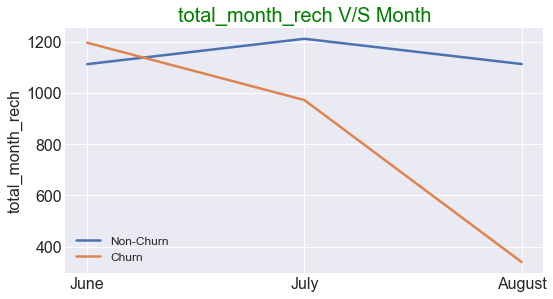

In [128]:
# visualize volume data in MB of usage
features = ['total_month_rech']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, features)

#### Observation:
As per above average calculation on total monthly recharge, we can clearly identifies below:
- Churner are good in initial month recharge and their behavious went down and shows complete different in action pahse.
- Churn customers total monthly recharge are decreased drastically towards 3rd month (70%)
- Non Churn customers total monthly recharge has no change.

In [129]:
# Numeric stats for per month churn vs Non-Churn for maximum recharge amount
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('max_rech_amt')).columns)].mean()

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
churn                                                
0          169.095094      173.438358       166.92654
1          170.454809      159.662935        86.13267

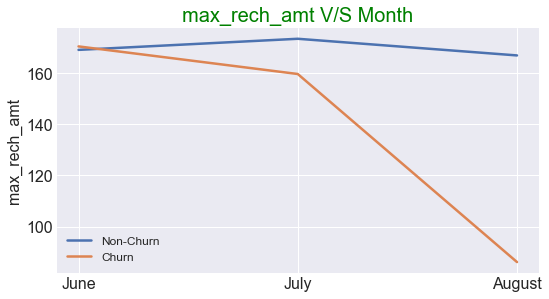

In [130]:
# visualize volume data in MB of usage
features = ['max_rech_amt']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, features)

#### Observation:
As per above average calculation on maximum recharge amount, we can clearly identifies below:
- Churn customers maximum recharge are are decreased drastically towards 3rd month (50%). we can see little variable in good phase but high variance in action phase.
- Non Churn customers has no change.

In [131]:
# Numeric stats for per month churn vs Non-Churn for average revenue per user
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('arpu')).columns)].mean()

arpu_6      arpu_7      arpu_8
churn                                    
0      550.128936  563.463313  533.333951
1      661.388644  544.005854  238.980483

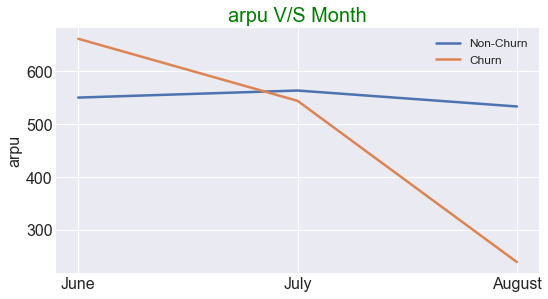

In [132]:
# visualize volume data in MB of usage
features = ['arpu']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, features)

#### Observation:
As per above average calculation on Average Revenue per User, we can clearly identifies below:
- Churn customer has high average revenue per user in good phase. However, they did not like network to invest revenue for new usage.
- Churn customers average revenue per user are are decreased drastically towards 3rd month (70%)
- Non Churn customers has no change.

##### Creating new total local  feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
This total local minutes of usage should be created from local outgoing minutes of usage plus local incoming minutes of usage.

In [133]:
# Creating new total local minutes of usage feature from local outgoing mou and local incoming mou
for i in month_suffixes[:-1]:
    hvc_df[mcol_name('Total_loc_mou',i)] = (hvc_df[mcol_name('loc_og_mou',i)])+(hvc_df[mcol_name('loc_ic_mou',i)])
hvc_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   



In [134]:
# Numeric stats for per month churn vs Non-Churn for total local minutes of usage
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('Total_loc_mou')).columns)].mean()

Total_loc_mou_6  Total_loc_mou_7  Total_loc_mou_8
churn                                                   
0           498.865050       510.121201       492.042029
1           342.278553       266.252152        94.813561

#### Observation:
As per above average calculation on total local minutes of usage, we can clearly identifies below:
- Churn customers on total local minutes of usage are are decreased drastically towards 3rd month (65%)
- Non Churn customers has no change.

##### Creating new total local  feature: Total_roam_mou_6, Total_roam_mou_7, Total_roam_mou_8
This total roam minutes of usage should be created from roam outgoing minutes of usage plus roam incoming minutes of usage.

In [135]:
# Creating new total roam minutes of usage feature using roam incoming mou and roam outgoing mou.
for i in month_suffixes[:-1]:
    hvc_df[mcol_name('Total_roam_mou',i)] = (hvc_df[mcol_name('roam_ic_mou',i)])+(hvc_df[mcol_name('roam_og_mou',i)])
hvc_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   



In [136]:
# Numeric stats for per month churn vs Non-Churn for total roaming minutes of usage
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('Total_roam_mou')).columns)].mean()

Total_roam_mou_6  Total_roam_mou_7  Total_roam_mou_8
churn                                                      
0             39.398002          28.67431         29.047617
1             81.706903          80.85260         71.602280

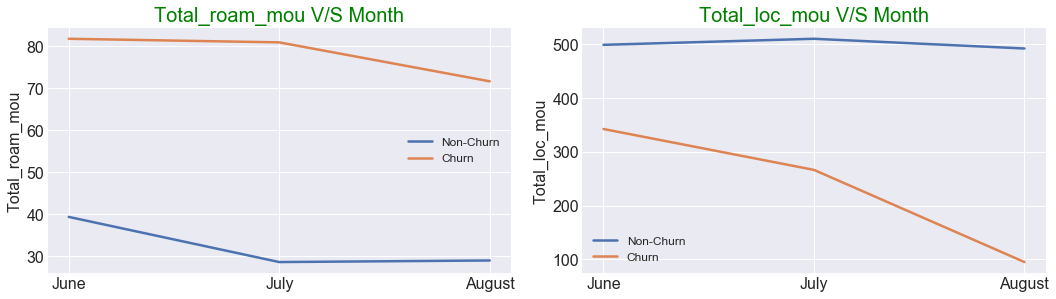

In [137]:
# visualize volume data in MB of usage
mou_features = ['Total_roam_mou','Total_loc_mou']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, mou_features)

#### Observation:
As per above average calculation on total roaming minutes of usage, we can clearly identifies below:
- Churn customers on total roam minutes of usage are are decreased 10% in 3rd month. No much reduce though. Non churn also same.
- Both roaming and local minutes of usage for churner are behaving bad. For roaming miutes of usage is high with compare to non churner. But somehow they dont like network so it went down in action phase.

In [138]:
# Numeric stats for per month churn vs Non-Churn for last day recharge amount
hvc_df.groupby('churn')[list(hvc_df.filter(regex=('last_day_rch_amt')).columns)].mean()

last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
churn                                                            
0              100.590086          102.312780           97.516881
1              103.550995           78.684494           36.032753

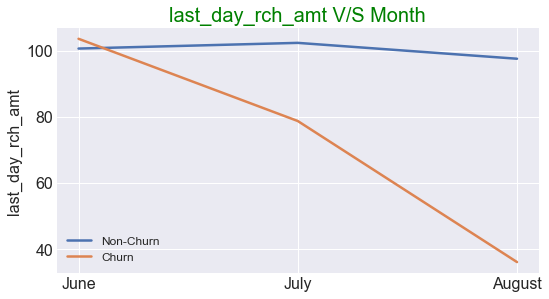

In [139]:
# visualize volume data in MB of usage
last_features = ['last_day_rch_amt']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, last_features)

#### Observation:
As per above average calculation on last day recharge amount, we can clearly identifies below:
- Churn customers on last day recharge amount are are decreased drastically towards 3rd month (70%)
- Non Churn customers has no change.

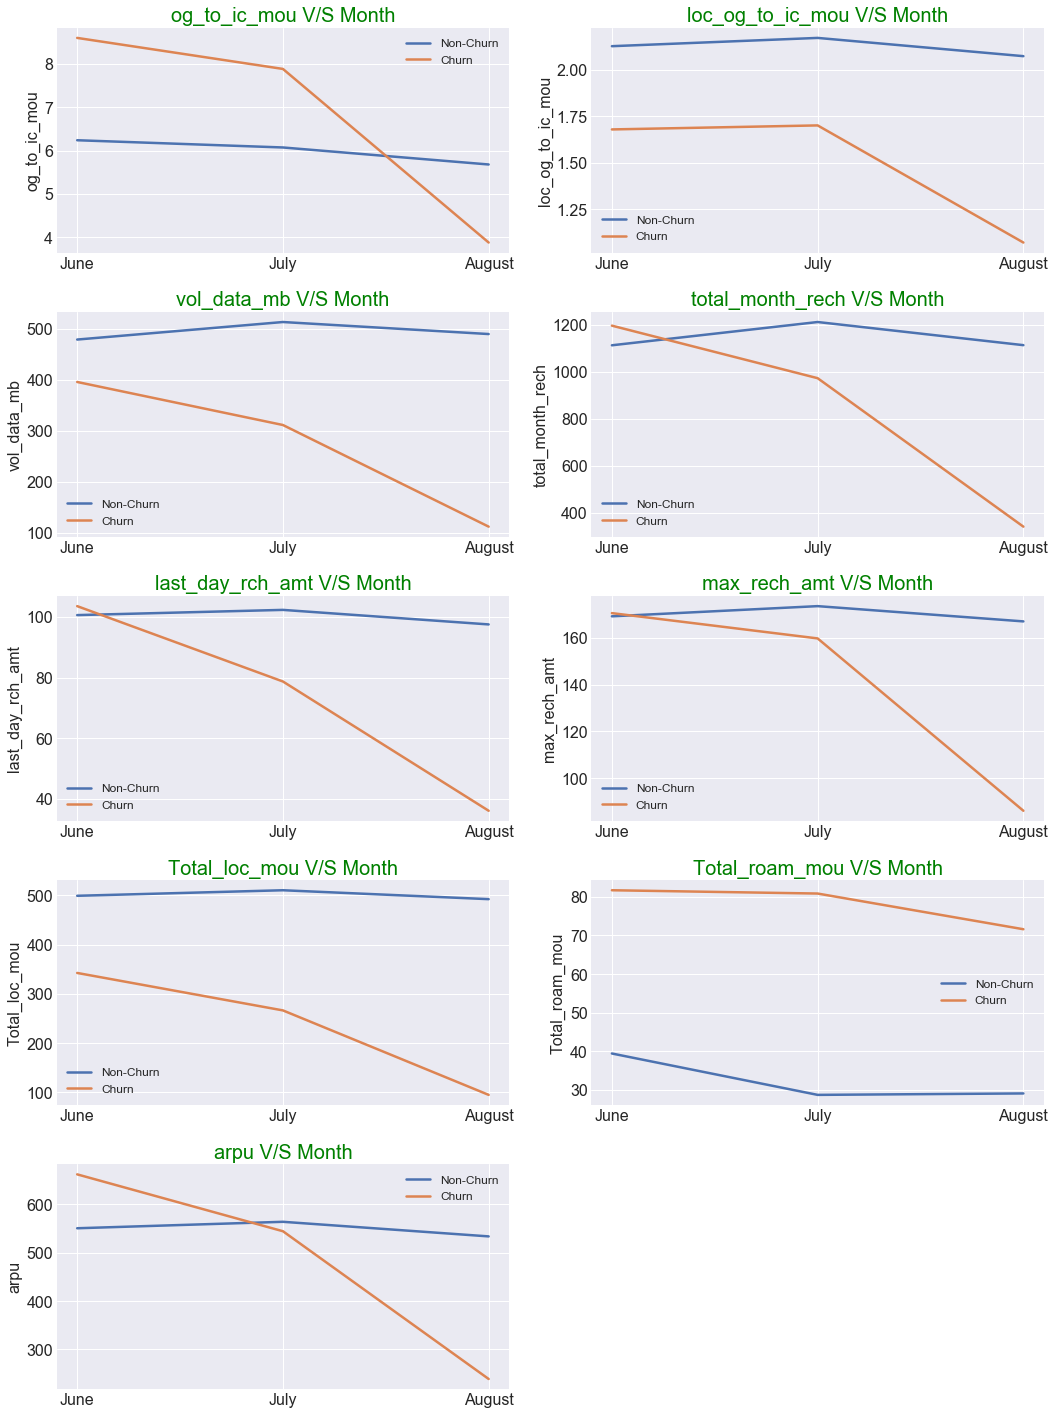

In [140]:
# Listing above analysed features to visualize how churn and non-churn is effecting month to month
mon_features = ['og_to_ic_mou', 'loc_og_to_ic_mou', 'vol_data_mb', 'total_month_rech', 'last_day_rch_amt',
               'max_rech_amt', 'Total_loc_mou', 'Total_roam_mou',  'arpu'] #, 'ARPU_Total']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, mon_features)

#### Observation:
-  All above plots are showing churn values are decreasing its usage towards August month. As we consideres Total Local Minutes of Usage, Total roam mou, Total incoming and outgoing  etc.
- All group churn values are drastically getting down after good phase (June and July). Action phase (August) clearly predictor of churn reason.
- Few non churn groups are getting lower and lower value and can be a future churner.

### Correlation Matrix
We have varous features which can use used and analysed in correlation matrix. Its not quite possible to visualize all features in one correlation matrix. So we are considering below few specific categories to plot correlation matrix.
- All related to local incoming variables
- All related to Total variables

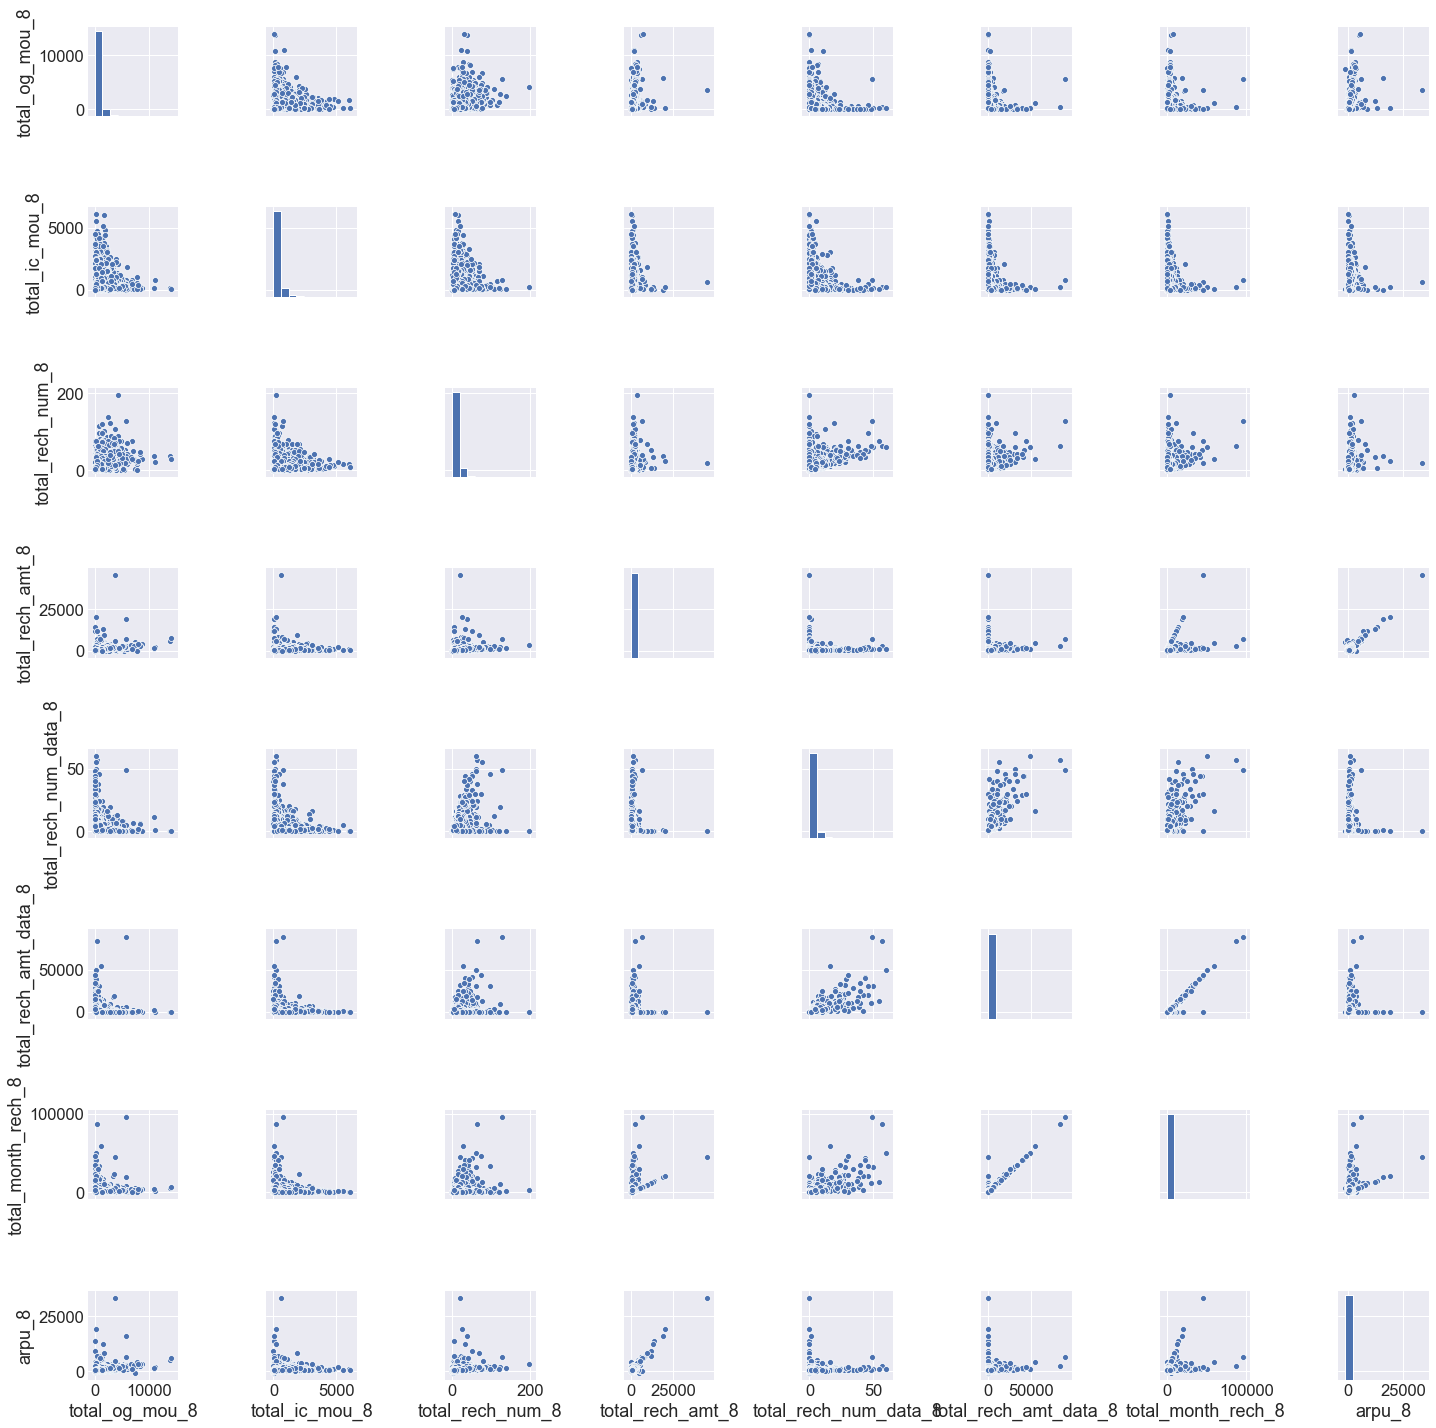

In [141]:
total_col = list(hvc_df.filter(regex=('total')).columns)
arpu_col = list(hvc_df.filter(regex=('arpu')).columns)
cor_features = hvc_df[total_col + arpu_col]
cor_col = list(cor_features.filter(regex=('_8')).columns)
cor_features = cor_features[cor_col]
sns.pairplot(cor_features)
plt.show()

#### Observation:
- Total recharge amount and average revenue per user are highly correled. That is the reason the data distribution looks one straight line.
- Total reacharge amount data Vs total moth recharge and total month recharge are highly correlated.

## Model Building
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

### Defining generic funciton for reusability

### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

#### Drawing ROC Curve
- Defining function to draw ROC curve based on False Positive Rate [1 - True Negative Rate] and True Positive Rate.
- True Positive Rate (Sensitivity) and False Positve Rate (1 - Specificity)

In [142]:
def draw_ROC(actual, probs):
    '''Draws ROC curve based on False Positive Rate [1 - True Negative Rate] '''
    # Finding False Positive Rate and True Positive Rate along with Threshold values from probabolity matrixs
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    
    # Getting Area Under Curve score from metrics.roc_auc_score
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Ploting True Positive and False Positive
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Defining x label and y label
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    
    # Defining lagend
    plt.legend(loc = "lower right")
    plt.show() 

    return fpr, tpr, thresholds

#### Model Metrics
This function definition is intend to provide metrics values for model. we need to use confusion metrix form metrics to get these scores.

In [143]:
def model_metrics(actual_churn = False, pred_churn = False):
    '''Getting model metrics based on actual and predicted churn values.'''
    # finding confusion matrix using actual and predicted churn values form the selected model.
    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Getting ROC_AUC_CURVE score for the logistic regression model
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Getting the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Getting the specificity of our logistic regression model
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # Getting positive predictive value for the logistic regression model
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Getting Negative predictive valuefor the logistic regression model
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # Getting precision score value for the logistic regression model
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

#### Predicting Probability and Churn
Below function is defined to predict the churn using the input probability cut-off. This function has argumensts - model instance, x and y to predict using model and cut-off probability to predict complete model metrics defined above along with final predicted data frame.

In [144]:
# Predicting churn and probability
def predict_churn_with_prob(model, X, y, prob):  
    '''Predicts the churn using the input probability cut-off. 
        Arguments: model instance, x and y to predict using model and 
            cut-off probability to predict complete model metrics defined above along with final predicted data frame.'''
    # predict probability from model data.
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    
    # Getting complete model metrics data
    model_metrics(y_df.churn,y_df.final_predicted)
    
    return y_df

#### Finding Optimal Cutoff Point
The optimal cutoff points are determined by two criteria. 
- Criterion 1: significance. The optimal cutoff points are defined as the ones with the most significant (likelihood ratio test) split, similar to the survival data. 
- Criterion 2: maximum area under curve (AUC).

In [145]:
# Optimal cutoff probability is that prob where we get balanced accuracy, sensitivity and specificity. 
def find_optimal_cutoff(df):
    '''Optimal cutoff probability is that prob where we get balanced accuracy, sensitivity and specificity. '''
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/20 for x in range(21)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
    
    # Defining different level of probabilities to find actual best cuffoff point for all 3 metrices.
    num = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
    
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
    plt.show()

#### Model Score
Model should be fit with train set of data. This function allows X_train and y_train data along with model defined to get scores such as Accuracy, Sensitivity and AUC score. Also perform 5 fold Cross Validation to get accurate values.

In [146]:
def model_fit(model, X_train, y_train, perform_CV = True, cv_folds = 5):
    '''Fit the model and get accuracy, sensitivity and AUC scores.'''
    #Fit the algorithm on the data
    model.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = model.predict(X_train)
    dtrain_predprob = model.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if perform_CV:
        cv_score = cross_val_score(model, X_train, y_train, cv = cv_folds, scoring = 'r2')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if perform_CV:
        print ("CV Score : \n    Avg. - %.7g \n    Std. - %.7g \n    Min. - %.7g \n    Max. - %.7g" % (np.mean(cv_score),
                                                                                                       np.std(cv_score),
                                                                                                       np.min(cv_score),
                                                                                                       np.max(cv_score)))

#### Cross Validation Plot
This generic function defined to plot cross validated score for model with different paramters.

In [147]:
def plot_CV_result(scores, param, score_type):
    '''Plot Cross Validation plot for different paramter and score type'''
    plt.figure(figsize=(15,10))
    
    for i in enumerate(param):
        plt.subplot(2, 2, i[0] + 1)
        plt.plot(scores["param_" + i[1]], scores["mean_train_score"])
        plt.plot(scores["param_" + i[1]], scores["mean_test_score"])
        plt.xlabel(i[1])
        plt.ylabel(score_type)
        plt.title("Optimal Number of Features")
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper left')
        plt.tight_layout()

### Splitting data set to train and test
As you know, the first basic step for regression is performing a train-test split.
- Creating copy of final hvc_df dataset then remove indentity and categorical variables.
- Dropping datatime variable which is not required for model building.
- Splitting complete dataset into train and test set with ration 7:3
- Scalling both train and test data set using StandardScaller

In [148]:
# creating copy of the final hvc_df dataframe
hvc_PCA = hvc_df.copy()

# removing the columns not required for modeling
hvc_PCA.drop(['aon_bin', 'aon_mon', 'tenure_range', 'tenure_year'], axis = 1, inplace = True)
hvc_PCA.shape

(29869, 140)

#### Splitting dataset into train and test

In [149]:
#putting features variables in X
X = hvc_PCA.drop(['churn'], axis = 1)

#putting response variables in Y
y = hvc_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 90)
print(X_train.shape)
print(X_test.shape)

(23895, 139)
(5974, 139)


#### Feature Scaling

In [150]:
# Checking train data set rows and variables.
X_train.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
28606  896.182  793.382  905.362       147.91       222.84       239.36   
13960  608.859  296.478  627.926       129.28        45.18        93.76   
23986  509.961  421.102  387.756        69.14       147.76       204.23   
4967   389.436  392.317  565.230        42.34        28.51        83.38   
5985   595.957  366.987  745.581       129.69        41.48       108.84   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
28606       1127.29        936.73        837.11            0.0            0.0   
13960        421.84        142.24        191.58            0.0            0.0   
23986        357.76        308.29        278.46            0.0            0.0   
4967         437.79        464.88        569.34            0.0            0.0   
5985         363.83        259.88        586.43            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
28606            0.0            0.0            0.0            0.0   
13960            0.0            0.0            0.0            0.0   
23986            0.0            0.0            0.0            0.0   
4967             0.0            0.0            0.0            0.0   
5985             0.0            0.0            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
28606            142.81            149.11            219.53            666.29   
13960            117.39             45.18             83.94            293.61   
23986              6.41             19.79              6.58             53.76   
4967              42.34             28.51             83.08            404.28   
5985             129.69             41.48            108.84            361.36   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
28606            712.19            720.83             21.93             25.08   
13960            124.14            136.66             28.91              0.61   
23986             37.56             79.33              0.00              0.00   
4967             434.21            524.34             32.26             28.31   
5985             258.86            582.49              2.24              1.01   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
28606             14.01             17.84              1.61              0.00   
13960              0.78              0.00              0.00              0.00   
23986              0.00              0.00              0.00              0.00   
4967              44.08              0.00              0.00              0.91   
5985               1.90              0.00              0.00              0.36   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
28606        831.04        886.39        954.38              5.09   
13960        439.93        169.94        221.39             11.88   
23986         60.18         57.36         85.91             62.73   
4967         478.89        491.04        651.51              0.00   
5985         493.31        301.36        693.24              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
28606             72.86             19.83            413.09            188.93   
13960              0.00              9.81             53.34              0.00   
23986            127.96            197.64            294.53            260.31   
4967               0.00              0.30              1.24              2.35   
5985               0.00              0.00              0.21              0.00   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
28606            102.26               0.0              6.99               0.0   
13960              0.00               0.0              0.00               0.0   
23986            190.61               0.0        

In [151]:
# applying MinMaxScaller to normalize data
scaler = MinMaxScaler()

# Defining all features excluding target variable - churn
all_features = hvc_PCA.loc[:, hvc_PCA.columns != 'churn']

# train data will be standardize with fit_transform()
X_train[all_features.columns] = scaler.fit_transform(X_train[all_features.columns])

# test data will be standardize with only transform()
X_test[all_features.columns] = scaler.transform(X_test[all_features.columns])

# Validating train data set after scalling.
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
28606  0.177776  0.149060  0.108980     0.020051     0.027316     0.023990   
13960  0.161586  0.122677  0.092647     0.017525     0.005538     0.009397   
23986  0.156013  0.129294  0.078508     0.009373     0.018113     0.020469   
4967   0.149222  0.127766  0.088956     0.005740     0.003495     0.008357   
5985   0.160859  0.126421  0.099574     0.017581     0.005085     0.010909   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
28606      0.161910      0.096898      0.059762            0.0            0.0   
13960      0.060588      0.014714      0.013677            0.0            0.0   
23986      0.051384      0.031891      0.019880            0.0            0.0   
4967       0.062879      0.048089      0.040646            0.0            0.0   
5985       0.052256      0.026883      0.041866            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
28606            0.0            0.0            0.0            0.0   
13960            0.0            0.0            0.0            0.0   
23986            0.0            0.0            0.0            0.0   
4967             0.0            0.0            0.0            0.0   
5985             0.0            0.0            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
28606          0.023437          0.020148          0.022492          0.140872   
13960          0.019265          0.006105          0.008600          0.062077   
23986          0.001052          0.002674          0.000674          0.011366   
4967           0.006949          0.003852          0.008512          0.085476   
5985           0.021284          0.005605          0.011151          0.076402   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
28606          0.156280          0.145290          0.014959          0.020962   
13960          0.027241          0.027545          0.019720          0.000510   
23986          0.008242          0.015990          0.000000          0.000000   
4967           0.095281          0.105685          0.022005          0.023662   
5985           0.056803          0.117406          0.001528          0.000844   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
28606          0.023815          0.065724          0.002826          0.000000   
13960          0.001326          0.000000          0.000000          0.000000   
23986          0.000000          0.000000          0.000000          0.000000   
4967           0.074929          0.000000          0.000000          0.002586   
5985           0.003230          0.000000          0.000000          0.001023   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
28606      0.135056      0.115494      0.093596          0.000691   
13960      0.071495      0.022143      0.021712          0.001613   
23986      0.009780      0.007474      0.008425          0.008515   
4967       0.077827      0.063981      0.063893          0.000000   
5985       0.080170      0.039266      0.067986          0.000000   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
28606          0.008958          0.002474          0.064243          0.020348   
13960          0.000000          0.001224          0.008295          0.000000   
23986          0.015732          0.024661          0.045805          0.028036   
4967           0.000000          0.000037          0.000193          0.000253   
5985           0.000000          0.000000          0.000033          0.000000   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
28606          0.007330               0.0          0.012834               0.0   
13960          0.000000               0.0          0.000000               0.0   
23986          0.013664         

### Handling class imbalance.
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

#### Informed Over Sampling: Synthetic Minority Over-sampling Technique

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

##### Advantages
- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information

In [152]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train == 1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1923
Before OverSampling, counts of label '0': 21972 

Before OverSampling, churn event rate : 8.05% 



In [153]:
sm = SMOTE(random_state = 90, ratio = 1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [154]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_sm == 1)/len(y_train_sm != 1)*100,2)))

After OverSampling, the shape of train_X: (43944, 139)
After OverSampling, the shape of train_y: (43944,) 

After OverSampling, counts of label '1': 21972
After OverSampling, counts of label '0': 21972
After OverSampling, churn event rate : 50.0% 



## Interpretability Model
- This model will be created with out using PCA (Principal Component Analysis).
- Logistic Regression model will be used to build interpretability model and will use RFE and VIF to handle Multicollinearity.

#### Running Your First Training Model

In [155]:
import statsmodels.api as sm

# Logistic regression model
int_log_reg = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
int_log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23895
Model:                            GLM   Df Residuals:                    23767
Model Family:                Binomial   Df Model:                          127
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4124.3
Date:                Sat, 28 Nov 2020   Deviance:                       8248.6
Time:                        23:34:16   Pearson chi2:                 1.35e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.4893      0.806     -3.089      0.002      -4.069      -0.910
arpu_6                    8.5851      3.928      2.185      0.029       0.885      16.285
arpu_7                    8.3202      4.994      1.666      0.096      -1.468      18.109
arpu_8                   -2.8526      5.614     -0.508      0.611     -13.857       8.151
onnet_mou_6               7.2134     25.857      0.279      0.780     -43.465      57.892
onnet_mou_7               5.6140     29.666      0.189      0.850     -52.531      63.759
onnet_mou_8             -61.0099     49.042     -1.244      0.213    -157.131      35.111
offnet_mou_6              7.3115     23.894      0.306      0.760     -39.519      54.142
offnet_mou_7             19.4737     33.818      0.576      0.565     -46.808      85.755
offnet_mou_8           -103.5173     67.929     -1.524      0.128    -236.655      29.621
roam_ic_mou_6             2.8679      3.384      0.847      0.397      -3.765       9.501
roam_ic_mou_7             1.3220      2.806      0.471      0.638      -4.177       6.821
roam_ic_mou_8           -13.5556      8.011     -1.692      0.091     -29.257       2.145
roam_og_mou_6            -2.5452      8.458     -0.301      0.763     -19.123      14.032
roam_og_mou_7            -2.6276      8.189     -0.321      0.748     -18.678      13.423
roam_og_mou_8            25.0859     16.176      1.551      0.121      -6.618      56.789
loc_og_t2t_mou_6       8119.6665   3.36e+04      0.241      0.809   -5.78e+04    7.41e+04
loc_og_t2t_mou_7       1675.3387   4.12e+04      0.041      0.968    -7.9e+04    8.24e+04
loc_og_t2t_mou_8       2.632e+05   6.31e+04      4.169      0.000    1.39e+05    3.87e+05
loc_og_t2m_mou_6       6299.7302   2.61e+04      0.241      0.809   -4.49e+04    5.75e+04
loc_og_t2m_mou_7       1025.4626   2.53e+04      0.040      0.968   -4.87e+04    5.07e+04
loc_og_t2m_mou_8       1.338e+05   3.21e+04      4.169      0.000    7.09e+04    1.97e+05
loc_og_t2f_mou_6       1958.4050   8095.876      0.242      0.809   -1.39e+04    1.78e+04
loc_og_t2f_mou_7        258.6538   6655.459      0.039      0.969   -1.28e+04    1.33e+04
loc_og_t2f_mou_8       1.587e+04   3805.140      4.171      0.000    8411.881    2.33e+04
loc_og_t2c_mou_6         -4.6492      1.667     -2.789      0.005      -7.916      -1.382
loc_og_t2c_mou_7          3.9528      2.623      1.507      0.132      -1.189       9.095
loc_og_t2c_mou_8         -1.2754      2.162     -0.590      0.555      -5.514       2.963
loc_og_mou_6          -2.178e+04   3.38e+04     -0.645      0.519    -8.8e+04    4.44e+04
loc_og_mou_7          -2913.7878   3.93e+04     -0.074      0.941   -7.98e+04     7.4e+04
loc_og_mou_8          -1.634e+04   5.08e+04     -0.322      0.748   -1.16e+05    8.32e+04
std_og_t2t_mou_6       

### Feature Selection Using RFE

In [156]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight = 'balanced')

In [157]:
from sklearn.feature_selection import RFE
# running RFE with 20 variables as output
rfe = RFE(log_reg, 20)             
rfe = rfe.fit(X_train, y_train)

In [158]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 3),
 ('arpu_7', False, 17),
 ('arpu_8', False, 16),
 ('onnet_mou_6', False, 103),
 ('onnet_mou_7', False, 41),
 ('onnet_mou_8', False, 28),
 ('offnet_mou_6', False, 115),
 ('offnet_mou_7', False, 40),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 20),
 ('roam_ic_mou_7', False, 58),
 ('roam_ic_mou_8', False, 111),
 ('roam_og_mou_6', False, 120),
 ('roam_og_mou_7', False, 27),
 ('roam_og_mou_8', False, 10),
 ('loc_og_t2t_mou_6', False, 79),
 ('loc_og_t2t_mou_7', False, 62),
 ('loc_og_t2t_mou_8', False, 54),
 ('loc_og_t2m_mou_6', False, 29),
 ('loc_og_t2m_mou_7', False, 118),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 101),
 ('loc_og_t2f_mou_7', False, 52),
 ('loc_og_t2f_mou_8', False, 102),
 ('loc_og_t2c_mou_6', False, 65),
 ('loc_og_t2c_mou_7', False, 22),
 ('loc_og_t2c_mou_8', False, 94),
 ('loc_og_mou_6', False, 88),
 ('loc_og_mou_7', False, 84),
 ('loc_og_mou_8', False, 4),
 ('std_og_t2t_mou_6', False, 80),
 ('std_og_t2t_mou_7', False, 1

In [159]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'og_to_ic_mou_6', 'og_to_ic_mou_7', 'og_to_ic_mou_8',
       'loc_og_to_ic_mou_6', 'loc_og_to_ic_mou_7', 'loc_og_to_ic_mou_8',
       'Total_loc_mou_6', 'Total_loc_mou_7', 'Total_roam_mou_6',
       'Total_roam_mou_8'],
      dtype='object', length=119)

#### Assessing the model with StatsModels

In [160]:
X_train_reg = sm.add_constant(X_train[col])
int_log_reg = sm.GLM(y_train,X_train_reg, family = sm.families.Binomial())
res = int_log_reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23895
Model:                            GLM   Df Residuals:                    23874
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4451.3
Date:                Sat, 28 Nov 2020   Deviance:                       8902.7
Time:                        23:35:48   Pearson chi2:                 1.72e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8735      0.062    -14.160      0.000      -0.994      -0.753
loc_og_t2m_mou_8         -7.2636      3.056     -2.377      0.017     -13.252      -1.275
total_og_mou_7            4.2502      0.605      7.028      0.000       3.065       5.436
total_og_mou_8          -11.7149      1.428     -8.206      0.000     -14.513      -8.917
loc_ic_t2m_mou_7          9.0701      1.177      7.707      0.000       6.763      11.377
loc_ic_t2m_mou_8         -7.2774      6.671     -1.091      0.275     -20.353       5.798
loc_ic_mou_8            -26.0804      6.821     -3.824      0.000     -39.449     -12.711
total_ic_mou_8           -9.9872      2.697     -3.703      0.000     -15.273      -4.701
spl_ic_mou_8             -8.6773      1.193     -7.272      0.000     -11.016      -6.339
total_rech_num_6          4.1483      0.955      4.344      0.000       2.277       6.020
total_rech_num_8         -9.1820      0.913    -10.057      0.000     -10.971      -7.393
total_rech_amt_6          8.4075      1.032      8.148      0.000       6.385      10.430
last_day_rch_amt_8      -13.8719      2.243     -6.184      0.000     -18.269      -9.475
vol_2g_mb_8              -9.2255      2.056     -4.487      0.000     -13.256      -5.195
vbc_3g_8                -11.8585      2.465     -4.811      0.000     -16.690      -7.027
total_rech_num_data_8   -12.0973      1.585     -7.634      0.000     -15.203      -8.992
total_month_rech_7        7.2022      1.268      5.679      0.000       4.717       9.688
vol_data_mb_8           -11.8963      2.735     -4.350      0.000     -17.256      -6.537
avg_rech_amt_8           -8.4618      3.054     -2.771      0.006     -14.447      -2.477
Total_loc_mou_8          -2.9473      3.805     -0.775      0.439     -10.405       4.510
Total_roam_mou_7          4.8558      0.611      7.948      0.000       3.658       6.053
=========================================================================================
"""

#### Checking VIF

In [161]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_reg[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_reg[col].values, i) for i in range(X_train_reg[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5            loc_ic_mou_8  18.46
18        Total_loc_mou_8  14.00
4        loc_ic_t2m_mou_8   8.61
6          total_ic_mou_8   8.12
2          total_og_mou_8   5.82
1          total_og_mou_7   5.15
9        total_rech_num_8   4.92
0        loc_og_t2m_mou_8   4.64
3        loc_ic_t2m_mou_7   4.57
8        total_rech_num_6   4.51
17         avg_rech_amt_8   4.42
10       total_rech_amt_6   4.19
11     last_day_rch_amt_8   3.72
16          vol_data_mb_8   2.54
15     total_month_rech_7   2.21
14  total_rech_num_data_8   2.13
13               vbc_3g_8   1.87
12            vol_2g_mb_8   1.32
19       Total_roam_mou_7   1.10
7            spl_ic_mou_8   1.08

In [162]:
col = col.drop('Total_loc_mou_8', 1)
X_train_reg = sm.add_constant(X_train[col])
int_log_reg = sm.GLM(y_train,X_train_reg, family = sm.families.Binomial())
res = int_log_reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23895
Model:                            GLM   Df Residuals:                    23875
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4451.7
Date:                Sat, 28 Nov 2020   Deviance:                       8903.4
Time:                        23:35:52   Pearson chi2:                 1.87e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8740      0.062    -14.162      0.000      -0.995      -0.753
loc_og_t2m_mou_8         -8.9042      2.199     -4.049      0.000     -13.215      -4.594
total_og_mou_7            4.2463      0.605      7.021      0.000       3.061       5.432
total_og_mou_8          -11.9121      1.410     -8.446      0.000     -14.677      -9.148
loc_ic_t2m_mou_7          9.0737      1.177      7.709      0.000       6.767      11.381
loc_ic_t2m_mou_8         -6.2132      6.546     -0.949      0.343     -19.043       6.617
loc_ic_mou_8            -28.8149      5.877     -4.903      0.000     -40.333     -17.296
total_ic_mou_8           -9.9037      2.690     -3.682      0.000     -15.176      -4.631
spl_ic_mou_8             -8.6705      1.193     -7.266      0.000     -11.009      -6.332
total_rech_num_6          4.1550      0.955      4.350      0.000       2.283       6.027
total_rech_num_8         -9.1475      0.911    -10.041      0.000     -10.933      -7.362
total_rech_amt_6          8.4178      1.034      8.139      0.000       6.391      10.445
last_day_rch_amt_8      -13.8589      2.243     -6.179      0.000     -18.255      -9.463
vol_2g_mb_8              -9.2279      2.056     -4.487      0.000     -13.259      -5.197
vbc_3g_8                -11.8735      2.465     -4.816      0.000     -16.705      -7.042
total_rech_num_data_8   -12.1241      1.584     -7.652      0.000     -15.229      -9.019
total_month_rech_7        7.2106      1.268      5.688      0.000       4.726       9.695
vol_data_mb_8           -11.9042      2.735     -4.353      0.000     -17.264      -6.544
avg_rech_amt_8           -8.4594      3.053     -2.771      0.006     -14.443      -2.476
Total_roam_mou_7          4.8515      0.611      7.943      0.000       3.654       6.049
=========================================================================================
"""

In [163]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_reg[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_reg[col].values, i) for i in range(X_train_reg[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5            loc_ic_mou_8  11.47
4        loc_ic_t2m_mou_8   8.45
6          total_ic_mou_8   8.11
2          total_og_mou_8   5.59
1          total_og_mou_7   5.15
9        total_rech_num_8   4.89
3        loc_ic_t2m_mou_7   4.57
8        total_rech_num_6   4.50
17         avg_rech_amt_8   4.42
10       total_rech_amt_6   4.19
11     last_day_rch_amt_8   3.72
16          vol_data_mb_8   2.54
0        loc_og_t2m_mou_8   2.30
15     total_month_rech_7   2.21
14  total_rech_num_data_8   2.12
13               vbc_3g_8   1.87
12            vol_2g_mb_8   1.32
18       Total_roam_mou_7   1.10
7            spl_ic_mou_8   1.08

In [164]:
col = col.drop('loc_ic_t2m_mou_8', 1)
X_train_reg = sm.add_constant(X_train[col])
int_log_reg = sm.GLM(y_train,X_train_reg, family = sm.families.Binomial())
res = int_log_reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23895
Model:                            GLM   Df Residuals:                    23876
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4452.1
Date:                Sat, 28 Nov 2020   Deviance:                       8904.3
Time:                        23:35:54   Pearson chi2:                 1.70e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8730      0.062    -14.156      0.000      -0.994      -0.752
loc_og_t2m_mou_8         -9.2921      2.171     -4.280      0.000     -13.548      -5.037
total_og_mou_7            4.2679      0.604      7.064      0.000       3.084       5.452
total_og_mou_8          -11.8953      1.410     -8.439      0.000     -14.658      -9.133
loc_ic_t2m_mou_7          8.7683      1.124      7.798      0.000       6.565      10.972
loc_ic_mou_8            -33.1495      3.808     -8.704      0.000     -40.614     -25.685
total_ic_mou_8           -9.9040      2.689     -3.683      0.000     -15.175      -4.633
spl_ic_mou_8             -8.6829      1.194     -7.274      0.000     -11.022      -6.343
total_rech_num_6          4.1593      0.955      4.355      0.000       2.288       6.031
total_rech_num_8         -9.1760      0.911    -10.077      0.000     -10.961      -7.391
total_rech_amt_6          8.4479      1.031      8.194      0.000       6.427      10.469
last_day_rch_amt_8      -13.8458      2.242     -6.177      0.000     -18.239      -9.453
vol_2g_mb_8              -9.2233      2.056     -4.486      0.000     -13.253      -5.194
vbc_3g_8                -11.8494      2.464     -4.808      0.000     -16.680      -7.019
total_rech_num_data_8   -12.1387      1.584     -7.663      0.000     -15.243      -9.034
total_month_rech_7        7.2294      1.268      5.700      0.000       4.744       9.715
vol_data_mb_8           -11.9478      2.735     -4.368      0.000     -17.309      -6.587
avg_rech_amt_8           -8.4329      3.050     -2.765      0.006     -14.412      -2.454
Total_roam_mou_7          4.8549      0.611      7.948      0.000       3.658       6.052
=========================================================================================
"""

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_reg[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_reg[col].values, i) for i in range(X_train_reg[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4            loc_ic_mou_8  9.32
5          total_ic_mou_8  8.09
2          total_og_mou_8  5.58
1          total_og_mou_7  5.12
8        total_rech_num_8  4.88
7        total_rech_num_6  4.50
16         avg_rech_amt_8  4.42
9        total_rech_amt_6  4.18
10     last_day_rch_amt_8  3.72
3        loc_ic_t2m_mou_7  3.20
15          vol_data_mb_8  2.54
0        loc_og_t2m_mou_8  2.22
14     total_month_rech_7  2.21
13  total_rech_num_data_8  2.12
12               vbc_3g_8  1.87
11            vol_2g_mb_8  1.32
17       Total_roam_mou_7  1.10
6            spl_ic_mou_8  1.08

In [166]:
col = col.drop('loc_ic_mou_8', 1)
X_train_reg = sm.add_constant(X_train[col])
int_log_reg = sm.GLM(y_train,X_train_reg, family = sm.families.Binomial())
res = int_log_reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23895
Model:                            GLM   Df Residuals:                    23877
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4484.6
Date:                Sat, 28 Nov 2020   Deviance:                       8969.2
Time:                        23:35:57   Pearson chi2:                 1.35e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8972      0.061    -14.617      0.000      -1.018      -0.777
loc_og_t2m_mou_8        -14.4880      2.231     -6.493      0.000     -18.862     -10.114
total_og_mou_7            4.5183      0.606      7.455      0.000       3.330       5.706
total_og_mou_8          -11.9458      1.409     -8.481      0.000     -14.707      -9.185
loc_ic_t2m_mou_7          6.4074      1.036      6.183      0.000       4.376       8.439
total_ic_mou_8          -32.2156      2.130    -15.121      0.000     -36.391     -28.040
spl_ic_mou_8             -8.6385      1.193     -7.241      0.000     -10.977      -6.300
total_rech_num_6          4.0474      0.953      4.249      0.000       2.180       5.914
total_rech_num_8         -9.0269      0.910     -9.919      0.000     -10.811      -7.243
total_rech_amt_6          9.0289      1.016      8.890      0.000       7.038      11.019
last_day_rch_amt_8      -14.4605      2.261     -6.394      0.000     -18.893     -10.028
vol_2g_mb_8              -9.1767      2.057     -4.461      0.000     -13.208      -5.145
vbc_3g_8                -12.4440      2.477     -5.023      0.000     -17.299      -7.589
total_rech_num_data_8   -12.6230      1.585     -7.966      0.000     -15.729      -9.517
total_month_rech_7        7.7019      1.257      6.128      0.000       5.238      10.165
vol_data_mb_8           -12.4023      2.757     -4.499      0.000     -17.806      -6.999
avg_rech_amt_8           -7.5949      3.057     -2.484      0.013     -13.587      -1.603
Total_roam_mou_7          4.9186      0.613      8.024      0.000       3.717       6.120
=========================================================================================
"""

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_reg[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_reg[col].values, i) for i in range(X_train_reg[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          total_og_mou_8  5.58
1          total_og_mou_7  5.10
7        total_rech_num_8  4.88
6        total_rech_num_6  4.50
15         avg_rech_amt_8  4.42
8        total_rech_amt_6  4.18
9      last_day_rch_amt_8  3.72
4          total_ic_mou_8  2.88
3        loc_ic_t2m_mou_7  2.76
14          vol_data_mb_8  2.54
13     total_month_rech_7  2.21
0        loc_og_t2m_mou_8  2.17
12  total_rech_num_data_8  2.12
11               vbc_3g_8  1.87
10            vol_2g_mb_8  1.32
16       Total_roam_mou_7  1.10
5            spl_ic_mou_8  1.08

In [168]:
col = col.drop('total_og_mou_8', 1)
X_train_reg = sm.add_constant(X_train[col])
int_log_reg = sm.GLM(y_train,X_train_reg, family = sm.families.Binomial())
res = int_log_reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23895
Model:                            GLM   Df Residuals:                    23878
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4526.8
Date:                Sat, 28 Nov 2020   Deviance:                       9053.6
Time:                        23:35:59   Pearson chi2:                 1.81e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8069      0.060    -13.345      0.000      -0.925      -0.688
loc_og_t2m_mou_8        -17.0326      2.202     -7.736      0.000     -21.348     -12.717
total_og_mou_7            1.3442      0.476      2.823      0.005       0.411       2.278
loc_ic_t2m_mou_7          8.2010      1.035      7.924      0.000       6.173      10.229
total_ic_mou_8          -35.1175      2.151    -16.324      0.000     -39.334     -30.901
spl_ic_mou_8             -9.0579      1.235     -7.333      0.000     -11.479      -6.637
total_rech_num_6          5.3833      0.958      5.617      0.000       3.505       7.262
total_rech_num_8        -12.8700      0.833    -15.449      0.000     -14.503     -11.237
total_rech_amt_6          8.7660      1.012      8.663      0.000       6.783      10.749
last_day_rch_amt_8      -16.3424      2.323     -7.034      0.000     -20.896     -11.789
vol_2g_mb_8              -8.9068      2.040     -4.366      0.000     -12.905      -4.908
vbc_3g_8                -11.9777      2.468     -4.853      0.000     -16.815      -7.140
total_rech_num_data_8   -11.2989      1.566     -7.216      0.000     -14.368      -8.230
total_month_rech_7        8.0945      1.256      6.445      0.000       5.633      10.556
vol_data_mb_8           -11.3582      2.743     -4.141      0.000     -16.735      -5.982
avg_rech_amt_8          -11.5753      3.175     -3.646      0.000     -17.797      -5.353
Total_roam_mou_7          5.5413      0.606      9.145      0.000       4.354       6.729
=========================================================================================
"""

In [169]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_reg[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_reg[col].values, i) for i in range(X_train_reg[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14         avg_rech_amt_8  4.41
5        total_rech_num_6  4.27
7        total_rech_amt_6  4.17
6        total_rech_num_8  4.16
8      last_day_rch_amt_8  3.72
3          total_ic_mou_8  2.85
2        loc_ic_t2m_mou_7  2.69
13          vol_data_mb_8  2.54
1          total_og_mou_7  2.52
12     total_month_rech_7  2.21
11  total_rech_num_data_8  2.10
0        loc_og_t2m_mou_8  2.05
10               vbc_3g_8  1.87
9             vol_2g_mb_8  1.32
15       Total_roam_mou_7  1.10
4            spl_ic_mou_8  1.08

In [170]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_reg)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.08454936e-04, 5.98155103e-02, 1.13607531e-02, 1.16013541e-03,
       6.06551471e-05, 1.47631773e-01, 2.79584412e-03, 1.29288774e-01,
       3.75893758e-01, 1.78581670e-02])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [171]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['MobileNo'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  MobileNo
0      0    0.000108     28606
1      0    0.059816     13960
2      0    0.011361     23986
3      0    0.001160      4967
4      0    0.000061      5985

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [172]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  MobileNo  predicted
0      0    0.000108     28606          0
1      0    0.059816     13960          0
2      0    0.011361     23986          0
3      0    0.001160      4967          0
4      0    0.000061      5985          0

In [173]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[21794   178]
 [ 1481   442]]


In [174]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.930571249215317


In [175]:
#Training the model on the train data
model_fit(log_reg, X_train_reg, y_train)


Model Report
Accuracy : 0.8109
Recall/Sensitivity : 0.8419
AUC Score (Train): 0.886284
CV Score : 
    Avg. - -1.927694 
    Std. - 0.1034631 
    Min. - -2.079234 
    Max. - -1.806213


In [176]:
# Finding specific column for test data
X_test_sm = X_test[col].copy()
X_test_sm = sm.add_constant(X_test_sm)

In [177]:
# Logistic regression predictions on Test data
test_pred = log_reg.predict(X_test_sm)

# Getting logistic regresson model metrics details on prediction
model_metrics(y_test, test_pred)

Roc_auc_score : 0.8051967347273564
Sensitivity/Recall : 0.8302658486707567
Specificity: 0.7801276207839563
False Positive Rate: 0.21987237921604375
Positive predictive value: 0.2518610421836228
Negative Predictive value: 0.9809720311783585
sklearn precision score value: 0.2518610421836228


In [178]:
print("Accuracy  : {}".format(metrics.accuracy_score(y_test, test_pred)))
print("Recall    : {}".format(metrics.recall_score(y_test, test_pred)))
print("Precision : {}".format(metrics.precision_score(y_test, test_pred)))

Accuracy  : 0.7842316705724808
Recall    : 0.8302658486707567
Precision : 0.2518610421836228


In [179]:
pred_probs_train = log_reg.predict_proba(X_train_reg)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train)))

roc_auc_score(Train) 0.89


In [180]:
cut_off_prob = 0.5
y_train_df = predict_churn_with_prob(log_reg, X_train_reg, y_train, cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8109076848054807
Sensitivity/Recall : 0.8419136765470618
Specificity: 0.7799016930638996
False Positive Rate: 0.2200983069361005
Positive predictive value: 0.25081332300542214
Negative Predictive value: 0.9825688073394495
sklearn precision score value: 0.25081332300542214


churn  churn_Prob  final_predicted
28606      0    0.012451                0
13960      0    0.425519                0
23986      0    0.172176                0
4967       0    0.066144                0
5985       0    0.013351                0

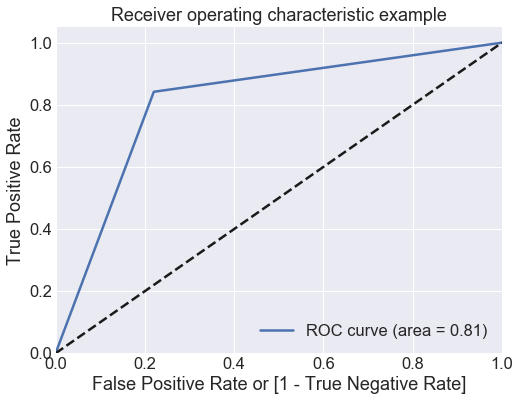

(array([0.        , 0.22009831, 1.        ]),
 array([0.        , 0.84191368, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [181]:
draw_ROC(y_train_df.churn, y_train_df.final_predicted)

In [182]:
#Draw_ROC(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.81


#### Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

      prob  accuracy  sensitivity  specificity
0.00  0.00  0.080477     1.000000     0.000000
0.05  0.05  0.213308     0.988040     0.145503
0.10  0.10  0.293618     0.980239     0.233524
0.15  0.15  0.369031     0.970879     0.316357
0.20  0.20  0.440887     0.958918     0.395549
0.25  0.25  0.507512     0.946438     0.469097
0.30  0.30  0.572337     0.931877     0.540870
0.35  0.35  0.632601     0.910556     0.608274
0.40  0.40  0.685708     0.888196     0.667987
0.45  0.45  0.737058     0.866875     0.725696
0.50  0.50  0.784892     0.841914     0.779902
0.55  0.55  0.826784     0.802912     0.828873
0.60  0.60  0.863653     0.759230     0.872793
0.65  0.65  0.891149     0.712949     0.906745
0.70  0.70  0.913497     0.652106     0.936374
0.75  0.75  0.926596     0.534581     0.960905
0.80  0.80  0.929860     0.362975     0.979474
0.85  0.85  0.926428     0.182527     0.991535
0.90  0.90  0.922327     0.069683     0.996951
0.95  0.95  0.919941     0.014041     0.999226
1.00  1.00  0

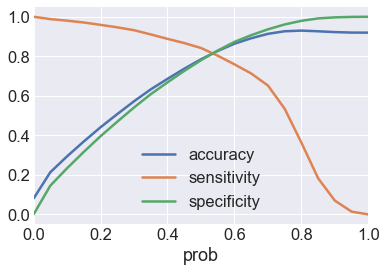

In [183]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
find_optimal_cutoff(y_train_df)

#### From the curve above, 0.54 is the optimum point .
Although, other cutoff between 0.50 and 0.60 can also be taken but to keep the test sensitivity/recall significant we choose 0.54. At this point there is a balance of sensitivity, specificity and accuracy.

In [184]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.54
predict_churn_with_prob(log_reg, X_train_reg, y_train, cut_off_prob)

Roc_auc_score : 0.8142436210829099
Sensitivity/Recall : 0.8096723868954758
Specificity: 0.818814855270344
False Positive Rate: 0.18118514472965594
Positive predictive value: 0.281148429035753
Negative Predictive value: 0.9800621016505965
sklearn precision score value: 0.281148429035753


churn  churn_Prob  final_predicted
28606      0    0.012451                0
13960      0    0.425519                0
23986      0    0.172176                0
4967       0    0.066144                0
5985       0    0.013351                0
...      ...         ...              ...
9539       0    0.036763                0
6815       0    0.198132                0
5746       0    0.541061                1
2717       0    0.279033                0
3931       0    0.149108                0

[23895 rows x 3 columns]

#### Prediction test on test data

In [185]:
# predicting with the choosen cut-off on test
predict_churn_with_prob(log_reg, X_test_sm, y_test, cut_off_prob)

Roc_auc_score : 0.8139842254298301
Sensitivity/Recall : 0.8057259713701431
Specificity: 0.8222424794895169
False Positive Rate: 0.17775752051048313
Positive predictive value: 0.28780131482834187
Negative Predictive value: 0.9793702497285559
sklearn precision score value: 0.28780131482834187


churn  churn_Prob  final_predicted
19673      0    0.179666                0
2149       0    0.603011                1
18845      0    0.669671                1
18671      0    0.100726                0
2090       0    0.372496                0
...      ...         ...              ...
1737       1    0.807292                1
6946       0    0.581007                1
9978       0    0.308180                0
289        0    0.436360                0
18182      1    0.000018                0

[5974 rows x 3 columns]

#### Observation:
Logistic Regression interpretability model prediction after selecting optimal cut-off also is resulting in a model with<br>
<br>**Train Recall : 80.96%**  and  **Train Roc_auc_score : 81.42**
<br>**Test Recall : 80.57%**  and  **Test Roc_auc_score : 81.39**

Both train and test predictions looks good. Neither overfitting nor under fitting.

## Good Prediction
This section will use PCA (Principal Component Analysis). We will use 3 Model techniques in this section to predict best model.

We can use various classification models to validate our trian and test data. However, we have some restriction and benchmark to use only below 3 model.

1. Logistic Regression
2. Random Forest
3. XG Boosting

### PCA on the data
Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.

- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [186]:
# Initializing PCA on the train data with random state 90
pca = PCA(svd_solver = 'randomized', random_state = 90)
#Doing the PCA on the train data
pca.fit(X_train_sm)

PCA(random_state=90, svd_solver='randomized')

#### Components from the PCA

In [187]:
# Generating components of PCA
pca.components_

array([[-6.01728827e-03,  1.40531491e-03,  2.02372093e-02, ...,
        -7.43957207e-05, -9.20197042e-04, -1.91275750e-03],
       [ 6.86805692e-02,  5.82740152e-02,  4.50778438e-02, ...,
        -7.96193462e-03, -3.92652832e-03,  6.55297486e-03],
       [ 5.33710087e-03,  1.59867406e-02,  2.78586539e-02, ...,
        -2.14549391e-02, -2.47365241e-02, -1.77770271e-02],
       ...,
       [-0.00000000e+00,  1.72511999e-16,  2.56368632e-16, ...,
         4.63714559e-02, -3.64824028e-01,  1.19271544e-01],
       [-0.00000000e+00,  3.26627640e-16, -1.65936170e-16, ...,
         4.23525238e-01,  2.07752963e-01, -1.85831992e-01],
       [-0.00000000e+00, -1.38777878e-17,  7.01925554e-17, ...,
         1.64050008e-01,  1.87480384e-02,  1.16097515e-01]])

#### Looking at the explained variance ratio for each component

In [188]:
pca.explained_variance_ratio_[:30]

array([0.21937379, 0.17847716, 0.10847766, 0.06157707, 0.0485035 ,
       0.04524738, 0.03088549, 0.02910815, 0.026369  , 0.01828407,
       0.01514986, 0.01413656, 0.01332077, 0.01277037, 0.01206492,
       0.00966216, 0.00913695, 0.00860518, 0.00844478, 0.00777574,
       0.00702381, 0.00596662, 0.00588842, 0.0055334 , 0.00516756,
       0.00496903, 0.00445241, 0.00421824, 0.00400262, 0.00385389])

#### Making a scree plot for the explained variance

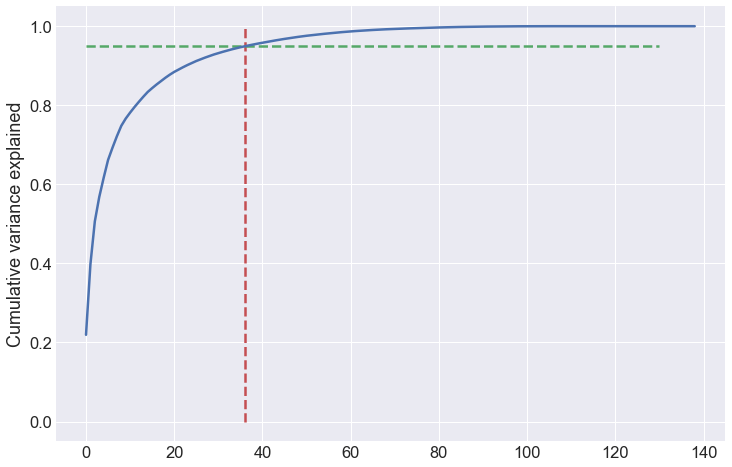

In [189]:
# Listing all explained variance ratios
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Plotting scree plot for the explained variance
fig = plt.figure(figsize=[12,8])
plt.vlines(x=36, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=130, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [190]:
# Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final = IncrementalPCA(n_components = 36)

In [191]:
X_train_pca = pca_final.fit_transform(X_train_sm)
X_train_pca.shape

(43944, 36)

In [192]:
#creating correlation matrix for the principal components
cor_matrix = np.corrcoef(X_train_pca.transpose())

# 1s -> 0s in diagonals
cor_matrix_nodiag = cor_matrix - np.diagflat(cor_matrix.diagonal())

print("max corr:",cor_matrix_nodiag.max(), ", min corr: ", cor_matrix_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.06637729508913122 , min corr:  -0.03464894026628021


##### Plotting the heatmap of the corr matrix

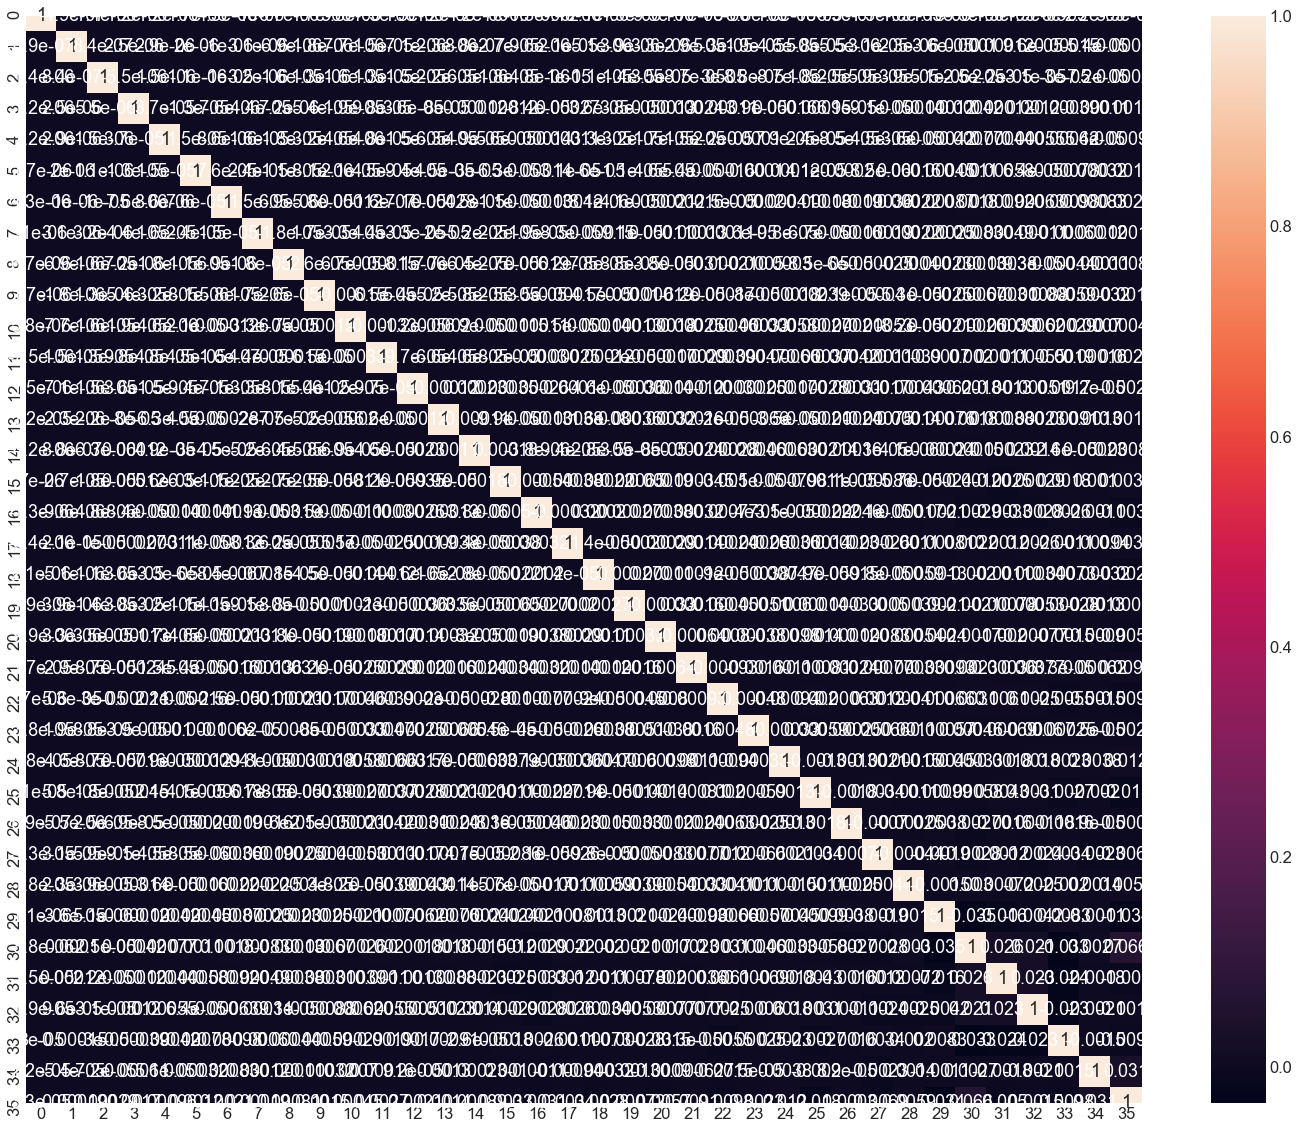

In [193]:
plt.figure(figsize=[25,20])
sns.heatmap(cor_matrix, annot=True)
plt.show()

#### Observation:
- There is no correlation between any two components! We effectively have removed multicollinearity from our situation, and our models will be much more stable

#### Applying the transformation on the test set

In [194]:
#Applying selected components to the test data - 20 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(5974, 36)

### Steps for different model
For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. We can use various models to validate our data and check efficiency. 

But as we have some restriction, we can use below 3 models trained are:

- Logistic Regression
- Random Forest
- XGBoost Classifier (Boosting)

### Logistic Regression
##### Applying Logistic Regression with principal components

In [195]:
# setup scoring type initially to evaluate scores
score_type = 'accuracy'

In [196]:
# Initializing logistc regression classifier
log_reg = LogisticRegression()

#Training the model on the train data
model_fit(log_reg, X_train_pca, y_train_sm)


Model Report
Accuracy : 0.8361
Recall/Sensitivity : 0.8546
AUC Score (Train): 0.907213
CV Score : 
    Avg. - 0.3403422 
    Std. - 0.01872773 
    Min. - 0.3205143 
    Max. - 0.375128


In [197]:
# Logistic regression predictions on Test data
test_pred = log_reg.predict(X_test_pca)

# Getting logistic regresson model metrics details on prediction
model_metrics(y_test, test_pred)

Roc_auc_score : 0.8184585959476764
Sensitivity/Recall : 0.8159509202453987
Specificity: 0.8209662716499544
False Positive Rate: 0.17903372835004558
Positive predictive value: 0.2889210716871832
Negative Predictive value: 0.9804049640757675
sklearn precision score value: 0.2889210716871832


In [198]:
print("Accuracy  : {}".format(metrics.accuracy_score(y_test, test_pred)))
print("Recall    : {}".format(metrics.recall_score(y_test, test_pred)))
print("Precision : {}".format(metrics.precision_score(y_test, test_pred)))

Accuracy  : 0.8205557415467024
Recall    : 0.8159509202453987
Precision : 0.2889210716871832


#### Making predictions

In [199]:
pred_probs_train = log_reg.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_sm, pred_probs_train)))

roc_auc_score(Train) 0.91


In [200]:
cut_off_prob = 0.5
y_train_df = predict_churn_with_prob(log_reg, X_train_pca, y_train_sm, cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.836064081558347
Sensitivity/Recall : 0.8546331694884398
Specificity: 0.8174949936282542
False Positive Rate: 0.18250500637174585
Positive predictive value: 0.8240301913287695
Negative Predictive value: 0.849026280960484
sklearn precision score value: 0.8240301913287695


churn  churn_Prob  final_predicted
0      0    0.002247                0
1      0    0.429942                0
2      0    0.135716                0
3      0    0.016846                0
4      0    0.000541                0

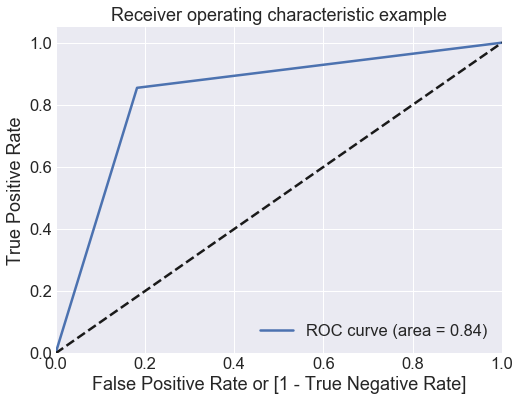

(array([0.        , 0.18250501, 1.        ]),
 array([0.        , 0.85463317, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [201]:
draw_ROC(y_train_df.churn, y_train_df.final_predicted)

In [202]:
#Draw_ROC(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.84


#### Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

      prob  accuracy  sensitivity  specificity
0.00  0.00  0.500000     1.000000     0.000000
0.05  0.05  0.622884     0.986892     0.258875
0.10  0.10  0.676133     0.977289     0.374977
0.15  0.15  0.714295     0.969143     0.459448
0.20  0.20  0.745472     0.957446     0.533497
0.25  0.25  0.769821     0.945431     0.594211
0.30  0.30  0.790574     0.930502     0.650646
0.35  0.35  0.806618     0.914528     0.698707
0.40  0.40  0.818838     0.897415     0.740260
0.45  0.45  0.827781     0.876343     0.779219
0.50  0.50  0.836064     0.854633     0.817495
0.55  0.55  0.841161     0.829783     0.852540
0.60  0.60  0.840820     0.800974     0.880666
0.65  0.65  0.834107     0.763608     0.904606
0.70  0.70  0.825346     0.726197     0.924495
0.75  0.75  0.805343     0.668760     0.941926
0.80  0.80  0.762539     0.566585     0.958493
0.85  0.85  0.691152     0.408611     0.973694
0.90  0.90  0.604110     0.222055     0.986164
0.95  0.95  0.537457     0.078919     0.995995
1.00  1.00  0

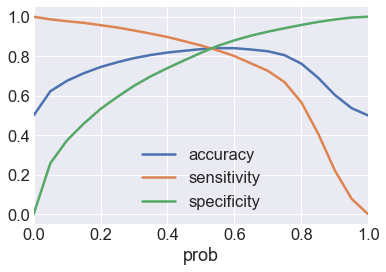

In [203]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
find_optimal_cutoff(y_train_df)

#### From the curve above, 0.51 is the optimum point .
Although, other cutoff between 0.51 can also be taken but to keep the test sensitivity/recall significant we choose 0.54. At this point there is a balance of sensitivity, specificity and accuracy.

In [204]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.51
predict_churn_with_prob(log_reg, X_train_pca, y_train_sm, cut_off_prob)

Roc_auc_score : 0.8365647187329328
Sensitivity/Recall : 0.8493082104496632
Specificity: 0.8238212270162024
False Positive Rate: 0.17617877298379755
Positive predictive value: 0.8281998934848216
Negative Predictive value: 0.8453670838781991
sklearn precision score value: 0.8281998934848216


churn  churn_Prob  final_predicted
0          0    0.002247                0
1          0    0.429942                0
2          0    0.135716                0
3          0    0.016846                0
4          0    0.000541                0
...      ...         ...              ...
43939      1    0.477288                0
43940      1    0.957516                1
43941      1    0.959824                1
43942      1    0.759861                1
43943      1    0.690453                1

[43944 rows x 3 columns]

#### Prediction test on test data

In [205]:
# predicting with the choosen cut-off on test
predict_churn_with_prob(log_reg, X_test_pca, y_test, cut_off_prob)

Roc_auc_score : 0.8219225886550603
Sensitivity/Recall : 0.8159509202453987
Specificity: 0.827894257064722
False Positive Rate: 0.17210574293527803
Positive predictive value: 0.29709605361131797
Negative Predictive value: 0.980565752537249
sklearn precision score value: 0.29709605361131797


churn  churn_Prob  final_predicted
19673      0    0.070681                0
2149       0    0.329821                0
18845      0    0.789261                1
18671      0    0.067317                0
2090       0    0.287085                0
...      ...         ...              ...
1737       1    0.891104                1
6946       0    0.596294                1
9978       0    0.114960                0
289        0    0.297480                0
18182      1    0.000001                0

[5974 rows x 3 columns]

#### Observation:
Logistic Regression prediction after selecting optimal cut-off also is resulting in a model with<br>
<br>**Train Recall : 84.93%**  and  **Train Roc_auc_score : 83.65**
<br>**Test Recall : 81.59%**  and  **Test Roc_auc_score : 82.19**

Both train and test predictions looks good. Neither overfitting nor under fitting

## Random Forest
- First we will create a Random Forest model using default values with random state 90 and check both train and test score. 
- Next, we can take use various hyperparamters to evaluate random forest model and compate both train and test scores.

In [206]:
# Initializing Random Forest Classifier with only random state
rf_model = RandomForestClassifier(random_state = 90)

# Fitting train dataset into decision tree model
model_fit(rf_model, X_train_pca, y_train_sm)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : 
    Avg. - 0.8119427 
    Std. - 0.01200443 
    Min. - 0.7933781 
    Max. - 0.8229404


In [207]:
# make predictions
pred_probs_test = rf_model.predict(X_test_pca)

#Let's check the model metrices.
model_metrics(actual_churn = y_test,pred_churn = pred_probs_test)

Roc_auc_score : 0.7280743354715314
Sensitivity/Recall : 0.50920245398773
Specificity: 0.9469462169553328
False Positive Rate: 0.05305378304466728
Positive predictive value: 0.46111111111111114
Negative Predictive value: 0.9558336400441664
sklearn precision score value: 0.46111111111111114


#### Using Hyperparameters
Passing hyperparameters to tune random forest model with help of GridSearchCV to use 5 fold cross validation.

In [208]:
# Create the parameter grid based on the results of random search 
parameters = {
                'max_depth': [5, 10, 15, 20],
                'min_samples_leaf': [100, 200, 400],
                'max_features': [8, 10, 15]
            }

# Initializing Random Forest Classifier with only random state
rf_model = RandomForestClassifier(random_state = 90)

# Creating grid search cv with various hyper paramter with 5 fold
model_cv = GridSearchCV(rf_model, parameters, cv = 5, scoring = score_type, n_jobs = -1, verbose = 1, 
                        return_train_score = True)

# Fit the decision tree model to the data
model_cv.fit(X_train_pca, y_train_sm)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 68.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=90), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': [100, 200, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [209]:
# printing the optimal accuracy score and hyperparameters
model_cv.best_score_, model_cv.best_params_

(0.856931591414414,
 {'max_depth': 15, 'max_features': 8, 'min_samples_leaf': 100})

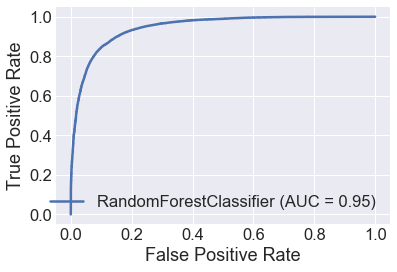

In [210]:
# Plotting roc curve with best estimators from train data set.
rf_best = model_cv.best_estimator_
plot_roc_curve(rf_best, X_train_pca, y_train_sm)
plt.show()

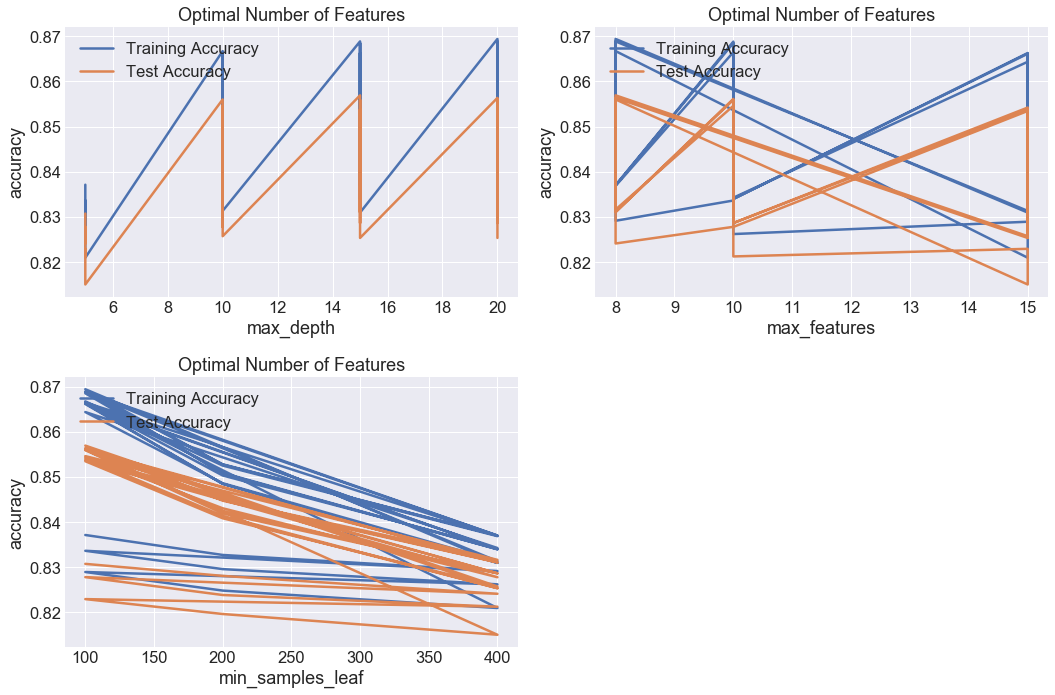

In [211]:
# Getting cross validation result in a dataframe to validate
cv_results = pd.DataFrame(model_cv.cv_results_)

# Getting Cross validation results form model and built a dataframe to validate
params = ['max_depth', 'max_features', 'min_samples_leaf']
plot_CV_result(cv_results, params, score_type)

#### Observation:
Test 'Accuracy' score almost becomes constant after max_depth=20. We can consider this value as a hyperparameter.

#### Final Random Forest Model using tuned hyperparameters

In [212]:
# Intializing final Random Forest Classifier with tunued hyperparameters max depth , n_estimators, min_samples_leaf, 
# min_sample_split and random state 90
rf_model = RandomForestClassifier(max_depth = 15, max_features = 8, min_samples_leaf = 100,
                                 min_samples_split = 100, random_state = 90)

# Fitting the final random forest model with train set using tunued hyperparamters.
print("Model performance on Train data:")
model_fit(rf_model, X_train_pca, y_train_sm)

Model performance on Train data:

Model Report
Accuracy : 0.873
Recall/Sensitivity : 0.8665
AUC Score (Train): 0.946061
CV Score : 
    Avg. - 0.4277264 
    Std. - 0.009715566 
    Min. - 0.4174536 
    Max. - 0.44294


In [213]:
# predict the model on test data
testpred = rf_model.predict(X_test_pca)

In [214]:
# Finding Random Forest model matrics component details.
print("Model performance on Test data:")
model_metrics(y_test, testpred)

Model performance on Test data:
Roc_auc_score : 0.8032850327999955
Sensitivity/Recall : 0.7361963190184049
Specificity: 0.8703737465815862
False Positive Rate: 0.12962625341841386
Positive predictive value: 0.33613445378151263
Negative Predictive value: 0.9736895778095044
sklearn precision score value: 0.33613445378151263


#### Observation:
- After hyperparameter tuning for the random forest. The Recall rate(Test) is 79.10%.
- Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [215]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predict_churn_with_prob(rf_model, X_train_pca, y_train_sm, cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8729519388312398
Sensitivity/Recall : 0.8664664117968324
Specificity: 0.8794374658656472
False Positive Rate: 0.12056253413435282
Positive predictive value: 0.87785309171393
Negative Predictive value: 0.8681763040841084
sklearn precision score value: 0.87785309171393


churn  churn_Prob  final_predicted
0      0    0.042442                0
1      0    0.490845                0
2      0    0.167205                0
3      0    0.016536                0
4      0    0.028649                0

      prob  accuracy  sensitivity  specificity
0.00  0.00  0.500000     1.000000     0.000000
0.05  0.05  0.521641     1.000000     0.043282
0.10  0.10  0.593619     0.999863     0.187375
0.15  0.15  0.670126     0.997770     0.342481
0.20  0.20  0.734048     0.991762     0.476334
0.25  0.25  0.784157     0.983798     0.584517
0.30  0.30  0.820817     0.971782     0.669853
0.35  0.35  0.847784     0.955307     0.740260
0.40  0.40  0.865192     0.933597     0.796787
0.45  0.45  0.872929     0.903332     0.842527
0.50  0.50  0.872952     0.866466     0.879437
0.55  0.55  0.870085     0.831558     0.908611
0.60  0.60  0.859207     0.788686     0.929729
0.65  0.65  0.839091     0.730293     0.947888
0.70  0.70  0.810099     0.656790     0.963408
0.75  0.75  0.774986     0.574640     0.975332
0.80  0.80  0.726720     0.468414     0.985026
0.85  0.85  0.675610     0.359184     0.992035
0.90  0.90  0.605498     0.213135     0.997861
0.95  0.95  0.519843     0.039687     1.000000
1.00  1.00  0

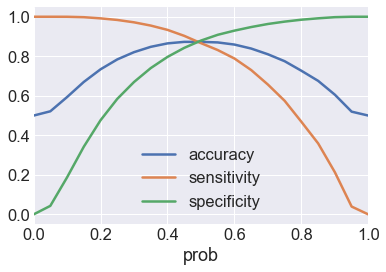

In [216]:
# finding cut-off with the right balance of the metrices
find_optimal_cutoff(y_train_df)

#### Observation:
From the curve above, 0.47 is the optimal point with high enough sensitivity.

In [217]:
# Finding Probablity churn for final cuttoff value of senstitivity, specificity and accuracy
cut_off_prob = 0.48
predict_churn_with_prob(rf_model, X_train_pca, y_train_sm, cut_off_prob)

Roc_auc_score : 0.8742490442381212
Sensitivity/Recall : 0.8817586018569088
Specificity: 0.8667394866193336
False Positive Rate: 0.1332605133806663
Positive predictive value: 0.868711326338445
Negative Predictive value: 0.8799556418075963
sklearn precision score value: 0.868711326338445


churn  churn_Prob  final_predicted
0          0    0.042442                0
1          0    0.490845                1
2          0    0.167205                0
3          0    0.016536                0
4          0    0.028649                0
...      ...         ...              ...
43939      1    0.440297                0
43940      1    0.943480                1
43941      1    0.925403                1
43942      1    0.632694                1
43943      1    0.649154                1

[43944 rows x 3 columns]

#### Making prediction on test

In [218]:
# predicting test data with XG Boosting final model along with tuned hyper parameters.
y_test_df = predict_churn_with_prob(rf_model, X_test_pca, y_test, cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8043546910797806
Sensitivity/Recall : 0.7525562372188139
Specificity: 0.8561531449407475
False Positive Rate: 0.14384685505925252
Positive predictive value: 0.3180639585133967
Negative Predictive value: 0.9748806310981939
sklearn precision score value: 0.3180639585133967


churn  churn_Prob  final_predicted
19673      0    0.072229                0
2149       0    0.292877                0
18845      0    0.375161                0
18671      0    0.214646                0
2090       0    0.238519                0

#### Observation:
Random Forest after selecting optimal cut-off also is resulting in a model with
- Train Recall : 88.17%  and  Train Roc_auc_score : 87.42
- Test Recall : 75.25%  and  Test Roc_auc_score : 80.43

### XGBoost Classifier

In [219]:
# Fitting the XGBClassifier
xgd_model = xgb.XGBClassifier(random_state = 90)

# Model fit and performance on Train data
model_fit(xgd_model, X_train_pca, y_train_sm)


Model Report
Accuracy : 0.9825
Recall/Sensitivity : 0.9931
AUC Score (Train): 0.998503
CV Score : 
    Avg. - 0.7605137 
    Std. - 0.008552292 
    Min. - 0.7515076 
    Max. - 0.7733273


In [220]:
# make predictions
testPred = xgd_model.predict(X_test_pca)

#Let's check the model metrices.
model_metrics(y_test, testPred)

Roc_auc_score : 0.7750408718330154
Sensitivity/Recall : 0.6339468302658486
Specificity: 0.9161349134001823
False Positive Rate: 0.08386508659981769
Positive predictive value: 0.4025974025974026
Negative Predictive value: 0.9656033820138356
sklearn precision score value: 0.4025974025974026


In [221]:
# Final feature selected for XGBClassifier
xgb_model = xgb.XGBClassifier(learning_rate = 0.3, n_estimators = 400, max_depth = 10, min_child_weight = 1, 
                             gamma = 0.0, subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', 
                             nthread = 4, scale_pos_weight = 1, seed = 27, random_state = 90)

# Fit Train data
model_fit(xgb_model, X_train_pca, y_train_sm)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : 
    Avg. - 0.8484434 
    Std. - 0.009896635 
    Min. - 0.8334281 
    Max. - 0.8634657


In [222]:
# Prediction on Test data
testpred = xgb_model.predict(X_test_pca)

# Model evaluation on Test data
model_metrics(y_test, testpred)

Roc_auc_score : 0.7379544136919242
Sensitivity/Recall : 0.5316973415132924
Specificity: 0.944211485870556
False Positive Rate: 0.05578851412944394
Positive predictive value: 0.45936395759717313
Negative Predictive value: 0.957655325443787
sklearn precision score value: 0.45936395759717313


Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [223]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
train_prob = predict_churn_with_prob(xgb_model, X_train_pca, y_train_sm, cut_off_prob)
train_prob.head()

Roc_auc_score : 1.0
Sensitivity/Recall : 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive predictive value: 1.0
Negative Predictive value: 1.0
sklearn precision score value: 1.0


churn    churn_Prob  final_predicted
0      0  1.303498e-06                0
1      0  2.369280e-03                0
2      0  7.889210e-06                0
3      0  1.424152e-07                0
4      0  2.663477e-06                0

      prob  accuracy  sensitivity  specificity
0.00  0.00       0.5          1.0          0.0
0.05  0.05       1.0          1.0          1.0
0.10  0.10       1.0          1.0          1.0
0.15  0.15       1.0          1.0          1.0
0.20  0.20       1.0          1.0          1.0
0.25  0.25       1.0          1.0          1.0
0.30  0.30       1.0          1.0          1.0
0.35  0.35       1.0          1.0          1.0
0.40  0.40       1.0          1.0          1.0
0.45  0.45       1.0          1.0          1.0
0.50  0.50       1.0          1.0          1.0
0.55  0.55       1.0          1.0          1.0
0.60  0.60       1.0          1.0          1.0
0.65  0.65       1.0          1.0          1.0
0.70  0.70       1.0          1.0          1.0
0.75  0.75       1.0          1.0          1.0
0.80  0.80       1.0          1.0          1.0
0.85  0.85       1.0          1.0          1.0
0.90  0.90       1.0          1.0          1.0
0.95  0.95       1.0          1.0          1.0
1.00  1.00   

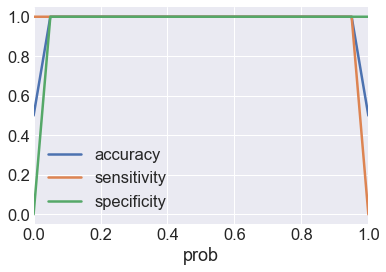

In [224]:
# Finding optimal cut-off probability
find_optimal_cutoff(train_prob)

In [225]:
# Selecting 0.1 as cut-off in an attempt to improve recall rate
cut_off_prob = 0.1
predict_churn_with_prob(xgb_model, X_train_pca, y_train_sm, cut_off_prob)

Roc_auc_score : 1.0
Sensitivity/Recall : 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive predictive value: 1.0
Negative Predictive value: 1.0
sklearn precision score value: 1.0


churn    churn_Prob  final_predicted
0          0  1.303498e-06                0
1          0  2.369280e-03                0
2          0  7.889210e-06                0
3          0  1.424152e-07                0
4          0  2.663477e-06                0
...      ...           ...              ...
43939      1  9.966904e-01                1
43940      1  9.997150e-01                1
43941      1  9.999946e-01                1
43942      1  9.994540e-01                1
43943      1  9.988052e-01                1

[43944 rows x 3 columns]

#### Making prediction on test

In [226]:
# predicting test data with XG Boosting final model along with tuned hyper parameters.
test_prob = predict_churn_with_prob(xgb_model, X_test_pca, y_test, cut_off_prob)
test_prob.head()

Roc_auc_score : 0.7992116443246408
Sensitivity/Recall : 0.7014314928425358
Specificity: 0.8969917958067457
False Positive Rate: 0.10300820419325434
Positive predictive value: 0.3777533039647577
Negative Predictive value: 0.9711804184761152
sklearn precision score value: 0.3777533039647577


churn  churn_Prob  final_predicted
19673      0    0.000014                0
2149       0    0.000496                0
18845      0    0.020295                0
18671      0    0.000099                0
2090       0    0.002277                0

#### Observation:
XG Boosting after selecting optimal cut-off also is resulting in a model with
- Train Recall : 1.0%  and  Train Roc_auc_score : 1.0
- Test Recall : 70.14%  and  Test Roc_auc_score : 79.92

## Final Choice of Model 

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives. 

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn import model_selection

knn = KNeighborsClassifier(n_neighbors = 90)
dt  = DecisionTreeClassifier(random_state = 90)
lr  = LogisticRegression()
rf  = RandomForestClassifier(n_estimators=100, random_state = 90)
gb  = GradientBoostingClassifier(n_estimators = 80, random_state = 90)
xgb = xgb.XGBClassifier(random_state = 90)

In [228]:
rf.fit(X_train_pca, y_train_sm)
rf.feature_importances_

array([0.07607323, 0.02623699, 0.05355817, 0.03499039, 0.10648084,
       0.02889843, 0.03327212, 0.02114049, 0.02546199, 0.08731042,
       0.04325339, 0.02268316, 0.02631469, 0.02174206, 0.01728213,
       0.01721966, 0.0166076 , 0.01694483, 0.01653284, 0.01707324,
       0.01483995, 0.02183488, 0.0201927 , 0.02440874, 0.01577095,
       0.01931585, 0.02935214, 0.02056822, 0.02054954, 0.01769206,
       0.01463696, 0.01397052, 0.01496375, 0.01434927, 0.01512958,
       0.0133482 ])

In [229]:
vc = VotingClassifier(estimators = [('knn',knn), ('lr', lr), ('dt',dt)])
sc = StackingClassifier(estimators = [('knn',knn), ('lr', lr), ('dt',dt)], final_estimator = rf)

In [230]:
models = []

models.append(('Linear Regression', lr))
models.append(('Random Forest', rf))
models.append(('Gradient Boosting', gb))
models.append(('XG Boosting', xgb))
models.append(('Voting Classifier', vc))
models.append(('Stacking Classifier',sc))

Linear Regression: 0.639982 (0.254881)
Random Forest: 0.861324 (0.130160)
Gradient Boosting: 0.667966 (0.238947)
XG Boosting: 0.811217 (0.173918)
Voting Classifier: 0.685257 (0.249257)
Stacking Classifier: 0.687561 (0.216305)


<Figure size 432x288 with 0 Axes>

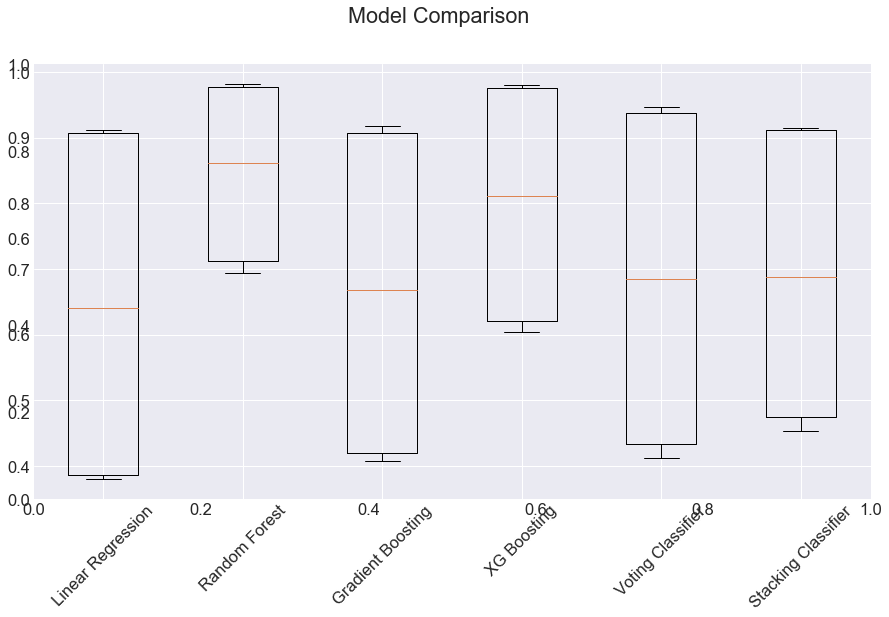

In [231]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 90)
    cv_results = model_selection.cross_val_score(model, X_train_pca, y_train_sm, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 45)
plt.show()

Automatically created module for IPython interactive environment


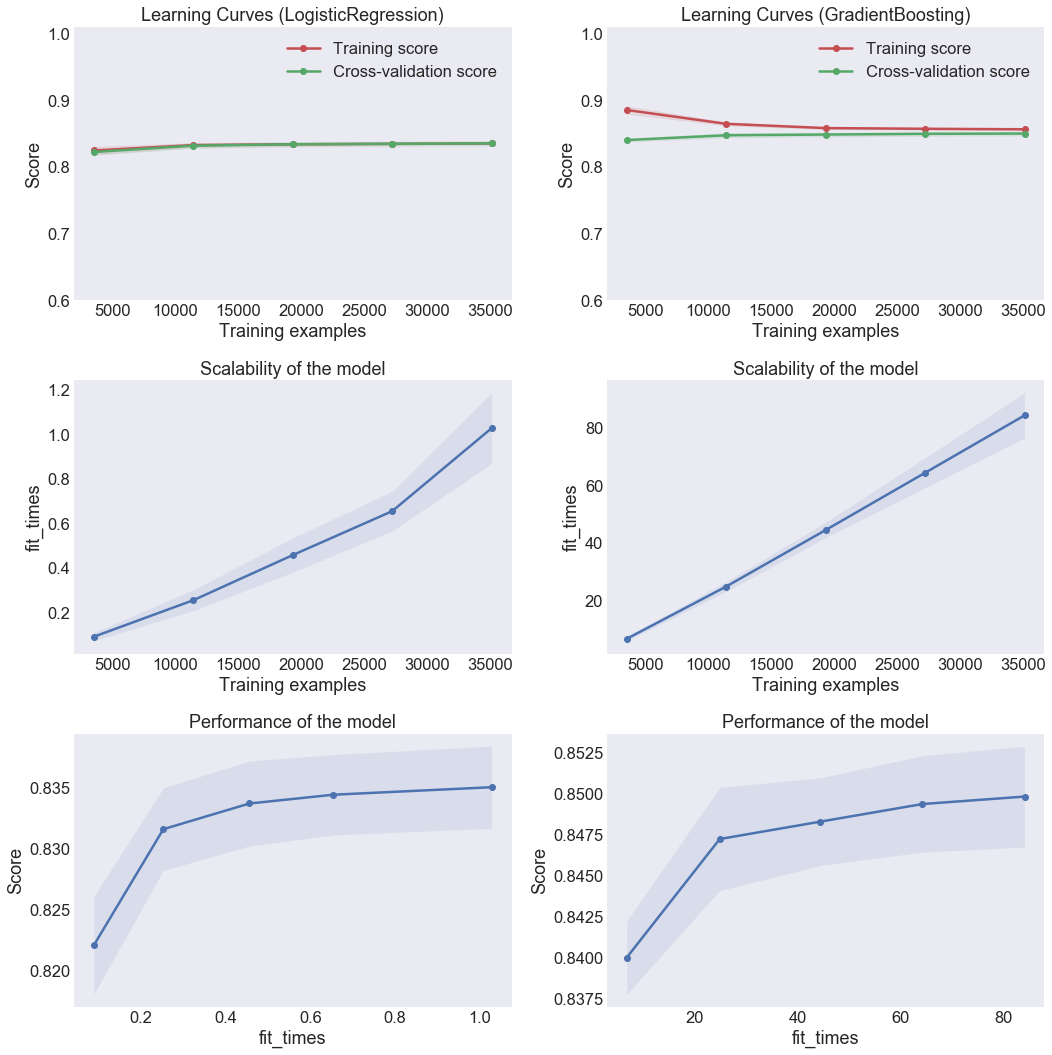

In [232]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(15, 15))

title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train_pca, y_train_sm, axes=axes[:, 0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (GradientBoosting)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier(n_estimators=70,random_state=0)
plot_learning_curve(estimator, title, X_train_pca, y_train_sm, axes=axes[:, 1], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

plt.tight_layout()
plt.show()

### Interpretability Model
- This interpretability model built with Logistic Regression. Recursive Feature Elimination (RFE) feature selection techniques that select a subset of the most relevant features (columns) for a dataset. 
- Also used Class Weight to improve imbalance data. The difference in weights will influence the classification of the classes during the training phase. The whole purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class.

#### Logistic Regression Model Scores<br>
| Model/Metrics                                 | Train   | Test   |
|-----------------------------------------------|---------|--------|
| <strong>Logistic Regression ( cut-off = 0.54) |         |        |
| Roc_auc_score                                 | 81.42%  | 81.39% |
| Sensitivity/Recall                            | 80.96%  | 80.57% |
| Specificity                                   | 81.88%  | 82.22% |
| precision                                     | 28.11%  | 28.78% |

### Good Models
Good model used PCA (Principal Component Analysis) and found below scores from 3 listed. Best model selection also executed below to see how other models are behaving. 

Below models are listed with their scores after applying tuned hyper parameters.

#### Logistic Regression Model Scores<br>
| Model/Metrics                                 | Train   | Test   |
|-----------------------------------------------|---------|--------|
| <strong>Logistic Regression ( cut-off = 0.51) |         |        |
| Roc_auc_score                                 | 83.65%  | 82.19% |
| Sensitivity/Recall                            | 84.93%  | 81.59% |
| Specificity                                   | 82.38%  | 82.78% |
| precision                                     | 82.81%  | 29.70% |

#### Random Forest Model Scores<br>
| Model/Metrics                                 | Train   | Test   |
|-----------------------------------------------|---------|--------|
| <strong>Random Forest (cut-off = 0.48)        |         |        |
| Roc_auc_score                                 | 87.42%  | 80.43% |
| Sensitivity/Recall                            | 88.17%  | 75.25% |
| Specificity                                   | 86.67%  | 85.61% |
| precision                                     | 86.87%  | 31.80% |

#### XG Boosting Model Scores<br>
| Model/Metrics                                 | Train   | Test   |
|---------------------------------------        |---------|--------|
| <strong>XG Boosting (cut-off = 0.1)           |         |        |
| Roc_auc_score                                 | 01.00%  | 79.92% |
| Sensitivity/Recall                            | 01.00%  | 70.14% |
| Specificity                                   | 01.00%  | 89.69% |
| precision                                     | 01.00%  | 37.75% |

#### Observation:
- Overall, the **Logistic Regression** model with probability cut-off = 0.51, performs best. It achieved the **best recall accuracy of 84.93%** for the train data and **81.59%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus no overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accurately captured by it. 


- From tree family, Random Forest achieves a recall rate of 81.17% for train data set and 75.25% for test data set. It has slightly better precision of 31.8% for test data and a balanced overall accuracy on train and test. This model performs good.


- In Boosting model, XG Boosting scores very less in test data set with compare to train set. Its clearly shows overfitting the model. So not suggestible for this data set.

## Identifying relevant churn features. 

We will use an instance of Random Forest classifier to identify the features most relevant to churn. 

### Random Forest for churn driver features 

In [233]:
# Create the parameter grid based on the results of random search 
parameters = {
    'max_depth': [8, 10, 12, 16, 20],
    'min_samples_leaf': [50,100,500],
    'n_estimators': [10,25,50,100]
}

# Create a based model
rf_model = RandomForestClassifier(random_state = 90, n_jobs = -1)

# Instantiate the grid search model
model_cv = GridSearchCV(estimator = rf_model, param_grid = parameters, cv = 5, n_jobs = -1, 
                        verbose = 1, scoring = score_type)

In [234]:
# Fit the grid search to the data
model_cv.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 126.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=90),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 16, 20],
                         'min_samples_leaf': [50, 100, 500],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [235]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of', model_cv.best_score_,'using', model_cv.best_params_)

We can get accuracy of 0.9115466362994707 using {'max_depth': 16, 'min_samples_leaf': 50, 'n_estimators': 100}


In [236]:
# Creating Random Forest final model
rf_final_model = RandomForestClassifier(max_depth = 16, max_features = 8, min_samples_leaf = 50,
                                      n_estimators = 100, random_state = 90)

# Fit the random forest model with train test
rf_final_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=16, max_features=8, min_samples_leaf=50,
                       random_state=90)

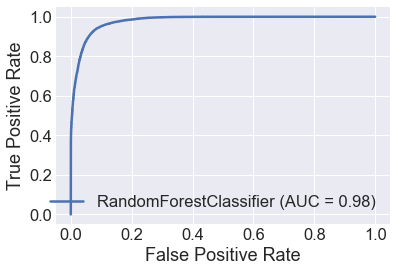

In [237]:
# Plotting roc curve with best estimators from train data set.
rf_best = model_cv.best_estimator_
plot_roc_curve(rf_best, X_train_sm, y_train_sm)
plt.show()

In [238]:
# Finding feature importances
rf_best.feature_importances_[:50]

array([1.06244931e-03, 2.12987307e-03, 2.77208266e-02, 8.86110672e-04,
       1.34172108e-03, 2.08354133e-03, 6.95832488e-04, 1.09692573e-03,
       1.35708936e-02, 8.97720923e-04, 2.21575467e-03, 4.22360745e-02,
       1.01291152e-03, 7.90985473e-03, 4.74151769e-02, 8.18854713e-04,
       1.53983731e-03, 2.44019531e-03, 1.61470957e-03, 1.62957515e-03,
       3.25488370e-02, 8.09143311e-04, 1.22327183e-03, 3.38203913e-03,
       4.46186065e-04, 2.29087397e-03, 2.56452406e-04, 1.27999108e-03,
       1.71133828e-03, 3.70203755e-02, 2.44650254e-03, 3.47229103e-03,
       1.49098941e-03, 1.68577468e-03, 1.86063667e-03, 1.20721538e-03,
       1.91039082e-04, 2.06011077e-04, 3.88310353e-05, 1.90680220e-03,
       2.95129632e-03, 6.54543623e-03, 7.36068391e-04, 6.53572625e-04,
       1.33037354e-03, 2.57307305e-03, 5.92054245e-03, 2.07484800e-03,
       1.37707646e-03, 0.00000000e+00])

In [239]:
# Finding important features and variable names.
imp_features = rf_best.feature_importances_
var_names = X_train.columns

# Defining a dataframe for both varName and Important features to display.
imp_df = pd.DataFrame({
    "VarName": var_names,
    "Imp":  imp_features
})

# Arrange imprtant features based on descending order.
imp_df.sort_values(by='Imp', ascending = False)

VarName       Imp
59        loc_ic_t2m_mou_8  0.070502
80          total_ic_mou_8  0.063368
138       Total_roam_mou_8  0.059697
120     total_month_rech_8  0.054532
65            loc_ic_mou_8  0.052527
14           roam_og_mou_8  0.047415
11           roam_ic_mou_8  0.042236
29            loc_og_mou_8  0.037020
135        Total_loc_mou_8  0.036879
20        loc_og_t2m_mou_8  0.032549
114  total_rech_num_data_8  0.032442
2                   arpu_8  0.027721
53          total_og_mou_8  0.026466
95        total_rech_amt_8  0.026407
117  total_rech_amt_data_8  0.024974
101     last_day_rch_amt_8  0.023783
98          max_rech_amt_8  0.018207
123          vol_data_mb_8  0.017843
56        loc_ic_t2t_mou_8  0.017756
126         avg_rech_amt_8  0.017523
92        total_rech_num_8  0.016604
8             offnet_mou_8  0.013571
77            std_ic_mou_8  0.010560
129         og_to_ic_mou_8  0.008855
104            vol_2g_mb_8  0.008276
13           roam_og_mou_7  0.007910
62        loc_ic_t2f_mou_8  0.007097
107            vol_3g_mb_8  0.006726
41            std_og_mou_8  0.006545
132     loc_og_to_ic_mou_8  0.006479
46            spl_og_mou_7  0.005921
137       Total_roam_mou_7  0.004302
67        std_ic_t2t_mou_7  0.003782
113  total_rech_num_data_7  0.003622
71        std_ic_t2m_mou_8  0.003586
31        std_og_t2t_mou_7  0.003472
23        loc_og_t2f_mou_8  0.003382
106            vol_3g_mb_7  0.003357
112  total_rech_num_data_6  0.003256
64            loc_ic_mou_7  0.003139
79          total_ic_mou_7  0.002957
40            std_og_mou_7  0.002951
122          vol_data_mb_7  0.002906
134        Total_loc_mou_7  0.002730
100     last_day_rch_amt_7  0.002619
45            spl_og_mou_6  0.002573
30        std_og_t2t_mou_6  0.002447
17        loc_og_t2t_mou_8  0.002440
133        Total_loc_mou_6  0.002362
25        loc_og_t2c_mou_7  0.002291
66        std_ic_t2t_mou_6  0.002262
58        loc_ic_t2m_mou_7  0.002243
127         og_to_ic_mou_6  0.002235
94        total_rech_amt_7  0.002219
10           roam_ic_mou_7  0.002216
91        total_rech_num_7  0.002201
81            spl_ic_mou_6  0.002191
121          vol_data_mb_6  0.002165
90        total_rech_num_6  0.002132
1                   arpu_7  0.002130
105            vol_3g_mb_6  0.002124
115  total_rech_amt_data_6  0.002113
5              onnet_mou_8  0.002084
47            spl_og_mou_8  0.002075
128         og_to_ic_mou_7  0.002059
78          total_ic_mou_6  0.001943
84            isd_ic_mou_6  0.001922
39            std_og_mou_6  0.001907
99      last_day_rch_amt_6  0.001897
97          max_rech_amt_7  0.001865
34        std_og_t2m_mou_7  0.001861
109               vbc_3g_8  0.001741
28            loc_og_mou_7  0.001711
116  total_rech_amt_data_7  0.001688
33        std_og_t2m_mou_6  0.001686
108                    aon  0.001679
63            loc_ic_mou_6  0.001651
19        loc_og_t2m_mou_7  0.001630
52          total_og_mou_7  0.001615
18        loc_og_t2m_mou_6  0.001615
83            spl_ic_mou_8  0.001581
57        loc_ic_t2m_mou_6  0.001555
16        loc_og_t2t_mou_7  0.001540
74        std_ic_t2f_mou_8  0.001534
32        std_og_t2t_mou_8  0.001491
111               vbc_3g_6  0.001469
55        loc_ic_t2t_mou_7  0.001444
69        std_ic_t2m_mou_6  0.001429
103            vol_2g_mb_7  0.001423
48             og_others_6  0.001377
124         avg_rech_amt_6  0.001375
51          total_og_mou_6  0.001351
4              onnet_mou_7  0.001342
44            isd_og_mou_8  0.001330
96          max_rech_amt_6  0.001326
27            loc_og_mou_6  0.001280
102            vol_2g_mb_6  0.001254
119     total_month_rech_7  0.001228
22        loc_og_t2f_mou_7  0.001223
35        std_og_t2m_mou_8  0.001207
125         avg_rech_amt_7  0.001155
110               vbc_3g_7  0.001143
70        std_ic_t2m_mou_7  0.001122
7             offnet_mou_7  0.001097
0                   arpu_6  0.001062
54        loc_ic_t2t_mou_6  0.001061
12           roam_og_mou_6  0.001013
93        total_rech_am

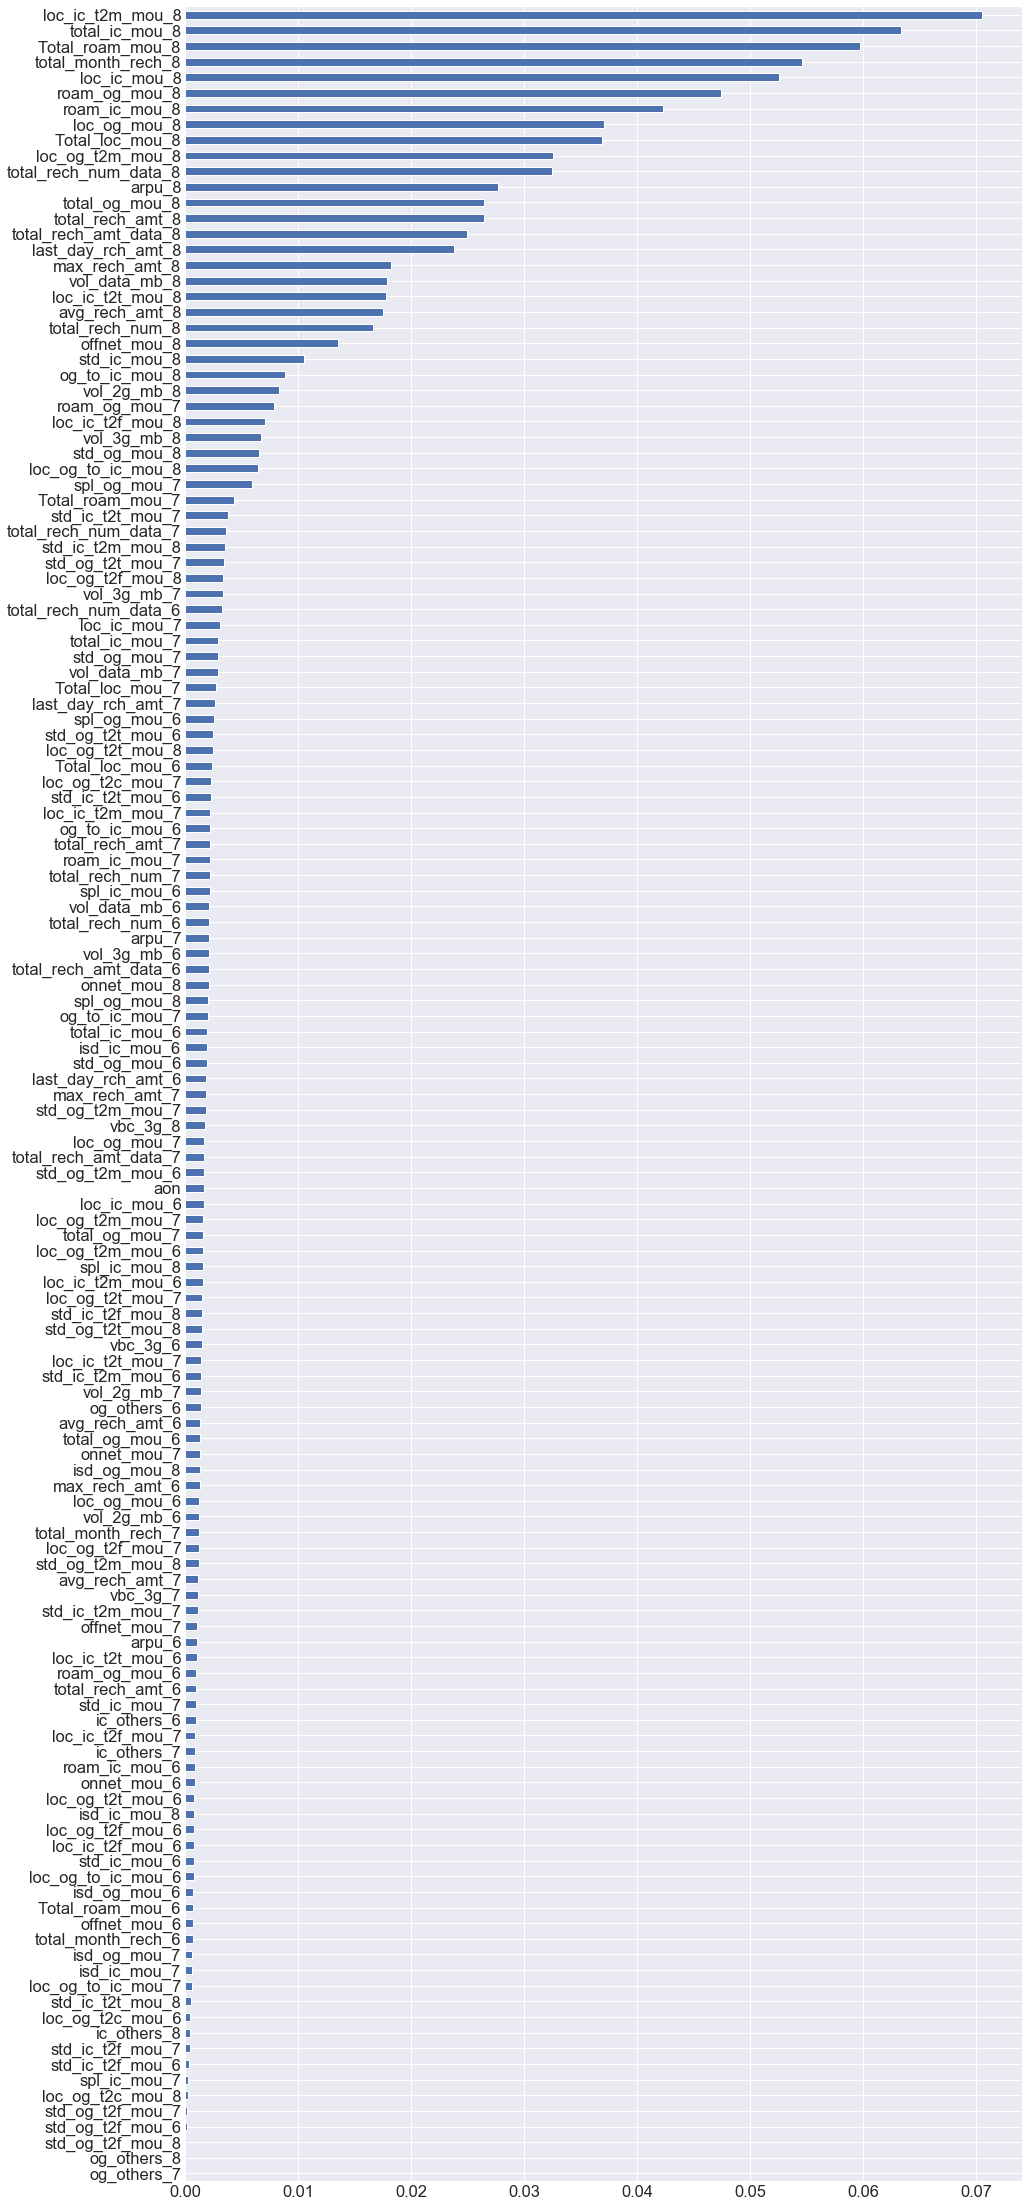

In [240]:
# Plotting barchart for important features based on len of variables naes.
plt.figure(figsize=(15,40))

feature_importances = pd.Series(imp_features, index = var_names)
feature_importances.nlargest(len(var_names)).sort_values().plot(kind='barh', align='center')
plt.show()

__Some of the top main predictors of churn are the monthly KPI features for the action phase (August).__

the graph above suggest that the top 20 features ranked in order of importance as produced by our Random Forest implementation are the features that belong to August month which is action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:

### Conclusion / Recommendations :
Some of the top main predictors of churn are the monthly KPI features from the action phase (August).

The above plot provides top 20 features raked in order of feature importance based on Random Forest model. These features are belongs to August month which is called **Action Phase**. Hence, it clearly shows what happen in the action phase which will directly impact the customer churn of high value customer. Below are the features:

- Incomming calls:
    - loc_ic_t2m_mou_8
    - total_ic_mou_8
    - loc_ic_mou_8
    - roam_ic_mou_8
    - loc_ic_t2t_mou_8
    
- Outgoing calls:
    - roam_og_mou_8
    - loc_og_mou_8
    - loc_og_t2m_mou_8
    - total_og_mou_8
    - loc_og_t2t_mou_8
     
- Recharge Amount:
    - total_month_rech_8
    - total_rech_num_data_8
    - total_rech_amt_8
    - total_rech_amt_data_8
    - last_day_rch_amt_8
    - max_rech_amt_8
    - avg_rech_amt_8

- Others
    - Total_roam_mou_8
    - Total_loc_mou_8
    - vol_data_mb_8

Local calls Mou's be it incoming or outgoing have a very important role for churn predictions. Reduction in these KPI's forms a clear indicator of churn.

Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

Next, we will look at some of the strategic steps which can be taken to retain these predicted churners.

<div class="alert alert-block alert-success">

## Recommend strategies to manage customer churn

It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

### Monitor usage drop

- Customer churn seems to be well predicted by drop in usage.

- Aside from using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level.

- Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported.

- Marketing team must come up with campaigns which targets these high-value to-be churner.

</div>

### Improving Incoming and Outgoing Services

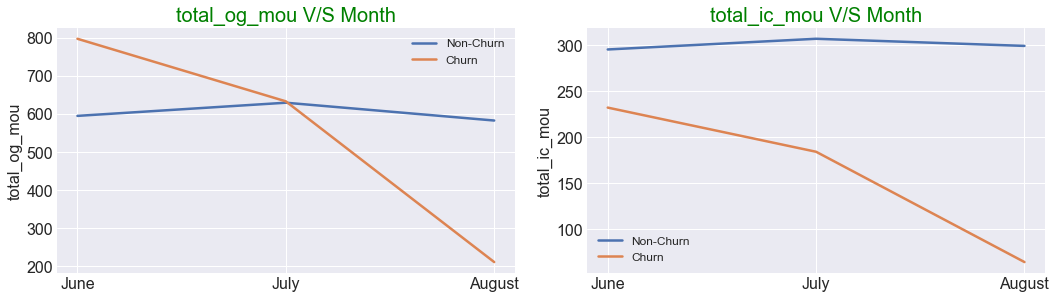

In [241]:
# visualize both incoming and outgoing minutes of usage
icog_features = ['total_og_mou',  'total_ic_mou']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, icog_features)

<div class="alert alert-block alert-info">
    
#### Observations and Suggestions:
- Above visuals predicts, total outgoing minutes of usage are very high for churner with compare to non-churner in good phase. And decreased drastically in action phase. That indicates there are some reason behind it. 
- The Network operators must further investigate their outgoing tariffs, plans and campaigns.
- Might be that the outgoing tariffs offered to its customer are less competitive to the outgoing tariffs of their competitor.
- New campaigns which targets the customers with high outgoing usage be rolled out.
    - Discounted outgoing rates during particular hours of the day for these customers.
    - For certain amount of minutes of usage, grant customer with some % of free MOU for their attraction.
    - Investigate and if need be revise the outgoing tariffs to make it competitive.
    - Free monthly outgoing MOU's depending on the users past roaming MOU usage.

</div>

### Improving Local Incoming and Outgoing Services 

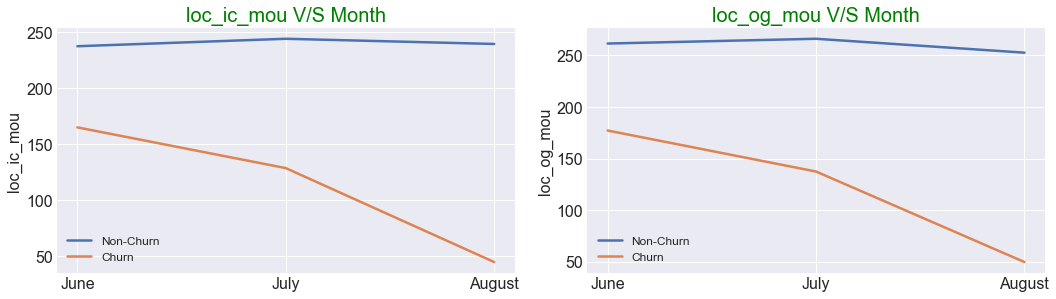

In [242]:
# visualize both local incoming and outgoing minutes of usage
icog_features = ['loc_ic_mou',  'loc_og_mou']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, icog_features)

<div class="alert alert-block alert-info">
    
#### Observations and Suggestions:
- Network team mush investigate why churners minutes of usage are drastically decreasing?
- Looks like service tariffs offered to the customer are not at all competitive with compare to their other network competitors.
- The Network operators must further investigate their incoming and outgoing tariffs, plans. Planned for new campaign along with benefits.
- New campaigns which targets the customers with high outgoing usage be rolled out. 
    - Discounted outgoing rates during particular hours of the day for these customers.
    - For every certain range of MOU, grant customer with some % of free MOU.
    - Investigate and if need be revise the outgoing tariffs to make it competitive.
    - Free monthly outgoing MOU's depending on the users past roaming MOU usage.

</div>

### Improving Total and Local Roam MOU

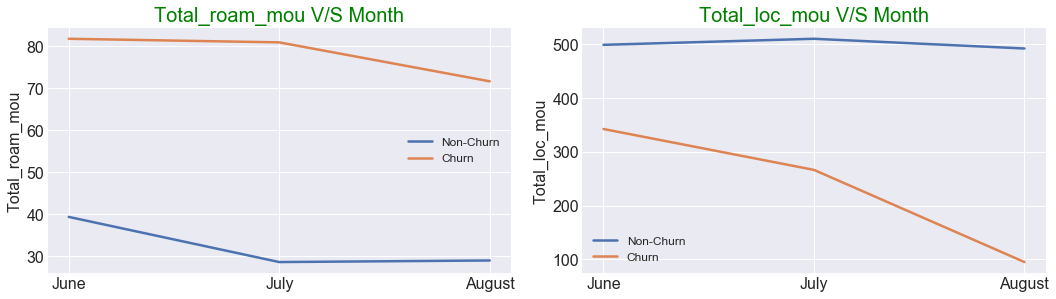

In [243]:
# visualize Total roaming and total local usage
mou_features = ['Total_roam_mou','Total_loc_mou']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, mou_features)

<div class="alert alert-block alert-info">
    
#### Observation and Suggestions
- Churners show higher roaming usage than non-churners.
- The Network operators must further investigate their roaming tariffs, and quality of service.
- Might be that the roaming tariffs offered are less competitive than their competitor.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like, 
    - Discounted roaming rates during particular hours of the day.
    - Free monthly roaming MOUs depending on the users past roaming MOU usage.
   
</div>

### Improving Total and Last Recharge Amount

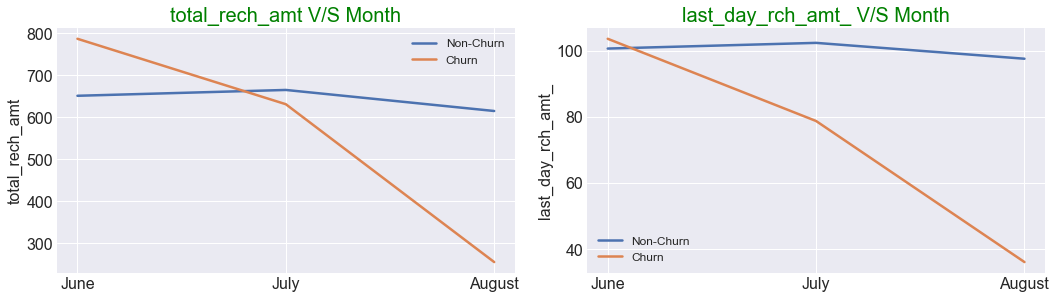

In [244]:
# visualize total recharge mount and last day recharge amount
rch_features = ['total_rech_amt','last_day_rch_amt_']

# Calling function to plot all above features side by side to compare
plot_churn(hvc_df, rch_features)

<div class="alert alert-block alert-info">
    
#### Observations and Suggestions:
- Churners show higher recharge amount than non-churners for June month.
- The Network operators must further investigate their why churner reduced recharging amount? Is there any issue in service? Is there any other network provides less recharge amount for higher service
- It might be that the customer is not getting good quality of service against recharge amount. In this case, quality of service guarantees network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like, 
    - Discounted recharge monthly call.
    - Free monthly recharge minutes of usage depending on the users past usage.

</div>